#Gráficos presentación

In [2]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargar el DataFrame desde el archivo preprocesado
df_item = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/DS_Market/DatosAgrupadosEnSemanas.csv.gz')

In [ ]:
df_item.head()

id              item    category    department  \
0  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_BOS_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_BOS_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_BOS_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_BOS_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

       store store_code  region   año  semana  trimestre       event  ventas  \
0  South_End      BOS_1  Boston  2011       4          1  Sin_Evento       0   
1  South_End      BOS_1  Boston  2011       4          1  Sin_Evento       0   
2  South_End      BOS_1  Boston  2011       4          1  Sin_Evento       0   
3  South_End      BOS_1  Boston  2011       4          1  Sin_Evento       3   
4  South_End      BOS_1  Boston  2011       4          1  Sin_Evento       0   

   yearweek  sell_price  
0    201104       12.74  
1    201104        5.28  
2    201104        3.95  
3    201104        5.77  
4    201104        3.63

In [5]:
import pandas as pd

# Crear una columna 'fecha' basada en 'año' y 'semana'
df_item['fecha'] = pd.to_datetime(df_item['año'].astype(str) + df_item['semana'].astype(str).str.zfill(2) + '1', format='%G%V%u')

# Crear la variable 'mes_año' en formato 'YYYY-MM'
df_item['mes_año'] = df_item['fecha'].dt.to_period('M').astype(str)

# Crear la variable 'trimestre_año' en formato 'YYYY-QN'
df_item['trimestre_año'] = df_item['fecha'].dt.to_period('Q').astype(str)

# Verificar las nuevas columnas
print(df_item[['año', 'semana', 'fecha', 'mes_año', 'trimestre_año']].head())

    año  semana      fecha  mes_año trimestre_año
0  2011       4 2011-01-24  2011-01        2011Q1
1  2011       4 2011-01-24  2011-01        2011Q1
2  2011       4 2011-01-24  2011-01        2011Q1
3  2011       4 2011-01-24  2011-01        2011Q1
4  2011       4 2011-01-24  2011-01        2011Q1


In [6]:
# Definir los colores para ciudades y categorías
city_colors = {
    'New York': '#1F77B4',    # Azul oscuro
    'Boston': '#2CA02C',      # Verde
    'Philadelphia': '#FF7F0E' # Naranja
}

department_colors = {
    'Electronics': '#D62728',  # Rojo
    'Accessories': '#9467BD',  # Morado
    'Clothing': '#FFD700',     # Amarillo
    'Food': '#17BECF',         # Cian
    'Other': '#7F7F7F'         # Gris
}


#1: Ventas por semana y trimestre

In [8]:
# Visualización de ventas totales por semana y mes (adaptado a la nueva paleta de colores)
ventas_semanales = df_item.groupby('yearweek')['ventas'].sum().reset_index()

  yearweek   año  semana fecha_inicio_semana
0   201104  2011       4          2011-01-24
1   201105  2011       5          2011-01-31
2   201106  2011       6          2011-02-07
3   201107  2011       7          2011-02-14
4   201108  2011       8          2011-02-21


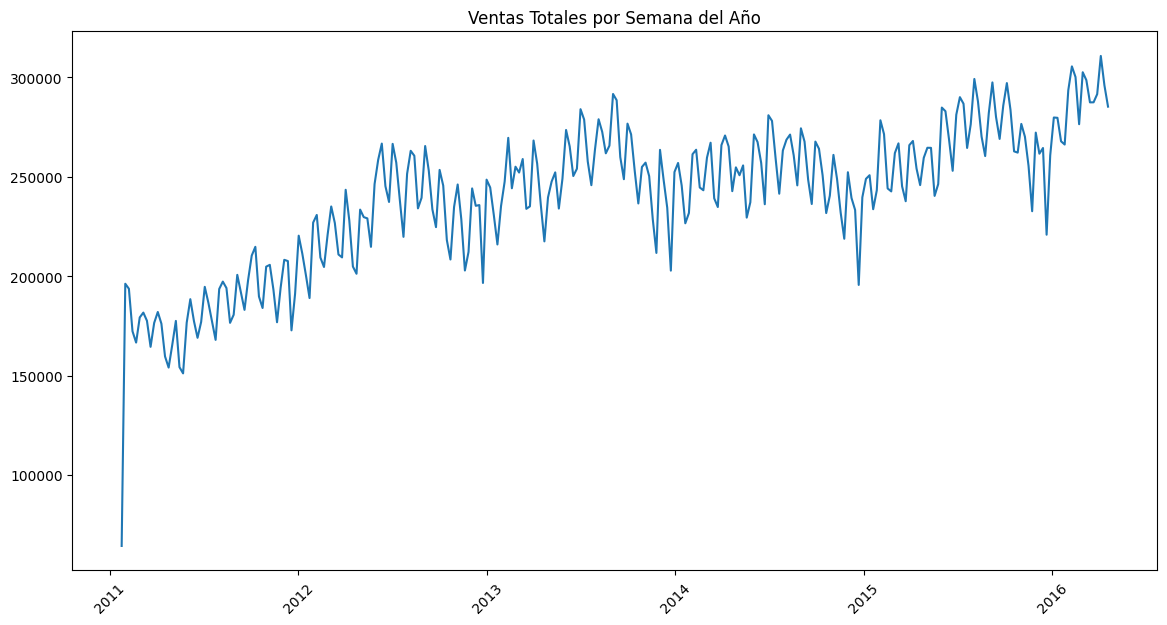

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'yearweek' está como string
ventas_semanales['yearweek'] = ventas_semanales['yearweek'].astype(str)

# Crear nuevas columnas 'año' y 'semana' a partir de la columna 'yearweek'
ventas_semanales['año'] = ventas_semanales['yearweek'].str[:4].astype(int)
ventas_semanales['semana'] = ventas_semanales['yearweek'].str[4:].astype(int)

# Crear la columna 'fecha_inicio_semana' que representa el primer día de la semana (lunes)
ventas_semanales['fecha_inicio_semana'] = pd.to_datetime(ventas_semanales['año'].astype(str) + ventas_semanales['semana'].astype(str).str.zfill(2) + '1', format='%G%V%u')

# Verificar las primeras filas de la nueva columna
print(ventas_semanales[['yearweek', 'año', 'semana', 'fecha_inicio_semana']].head())

# Graficar utilizando la nueva variable 'fecha_inicio_semana'
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_semanales, x='fecha_inicio_semana', y='ventas', color='#1F77B4')

plt.title('Ventas Totales por Semana del Año')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()



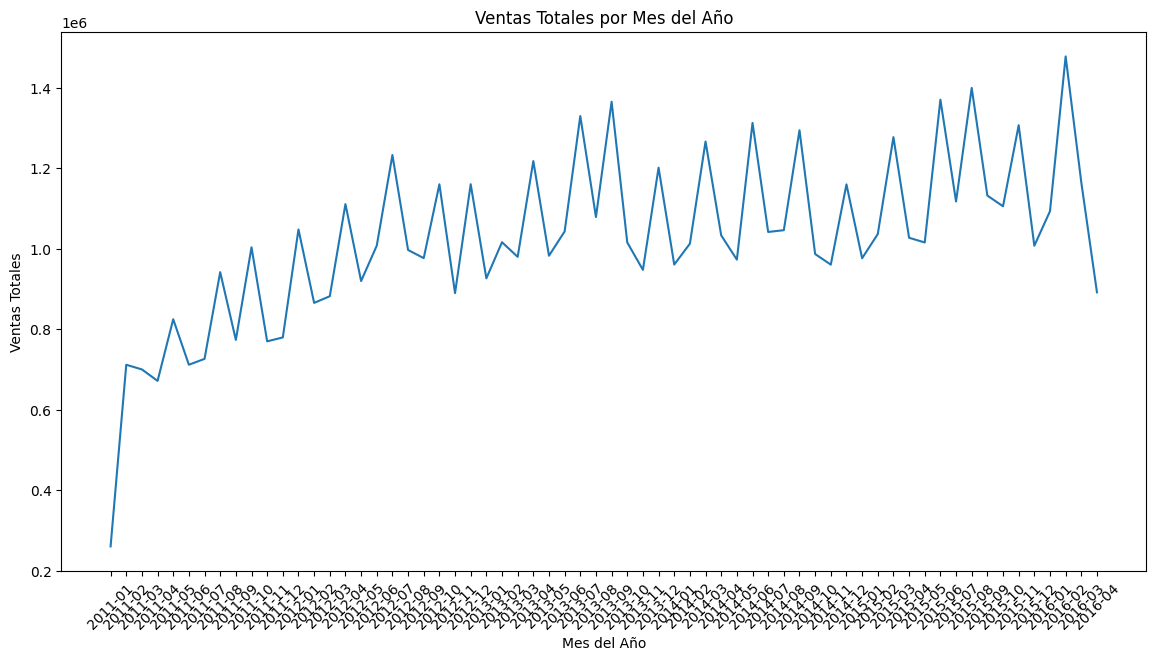

In [10]:
# Ventas por mes_año
ventas_mensuales = df_item.groupby('mes_año')['ventas'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_mensuales, x='mes_año', y='ventas', color='#1F77B4')
plt.title('Ventas Totales por Mes del Año')
plt.xlabel('Mes del Año')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

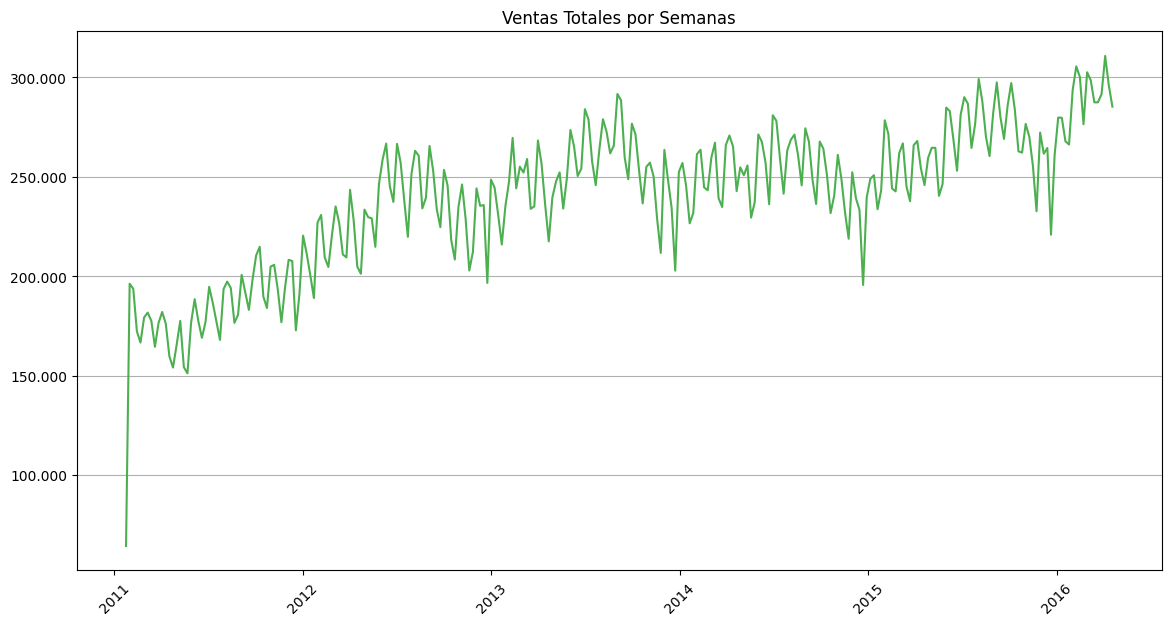

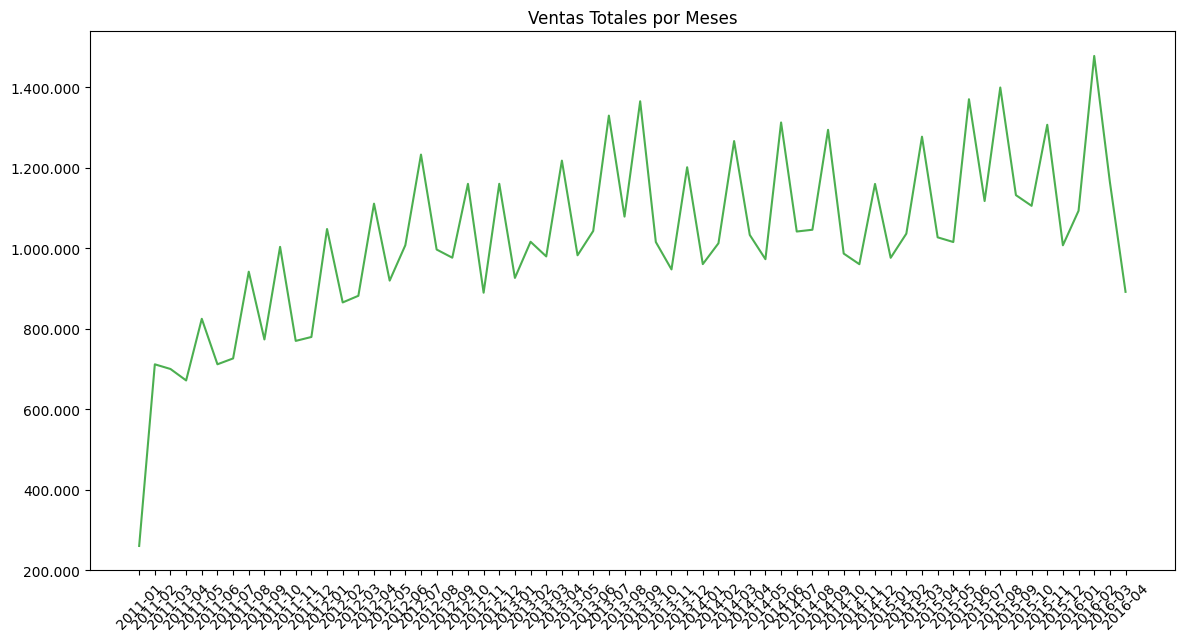

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# Gráfico de ventas semanales
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_semanales, x='fecha_inicio_semana', y='ventas', color='#4CAF50')
plt.grid(True, axis='y')
plt.title('Ventas Totales por Semanas')
plt.xlabel('')
plt.ylabel('')

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

plt.show()

# Gráfico de ventas mensuales
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_mensuales, x='mes_año', y='ventas', color='#4CAF50')

plt.title('Ventas Totales por Meses')
plt.xlabel('')
plt.ylabel('')

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

plt.show()


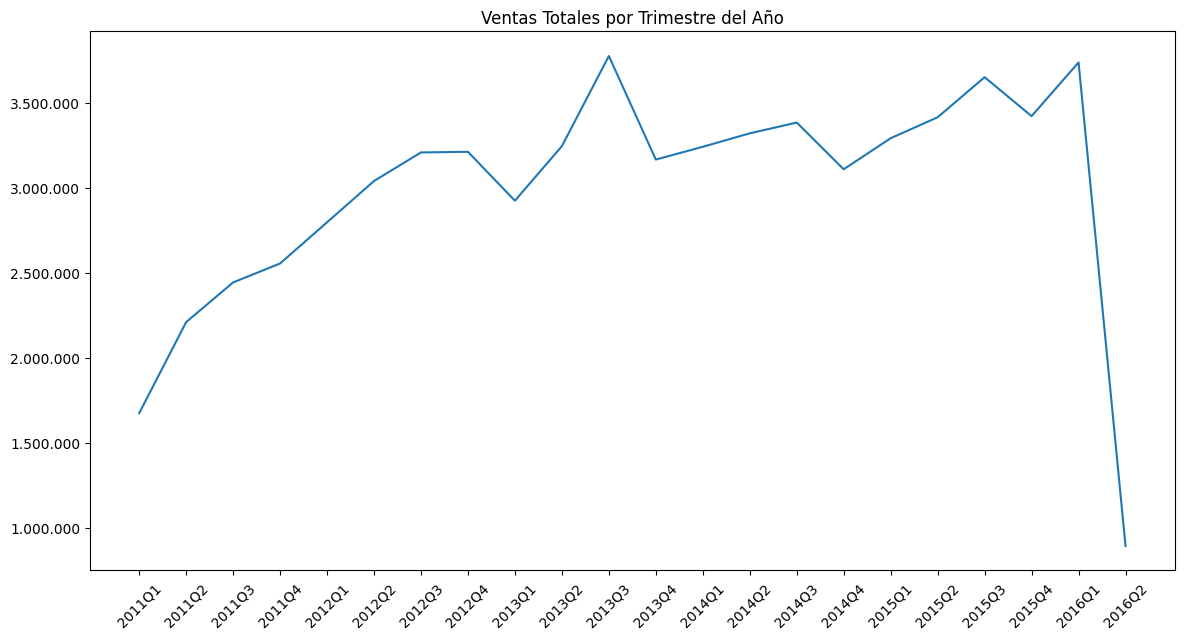

In [12]:
# Ventas por trimestre_año
ventas_trimestrales = df_item.groupby('trimestre_año')['ventas'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_trimestrales, x='trimestre_año', y='ventas', color='#1F77B4')

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.title('Ventas Totales por Trimestre del Año')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

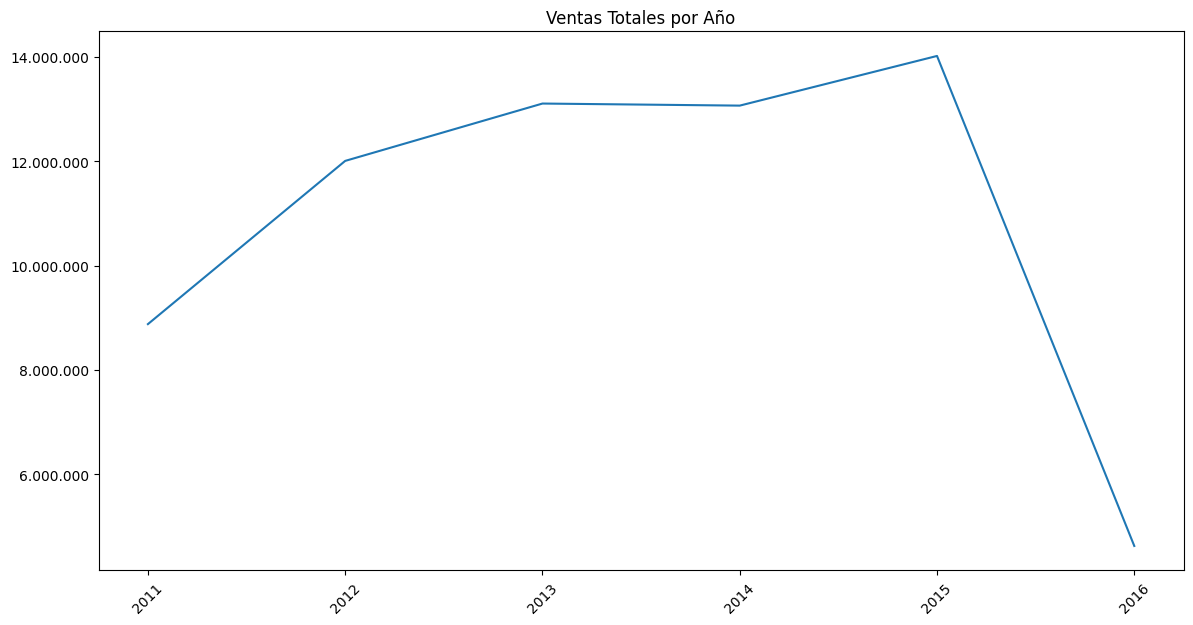

In [13]:

# Agrupar los datos por año y sumar las ventas
ventas_anuales = df_item.groupby('año')['ventas'].sum().reset_index()

plt.figure(figsize=(14, 7))

# Graficar las ventas totales por año
sns.lineplot(data=ventas_anuales, x='año', y='ventas', color='#1F77B4')

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título y etiquetas del gráfico
plt.title('Ventas Totales por Año')
plt.xlabel('')
plt.ylabel('')

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


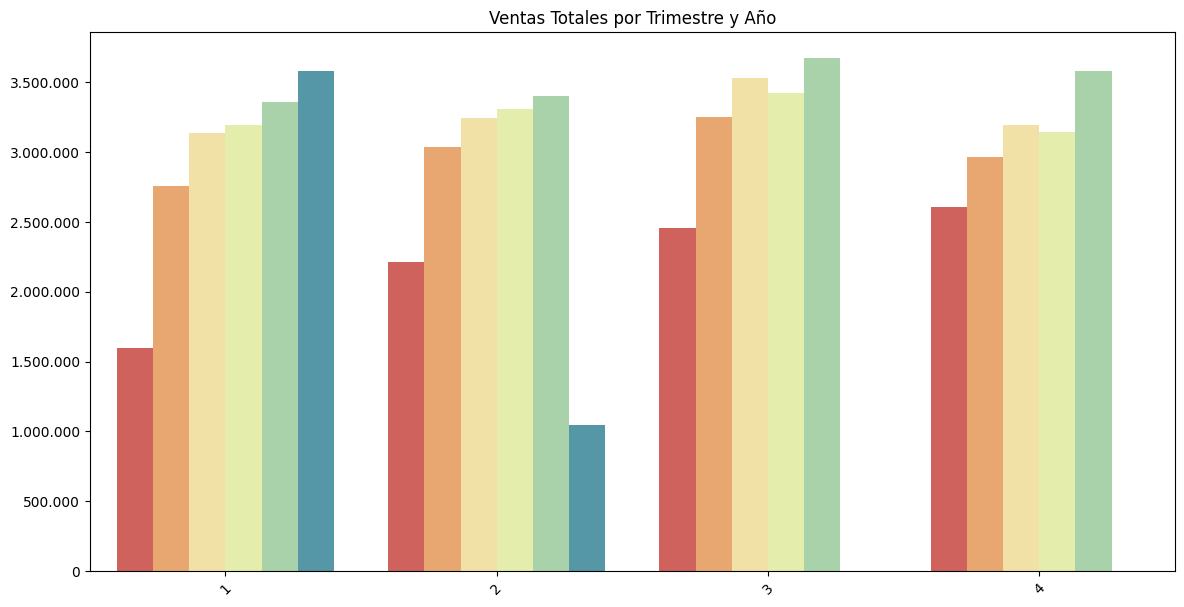

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Agrupar los datos por año y trimestre
ventas_trimestrales = df_item.groupby(['año', 'trimestre'])['ventas'].sum().reset_index()

# Definir una paleta de colores con mayor contraste
colors = sns.color_palette("Spectral", n_colors=6)  # Usamos la paleta 'Spectral' que tiene más contraste

plt.figure(figsize=(14, 7))

# Crear el gráfico sin la leyenda
sns.barplot(data=ventas_trimestrales, x='trimestre', y='ventas', hue='año', palette=colors, dodge=True, legend=False)

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.title('Ventas Totales por Trimestre y Año')
plt.xlabel('')
plt.ylabel('')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45)

plt.show()


#2: Ventas por tienda y región

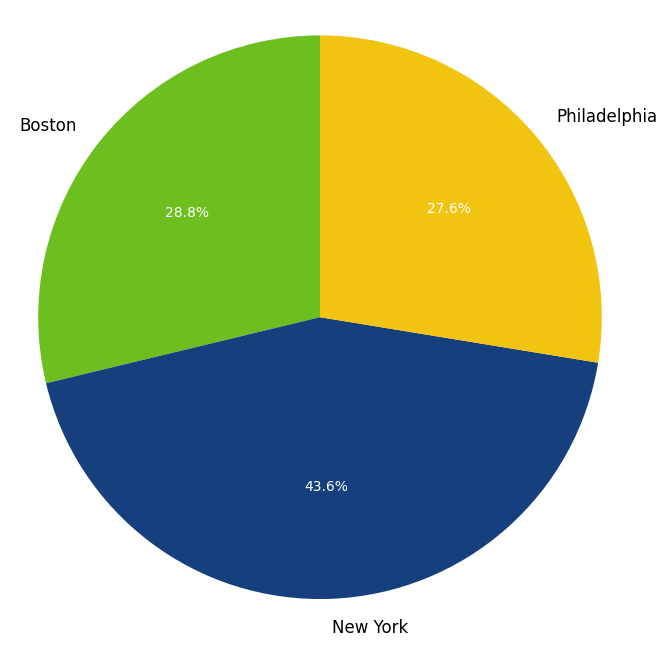

In [15]:
import matplotlib.pyplot as plt

# Agrupar las ventas totales por tienda
ventas_tienda = df_item.groupby('region')['ventas'].sum().reset_index()

# Definir los colores del logo: verde, azul marino y amarillo
colors = ['#6CBF1F', '#153F7D', '#F1C40F'] * (len(ventas_tienda) // 3)

# Crear la gráfica de tarta
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(ventas_tienda['ventas'], labels=ventas_tienda['region'],
                                   colors=colors, autopct='%1.1f%%', startangle=90,
                                   textprops=dict(color="black"))

# Asegurar que el gráfico de tarta sea circular
plt.axis('equal')

# Ajustar el tamaño del texto dentro del gráfico
for text in texts:
    text.set_fontsize(12)  # Aumentar el tamaño del nombre de la ciudad
for autotext in autotexts:
    autotext.set_color('white')  # Color del porcentaje en negro
    autotext.set_fontsize(10)  # Tamaño de los porcentajes

# Título del gráfico
plt.title('')

# Mostrar gráfico
plt.show()



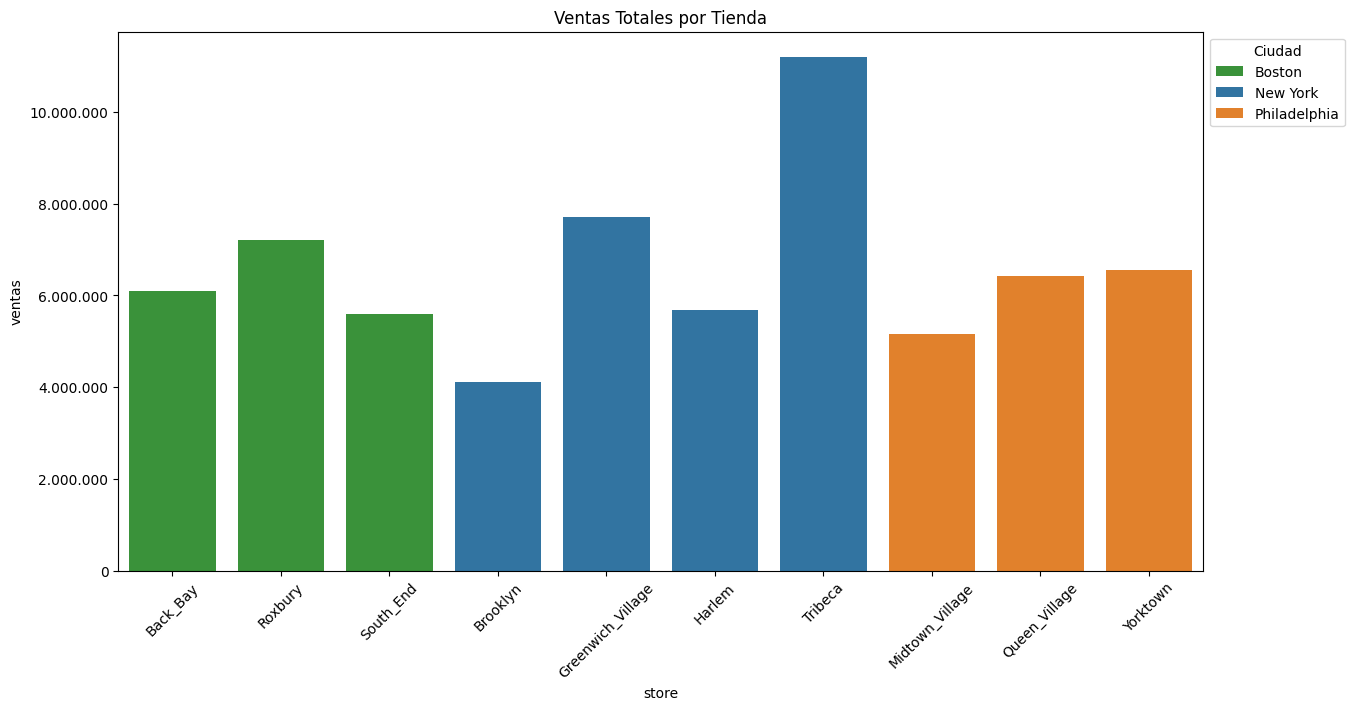

In [16]:

# Agrupar los datos por tienda y sumar las ventas
ventas_por_tienda = df_item.groupby(['store', 'region'])['ventas'].sum().reset_index()

# Ordenar los datos por ciudad (region) para agrupar las tiendas por ciudad
ventas_por_tienda = ventas_por_tienda.sort_values(by='region')

# Definir una paleta de colores para las ciudades (regiones)
colors = {'New York': '#1F77B4', 'Boston': '#2CA02C', 'Philadelphia': '#FF7F0E'}

plt.figure(figsize=(14, 7))

# Graficar las ventas por tienda, usando 'region' como color para las barras
sns.barplot(data=ventas_por_tienda, x='store', y='ventas', hue='region', palette=colors)

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título y etiquetas del gráfico
plt.title('Ventas Totales por Tienda')


# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda y ajustar su posición
plt.legend(title='Ciudad', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()



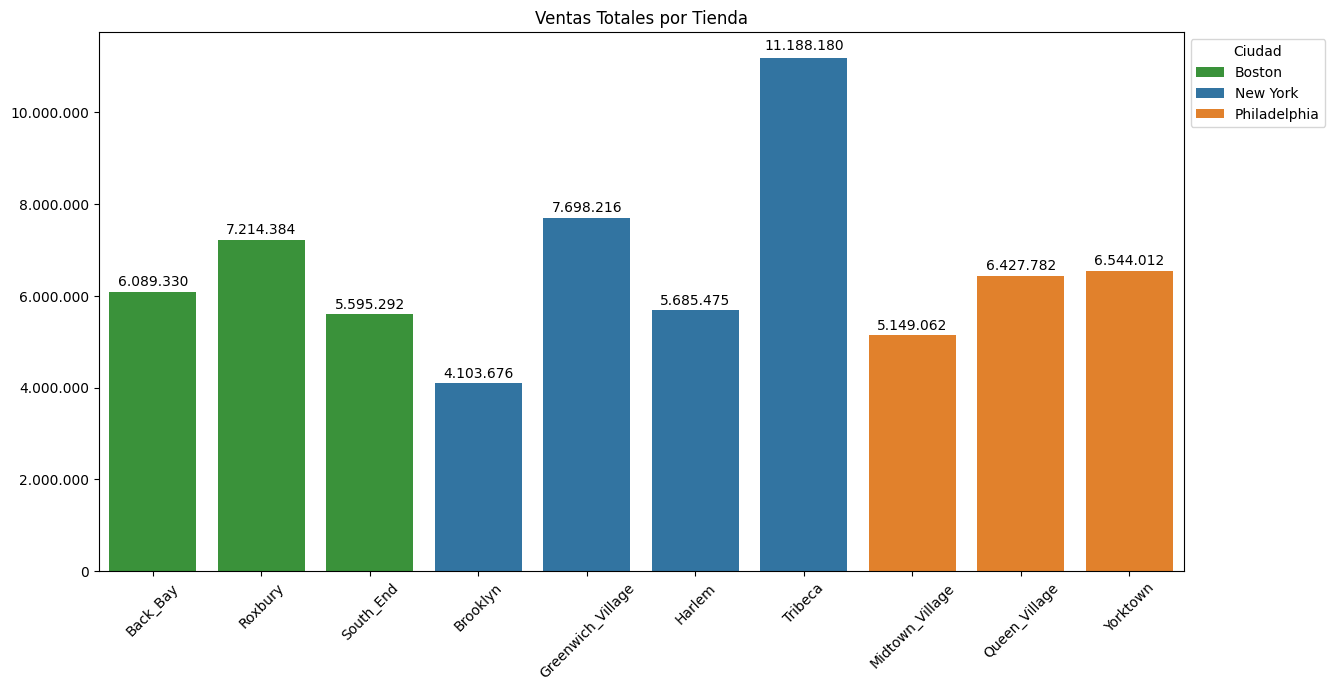

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Agrupar los datos por tienda y sumar las ventas
ventas_por_tienda = df_item.groupby(['store', 'region'])['ventas'].sum().reset_index()

# Ordenar los datos por ciudad (region) para agrupar las tiendas por ciudad
ventas_por_tienda = ventas_por_tienda.sort_values(by='region')

# Definir una paleta de colores para las ciudades (regiones)
colors = {'New York': '#1F77B4', 'Boston': '#2CA02C', 'Philadelphia': '#FF7F0E'}

plt.figure(figsize=(14, 7))

# Graficar las ventas por tienda, usando 'region' como color para las barras
ax = sns.barplot(data=ventas_por_tienda, x='store', y='ventas', hue='region', palette=colors)

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título del gráfico
plt.title('Ventas Totales por Tienda')

# Eliminar las etiquetas de los ejes X e Y
plt.xlabel('')
plt.ylabel('')

# Mostrar el valor de ventas directamente encima de cada barra
for p in ax.patches:
    height = p.get_height()  # Altura de la barra
    if height > 0:  # Mostrar el texto solo si el valor es mayor que 0
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01,  # Posición del texto
                f"{int(height):,}".replace(",", "."),  # Texto del valor con formato
                ha="center", va="bottom", fontsize=10)  # Centramos el texto horizontalmente y ajustamos la altura

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda y ajustar su posición
plt.legend(title='Ciudad', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


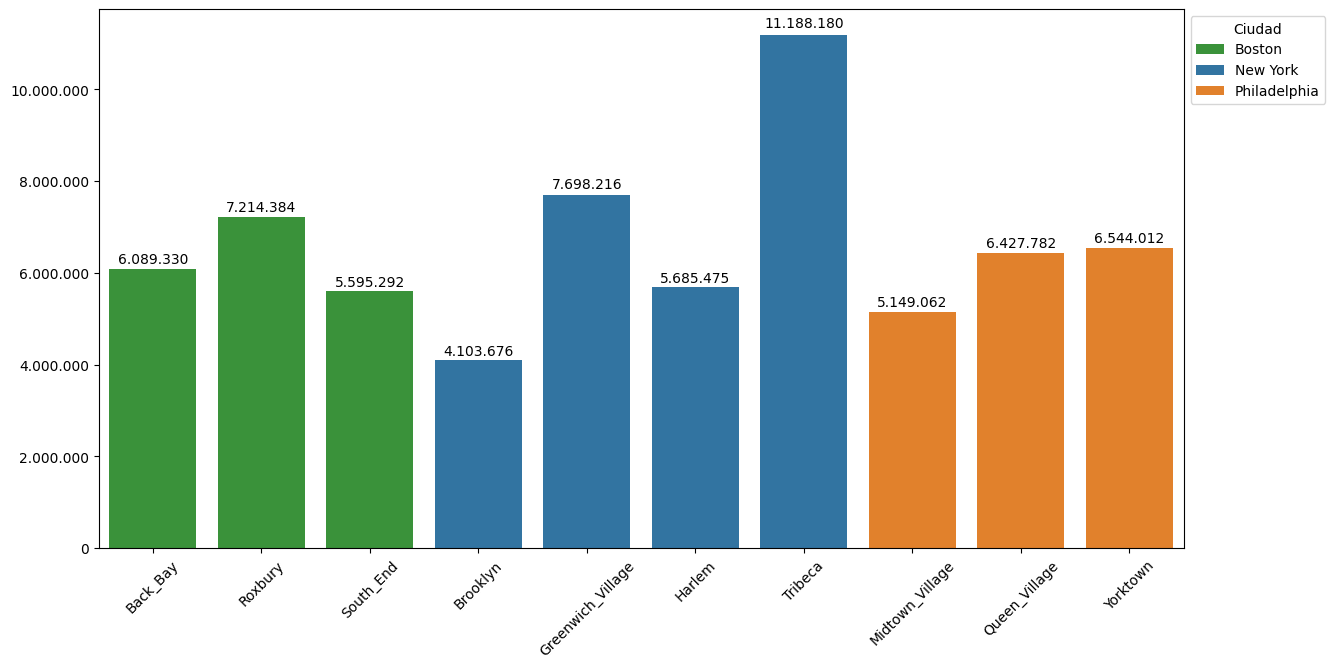

In [18]:
# Agrupar los datos por tienda y sumar las ventas
ventas_por_tienda = df_item.groupby(['store', 'region'])['ventas'].sum().reset_index()

# Ordenar los datos por ciudad (region) para agrupar las tiendas por ciudad
ventas_por_tienda = ventas_por_tienda.sort_values(by='region')

# Definir una paleta de colores para las ciudades (regiones)
colors = {'New York': '#1F77B4', 'Boston': '#2CA02C', 'Philadelphia': '#FF7F0E'}

plt.figure(figsize=(14, 7))

# Graficar las ventas por tienda, usando 'region' como color para las barras
ax = sns.barplot(data=ventas_por_tienda, x='store', y='ventas', hue='region', palette=colors)

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título del gráfico
plt.title('')

# Eliminar las etiquetas de los ejes X e Y
plt.xlabel('')
plt.ylabel('')

# Mostrar el valor de ventas directamente encima de cada barra
for p in ax.patches:
    height = p.get_height()  # Altura de la barra
    if height > 0:  # Mostrar el texto solo si el valor es mayor que 0
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01,  # Posición del texto
                f"{int(height):,}".replace(",", "."),  # Texto del valor con formato
                ha="center", va="bottom", fontsize=10)  # Centramos el texto horizontalmente y ajustamos la altura

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda y ajustar su posición
plt.legend(title='Ciudad', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<ipython-input-19-7436031fc8fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_region, x='region', y='ventas', palette=city_colors.values())


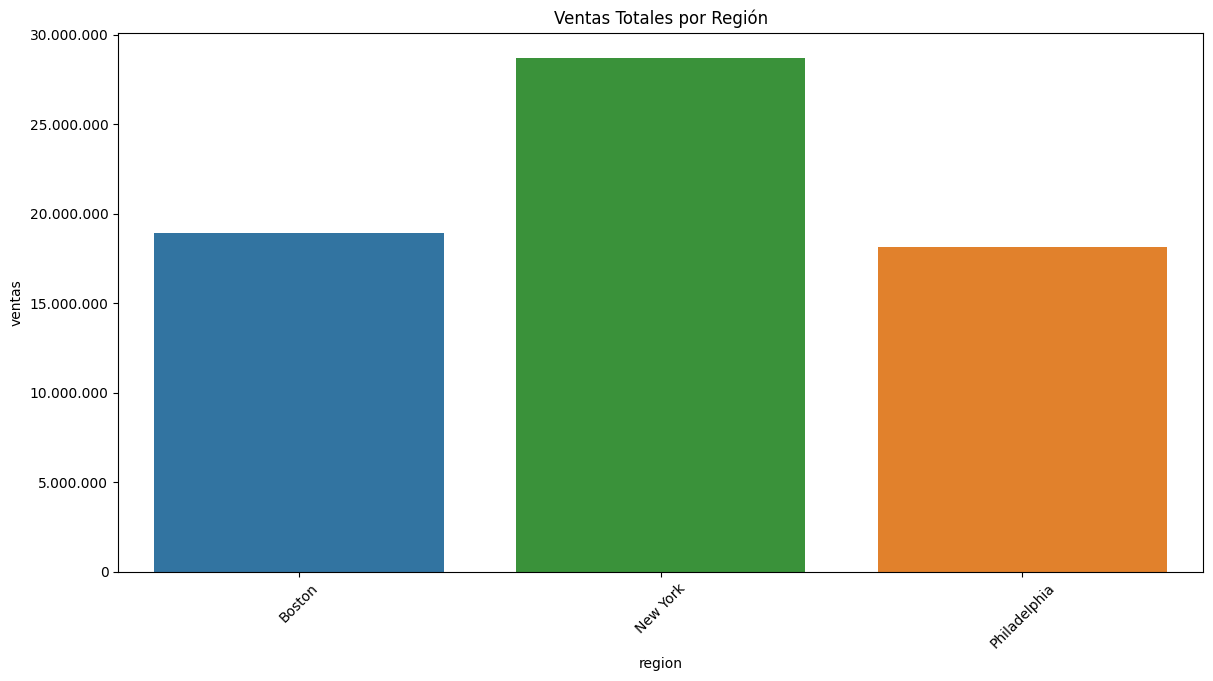

In [19]:
# Ventas por región
ventas_por_region = df_item.groupby('region')['ventas'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_por_region, x='region', y='ventas', palette=city_colors.values())

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.title('Ventas Totales por Región')
plt.xticks(rotation=45)
plt.show()



<ipython-input-38-9027931de097>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=ventas_por_region, x='region', y='ventas', palette=city_colors.values())


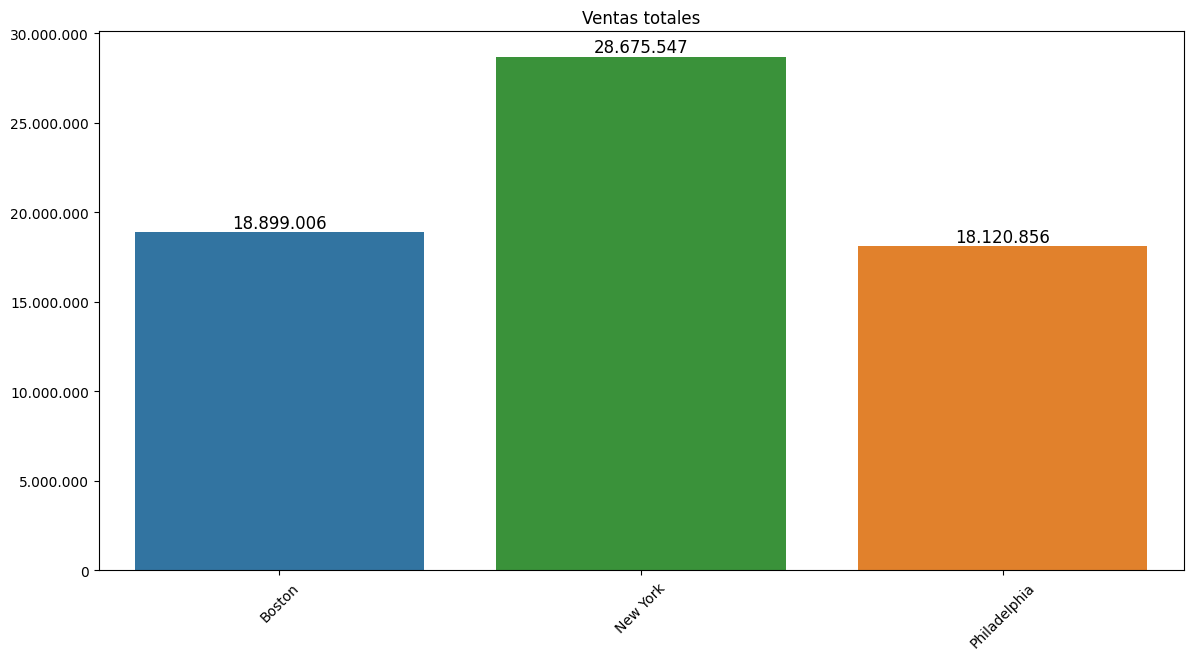

In [38]:

# Agrupar los datos por región y sumar las ventas
ventas_por_region = df_item.groupby('region')['ventas'].sum().reset_index()

# Definir una paleta de colores (usamos los colores que ya tienes en 'city_colors')
city_colors = {'New York': '#1F77B4', 'Boston': '#2CA02C', 'Philadelphia': '#FF7F0E'}

plt.figure(figsize=(14, 7))

# Graficar las ventas por región
ax = sns.barplot(data=ventas_por_region, x='region', y='ventas', palette=city_colors.values())

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título del gráfico
plt.title('Ventas totales')

# Eliminar las etiquetas de los ejes X e Y
plt.xlabel('')
plt.ylabel('')

# Mostrar el valor de ventas encima de cada barra con ajustes de tamaño, color y posición
for index, row in ventas_por_region.iterrows():
    ax.text(index, row['ventas'] + row['ventas'] * 0.001, f"{int(row['ventas']):,}".replace(",", "."),
            color='black', ha="center", va="bottom", fontsize=12)

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

plt.show()


#3: Estacionalidad semanal por región

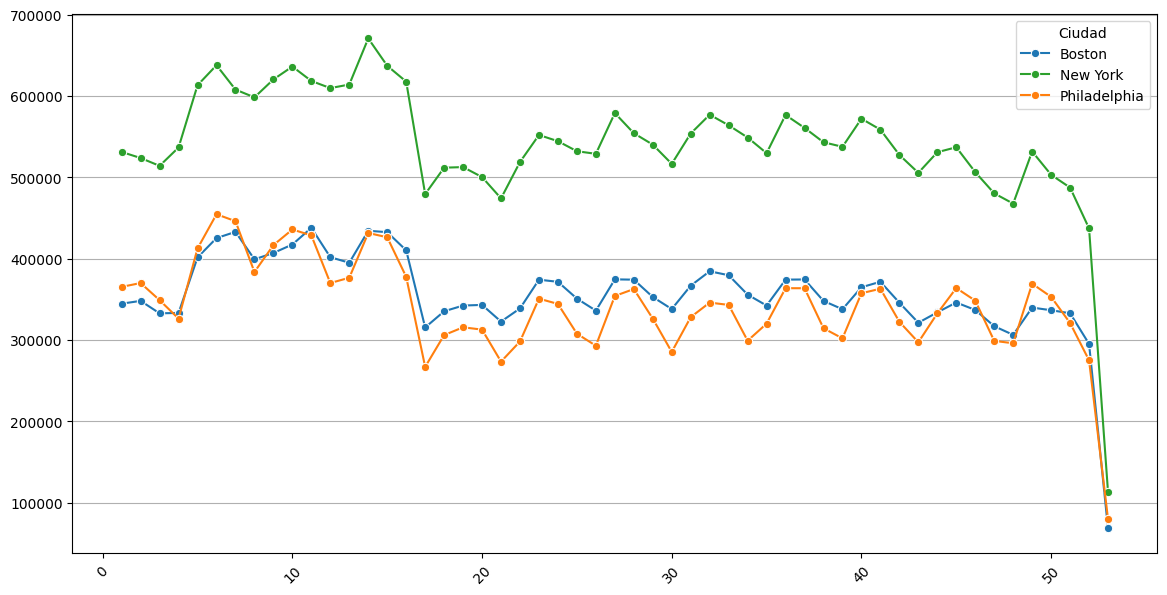

In [21]:
# Agrupar los datos por semana y ciudad (región)
ventas_semanales_ciudad = df_item.groupby(['semana', 'region'])['ventas'].sum().reset_index()

plt.figure(figsize=(14, 7))

# Graficar las ventas totales por semana y ciudad
sns.lineplot(data=ventas_semanales_ciudad, x='semana', y='ventas', hue='region', palette=city_colors.values(), marker='o')

# Título del gráfico
plt.title('')

# Eliminar las etiquetas de los ejes X e Y
plt.xlabel('')
plt.ylabel('')

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend(title='Ciudad')

# Mostrar solo líneas horizontales en la cuadrícula
plt.grid(True, axis='y')

plt.show()


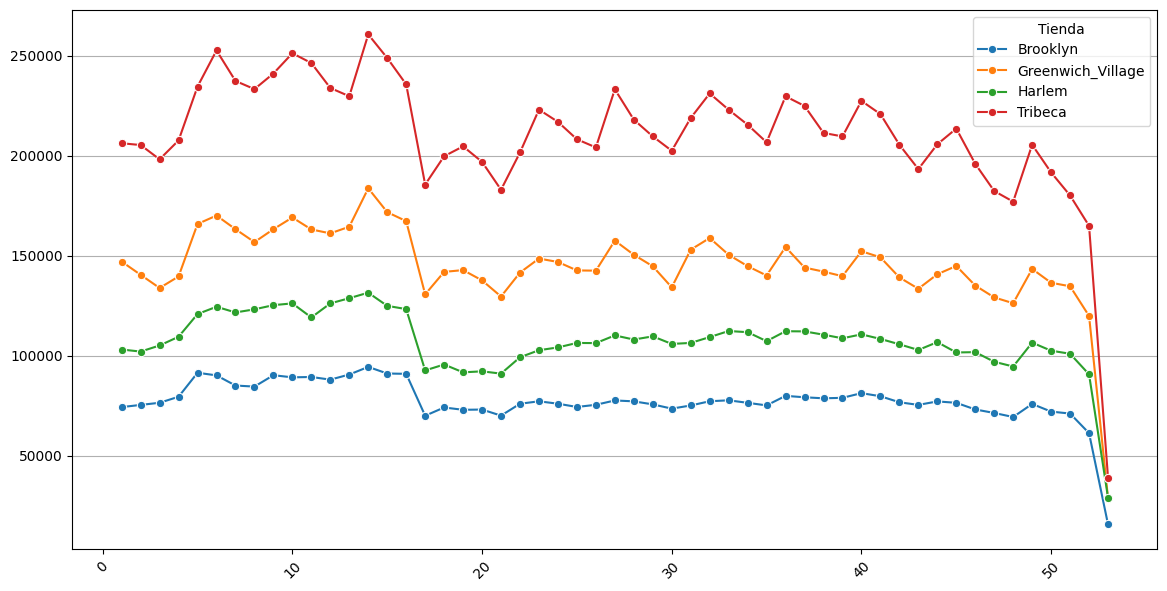

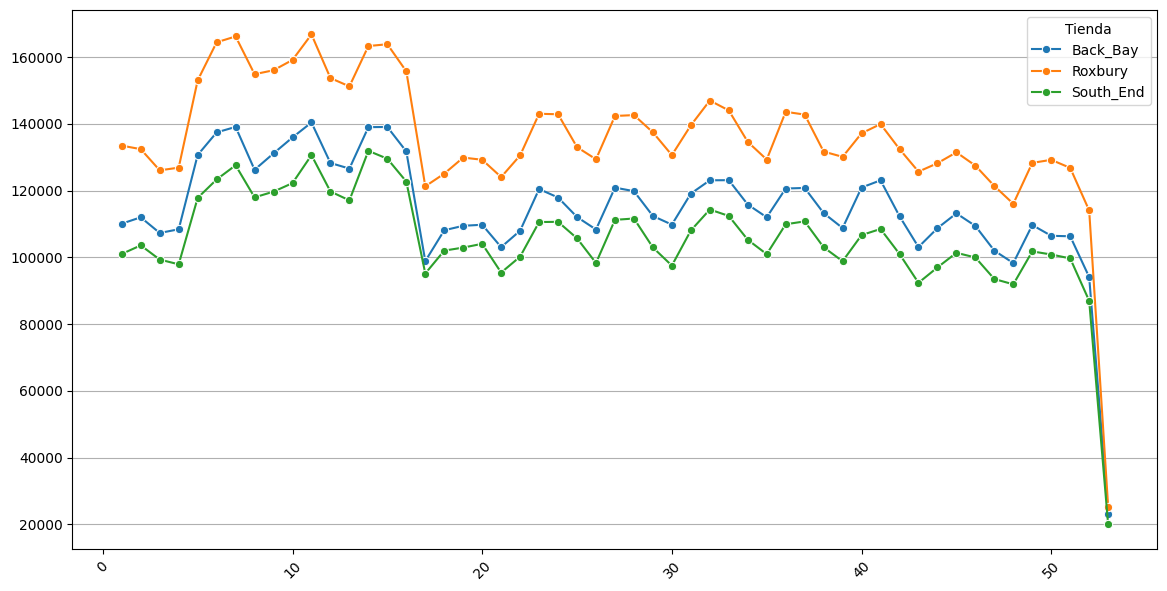

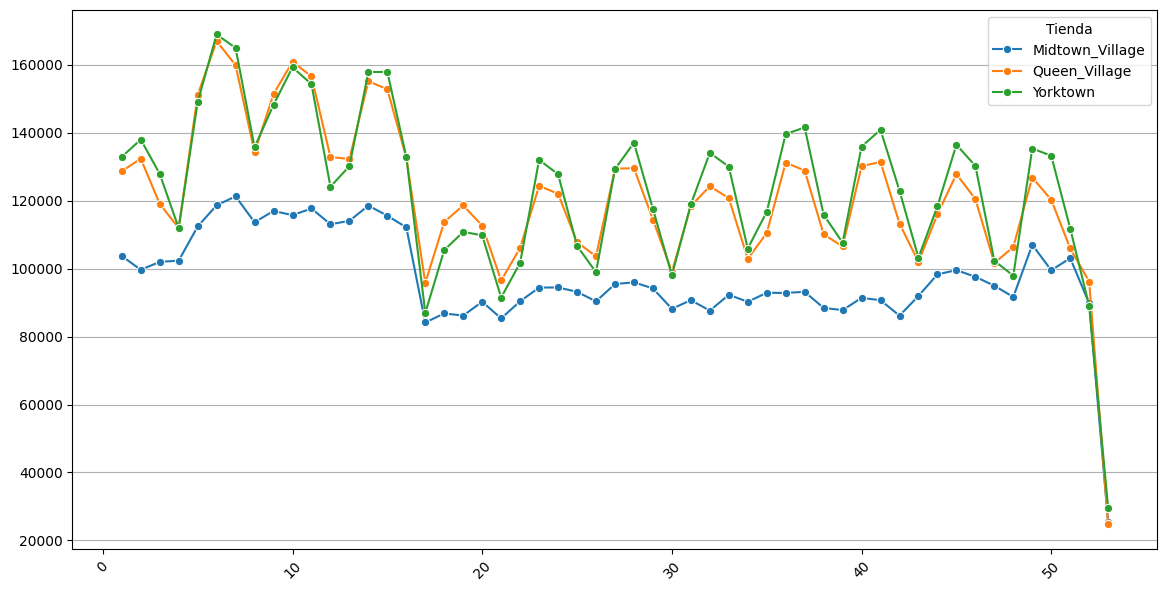

In [22]:
# Agrupar los datos por semana y tienda para cada ciudad
ventas_semanales_ny = df_item[df_item['region'] == 'New York'].groupby(['semana', 'store'])['ventas'].sum().reset_index()
ventas_semanales_boston = df_item[df_item['region'] == 'Boston'].groupby(['semana', 'store'])['ventas'].sum().reset_index()
ventas_semanales_philadelphia = df_item[df_item['region'] == 'Philadelphia'].groupby(['semana', 'store'])['ventas'].sum().reset_index()

# Crear los gráficos para cada ciudad
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_semanales_ny, x='semana', y='ventas', hue='store', marker='o')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.grid(True, axis='y')  # Solo líneas horizontales en la cuadrícula
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_semanales_boston, x='semana', y='ventas', hue='store', marker='o')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.grid(True, axis='y')  # Solo líneas horizontales en la cuadrícula
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_semanales_philadelphia, x='semana', y='ventas', hue='store', marker='o')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.grid(True, axis='y')  # Solo líneas horizontales en la cuadrícula
plt.show()


#4: Análisis de productos más vendidos y menos vendidos

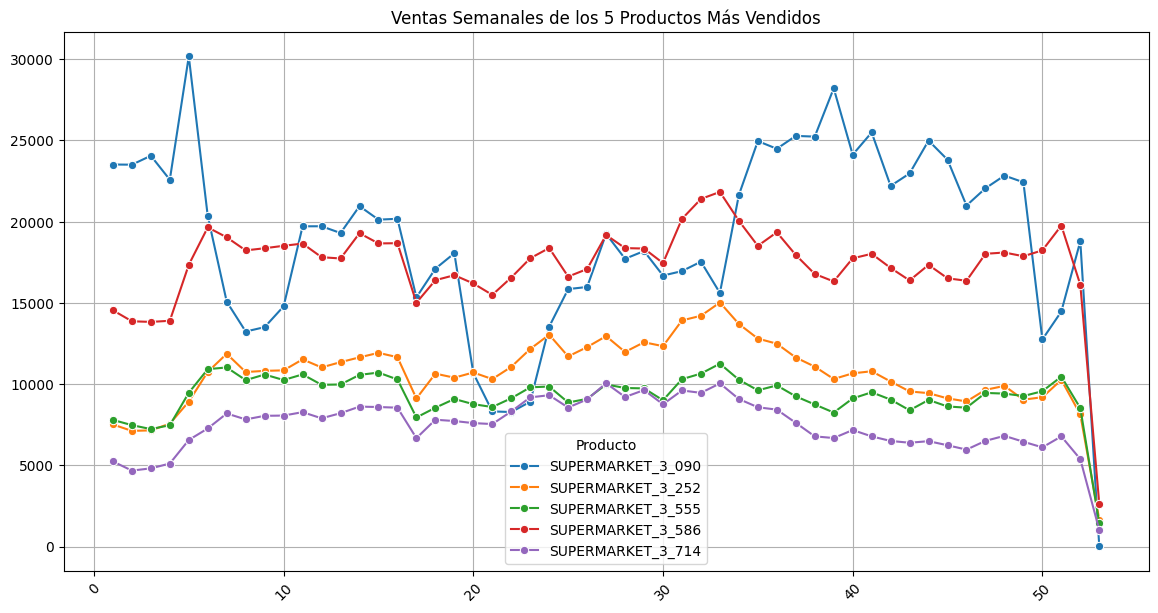

In [23]:
# Agrupar por semana y producto, y calcular ventas totales por semana para cada producto
ventas_por_producto_semana = df_item.groupby(['semana', 'item'])['ventas'].sum().reset_index()

# Obtener los 10 productos más vendidos en total
top_productos_total = ventas_por_producto_semana.groupby('item')['ventas'].sum().nlargest(5).index

# Filtrar solo las ventas de los 10 productos más vendidos
ventas_top_productos_semana = ventas_por_producto_semana[ventas_por_producto_semana['item'].isin(top_productos_total)]

# Graficar las ventas de los 10 productos más vendidos por semana
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_top_productos_semana, x='semana', y='ventas', hue='item', marker='o')
plt.title('Ventas Semanales de los 5 Productos Más Vendidos')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Producto')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

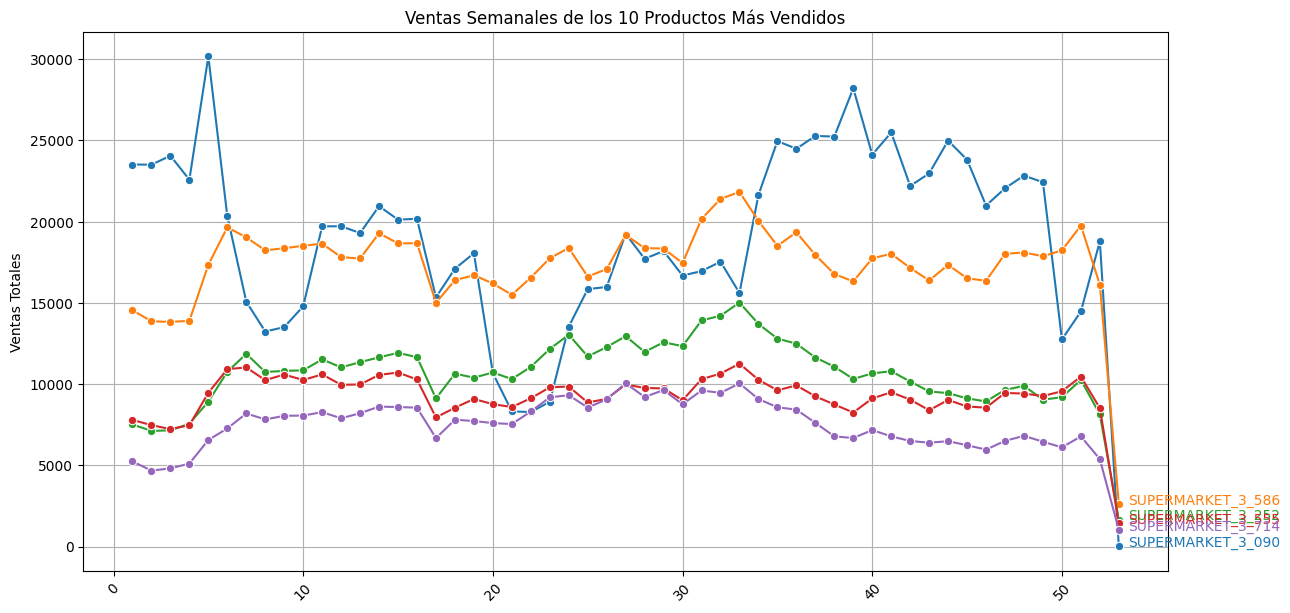

In [24]:
import numpy as np

# Graficar las ventas de los 10 productos más vendidos por semana con etiquetas en las líneas
plt.figure(figsize=(14, 7))

# Crear una paleta de colores
palette = sns.color_palette("tab10", len(top_productos_total))

for i, producto in enumerate(top_productos_total):
    data_producto = ventas_top_productos_semana[ventas_top_productos_semana['item'] == producto]
    sns.lineplot(data=data_producto, x='semana', y='ventas', label=producto, color=palette[i], marker='o')

    # Etiquetar el último punto de cada línea
    plt.text(data_producto['semana'].max() + 0.5, data_producto['ventas'].values[-1],
             producto, color=palette[i], fontsize=10, ha='left')

# Ajustes del gráfico
plt.title('Ventas Semanales de los 10 Productos Más Vendidos')
plt.xlabel('')
plt.ylabel('Ventas Totales')
plt.grid(True)

# Ocultar la leyenda
plt.legend().remove()

plt.xticks(rotation=45)
plt.show()


<ipython-input-25-c81c2651ff94>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


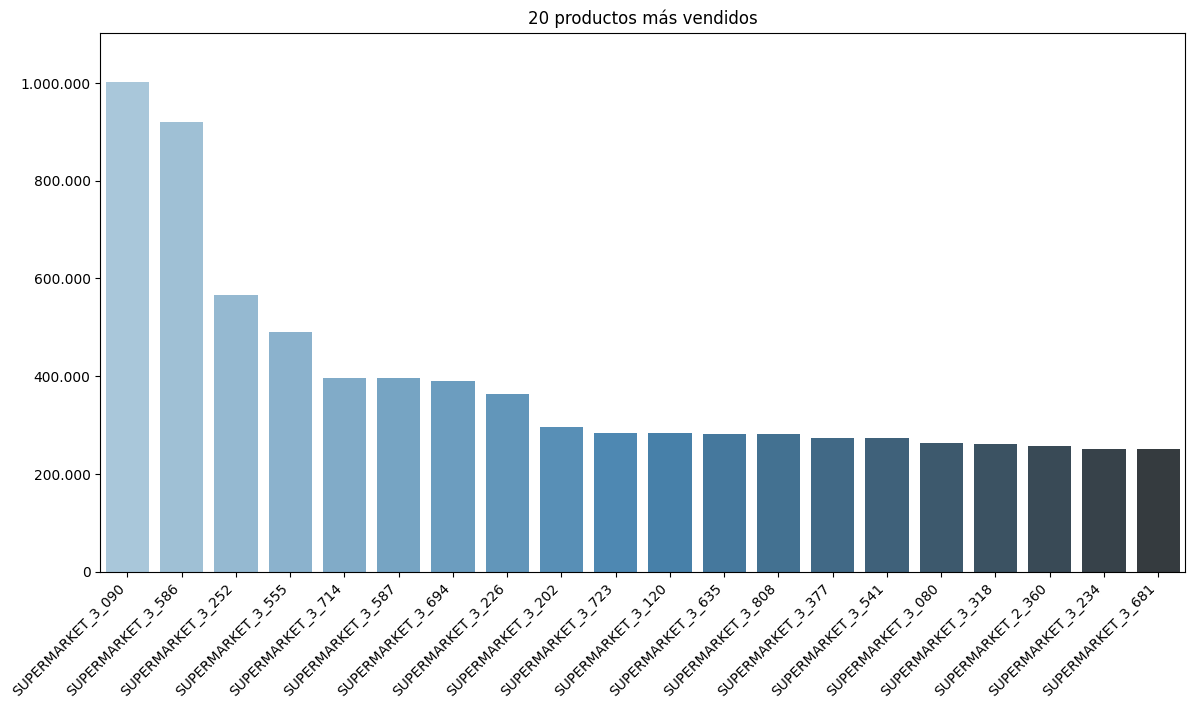

In [25]:
# Top 20 productos más vendidos
ventas_por_producto = df_item.groupby('item')['ventas'].sum().reset_index()
top_20_productos = ventas_por_producto.nlargest(20, 'ventas')

plt.figure(figsize=(14, 7))

# Graficar las ventas de los 20 productos más vendidos con la paleta ajustada
sns.barplot(data=top_20_productos, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Ajustar los límites del eje Y para distribuir mejor los productos
plt.ylim(0, top_20_productos['ventas'].max() * 1.1)

# Título y configuraciones del gráfico
plt.title('20 productos más vendidos')
plt.xlabel('')
plt.ylabel('')

# Rotar y alinear las etiquetas del eje X correctamente con ha="right"
plt.xticks(rotation=45, ha="right")  # Alinear etiquetas a la derecha de su barra correspondiente

plt.show()


<ipython-input-26-1b239cb2f427>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_ciudad, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


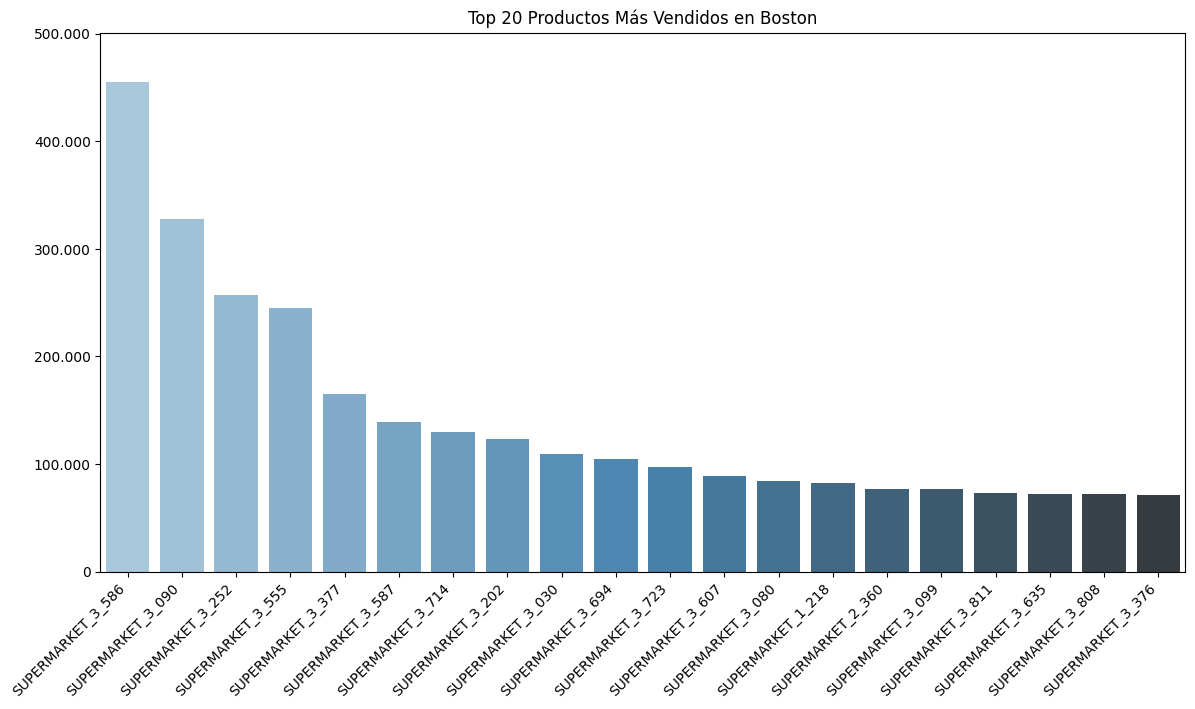

<ipython-input-26-1b239cb2f427>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_ciudad, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


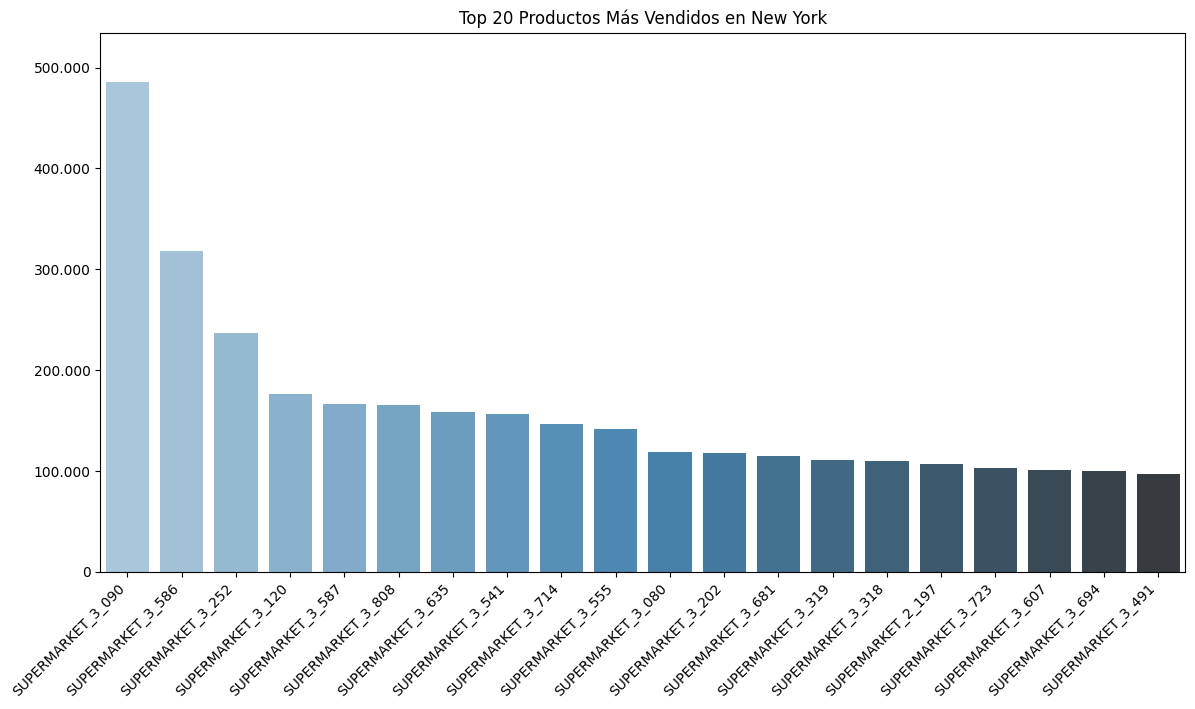

<ipython-input-26-1b239cb2f427>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_ciudad, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


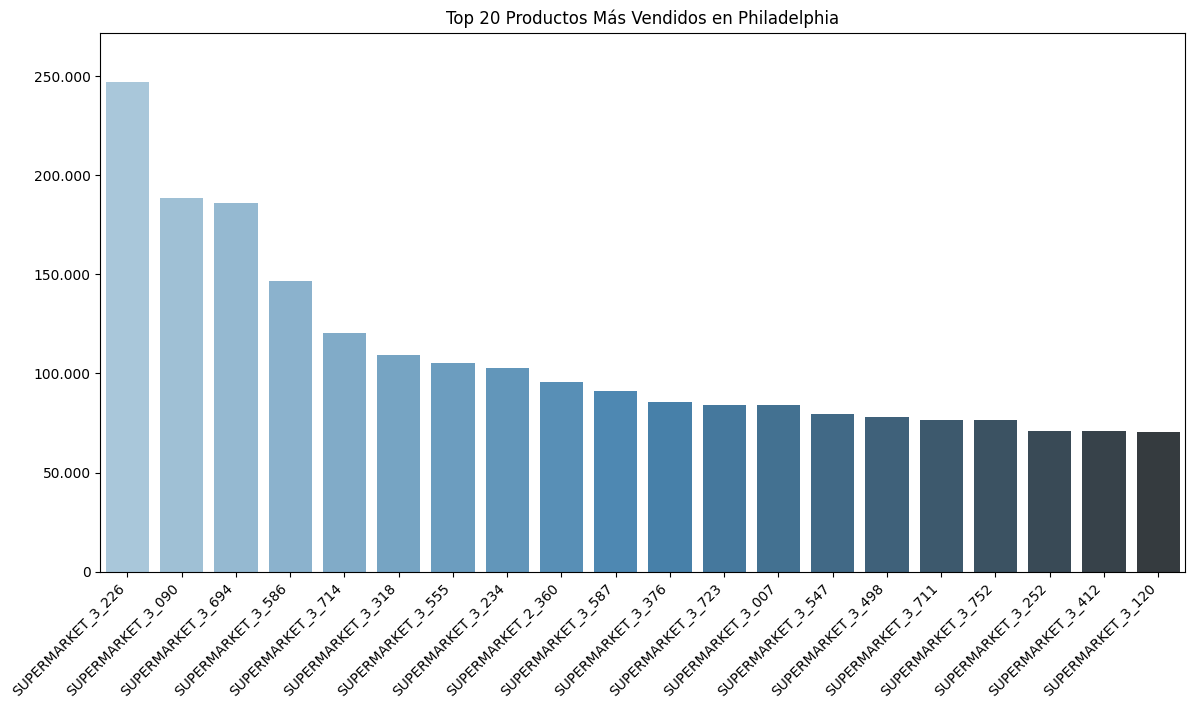

In [26]:

# Filtrar las ventas por ciudad
ciudades = df_item['region'].unique()

for ciudad in ciudades:
    ventas_por_producto_ciudad = df_item[df_item['region'] == ciudad].groupby('item')['ventas'].sum().reset_index()
    top_20_productos_ciudad = ventas_por_producto_ciudad.nlargest(20, 'ventas')

    plt.figure(figsize=(14, 7))

    # Graficar las ventas de los 20 productos más vendidos en la ciudad actual
    sns.barplot(data=top_20_productos_ciudad, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))

    # Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
    plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

    # Ajustar los límites del eje Y
    plt.ylim(0, top_20_productos_ciudad['ventas'].max() * 1.1)

    # Título personalizado para cada ciudad
    plt.title(f'Top 20 Productos Más Vendidos en {ciudad}')

    # Ajustes de ejes
    plt.xlabel('')
    plt.ylabel('')

    # Rotar etiquetas del eje X
    plt.xticks(rotation=45, ha="right")

    # Mostrar gráfico
    plt.show()


<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


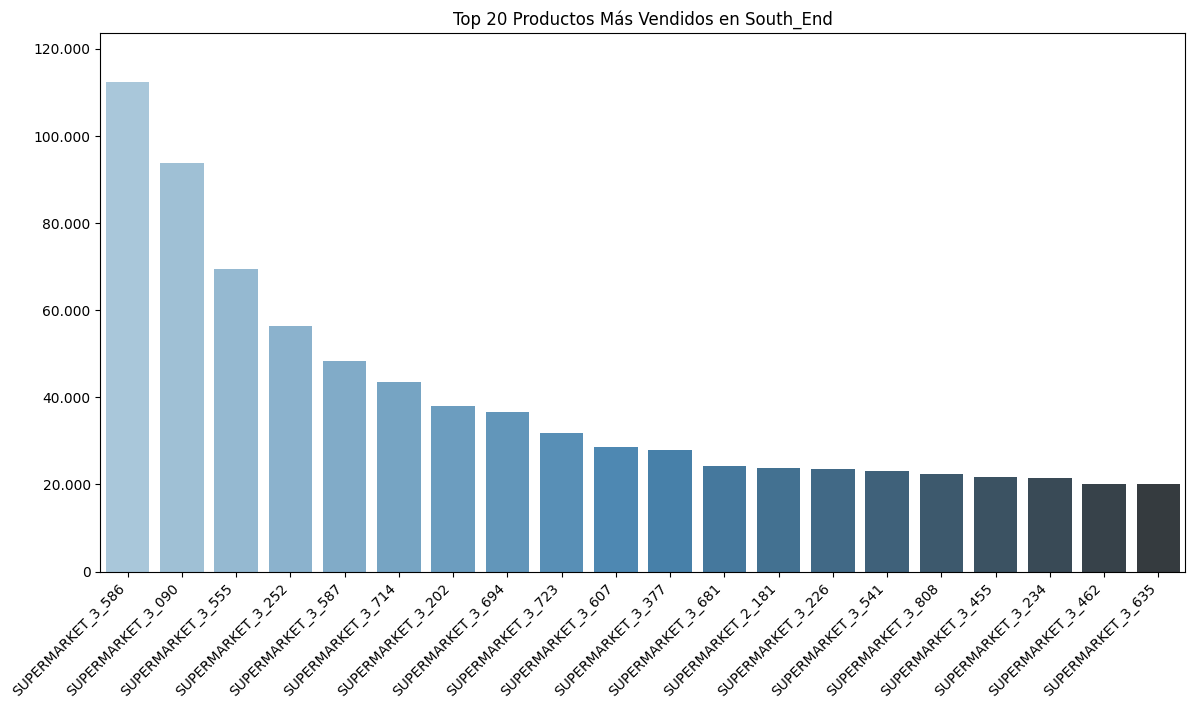

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


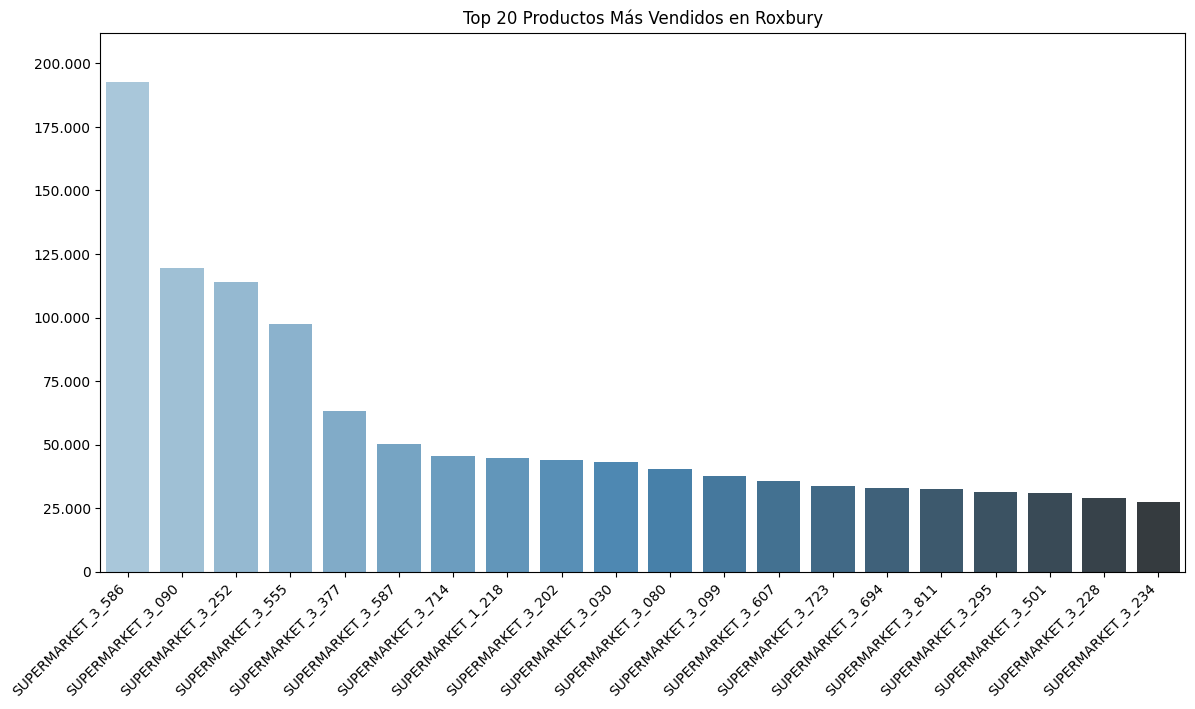

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


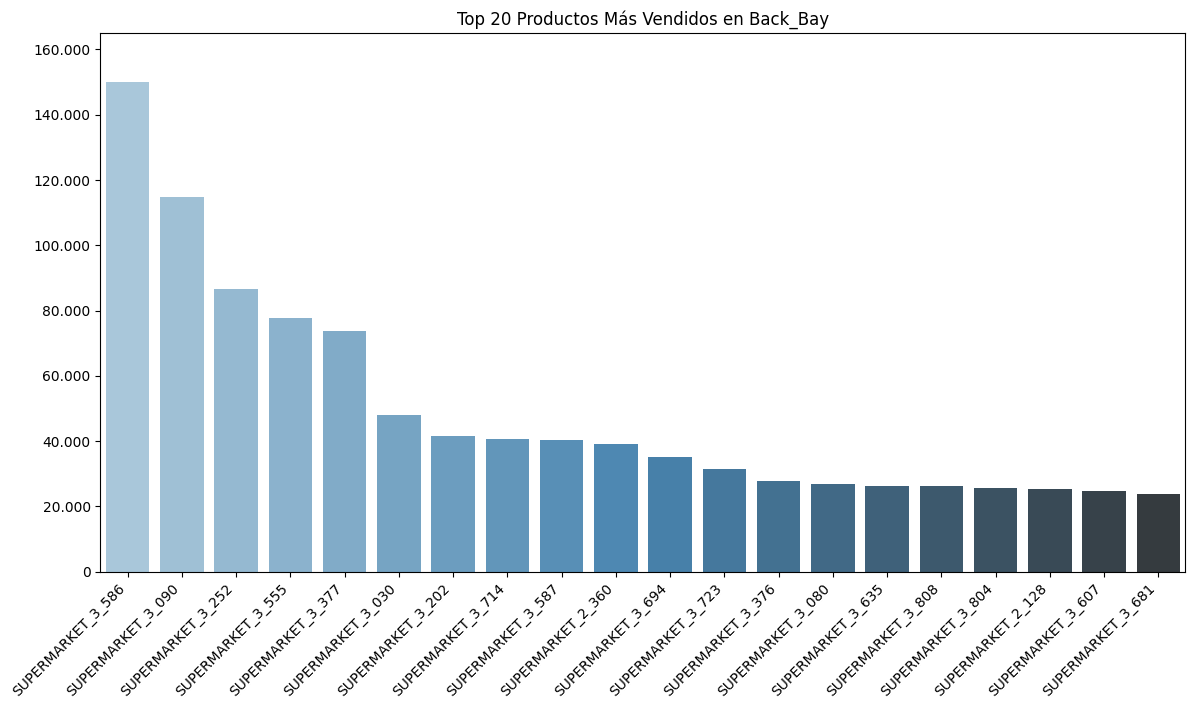

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


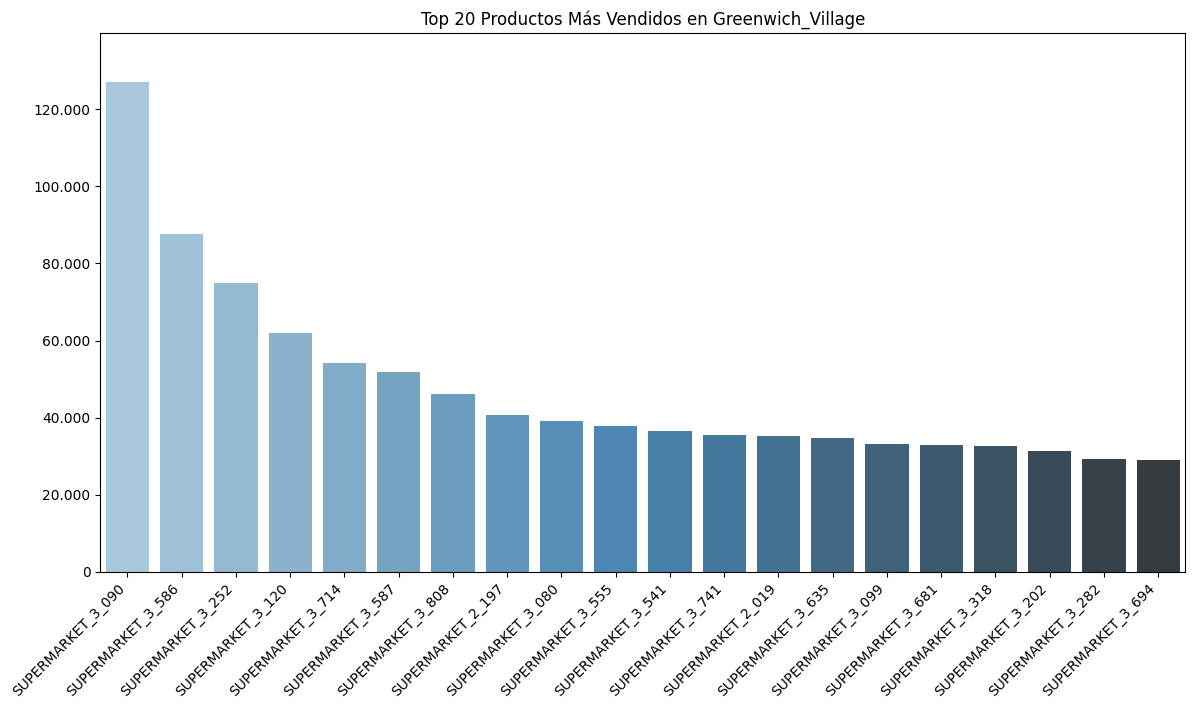

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


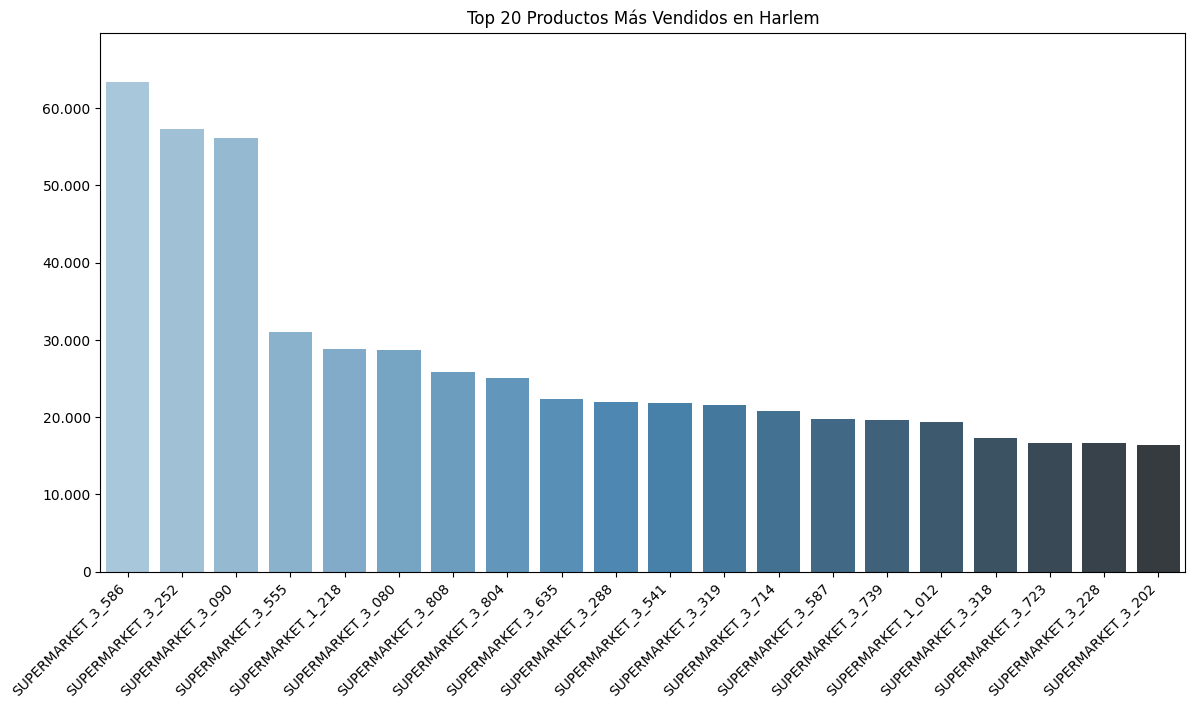

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


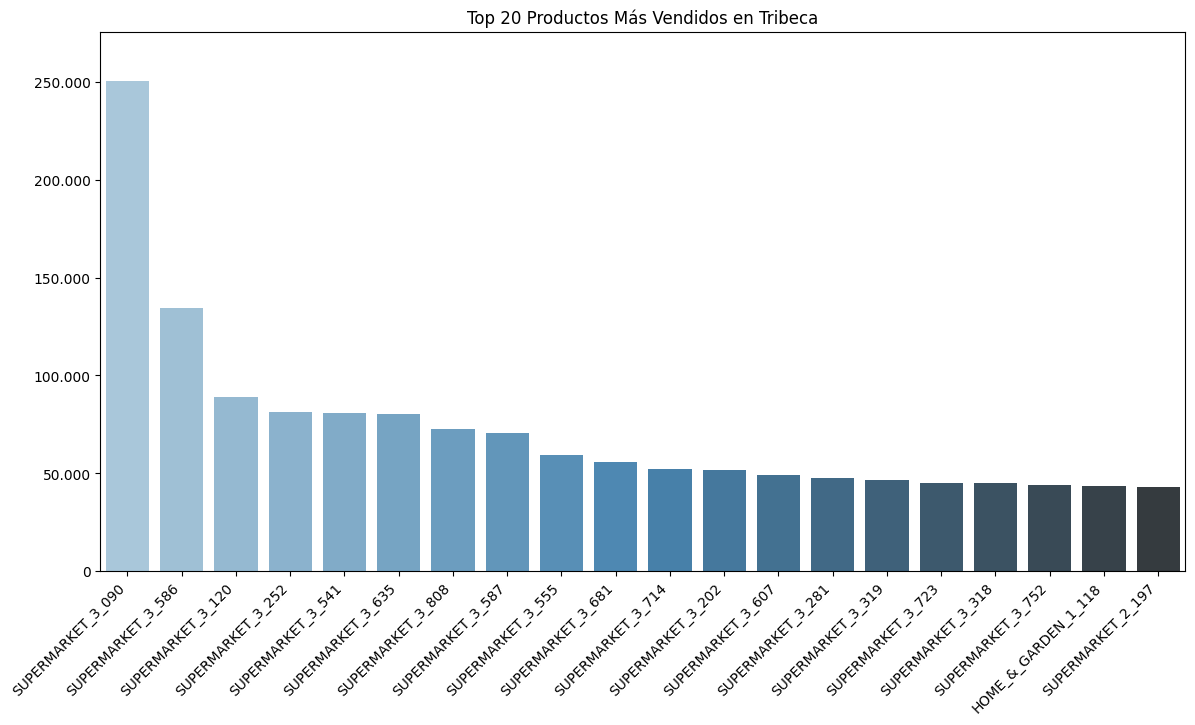

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


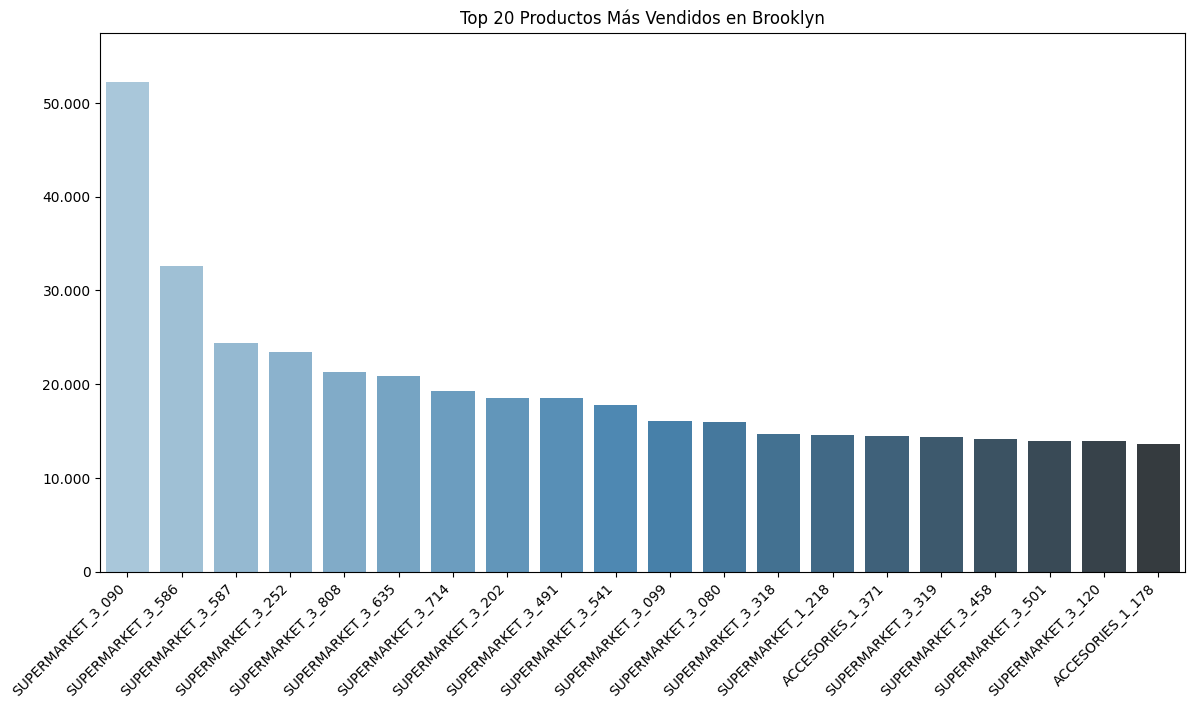

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


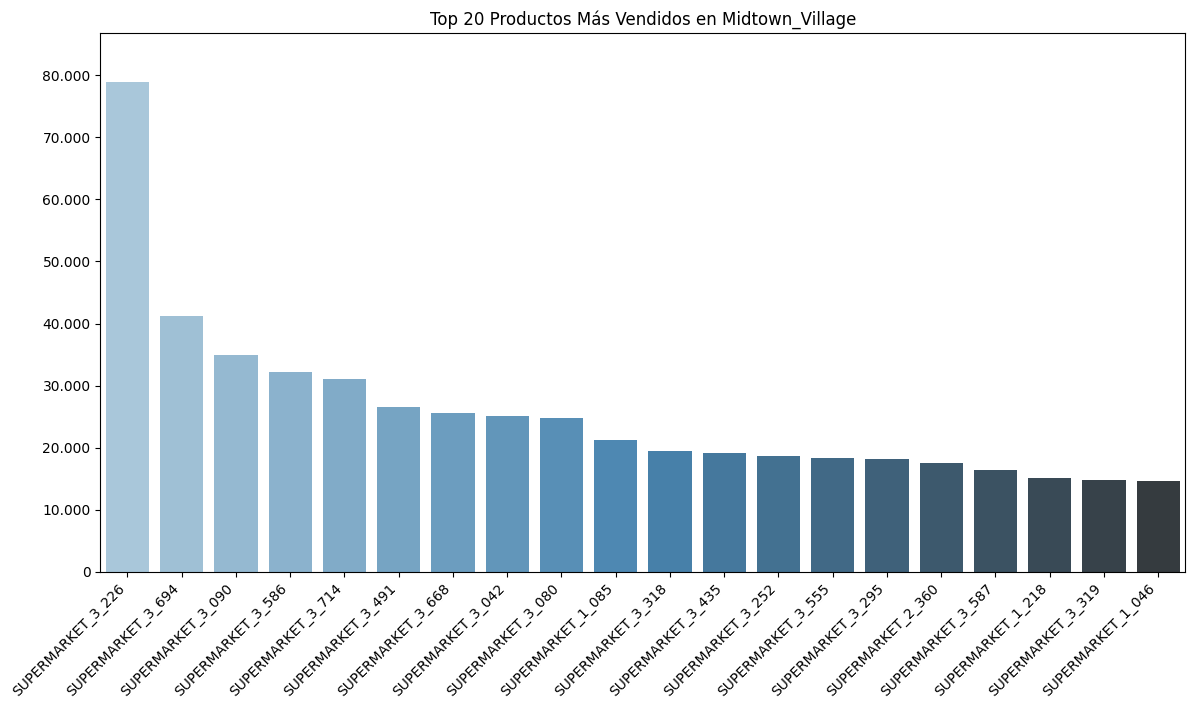

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


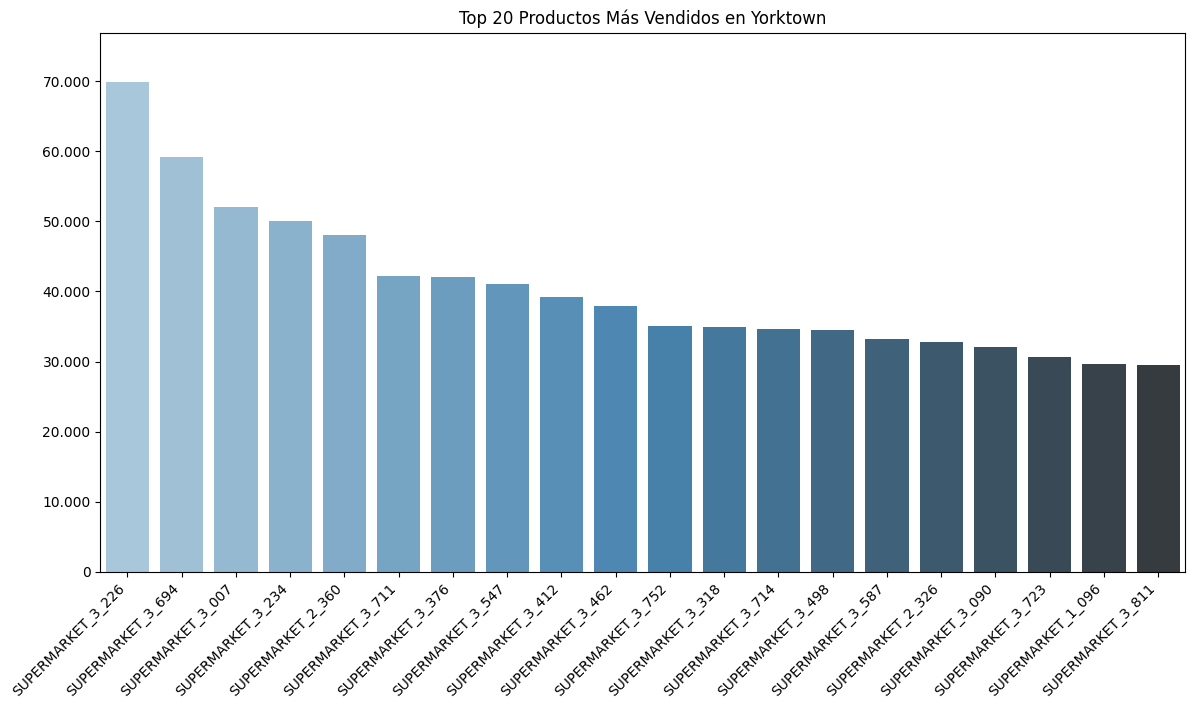

<ipython-input-27-99c910162dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))


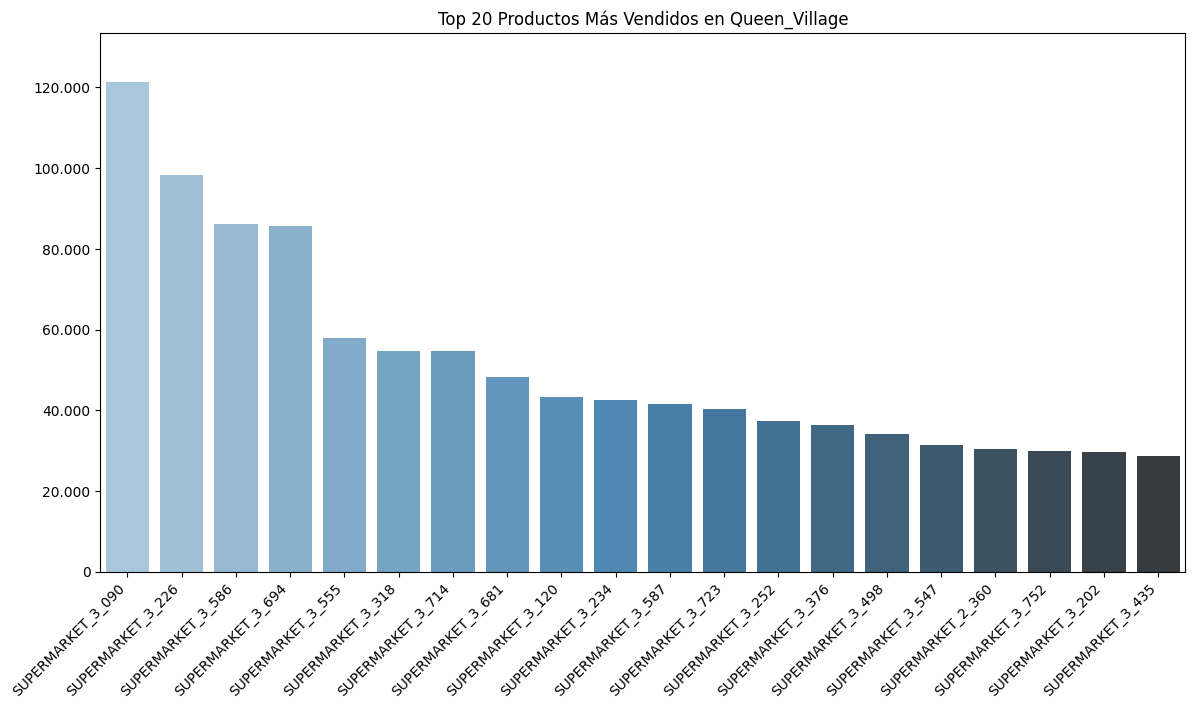

In [27]:
# Filtrar las ventas por tienda
tiendas = df_item['store'].unique()

for tienda in tiendas:
    ventas_por_producto_tienda = df_item[df_item['store'] == tienda].groupby('item')['ventas'].sum().reset_index()
    top_20_productos_tienda = ventas_por_producto_tienda.nlargest(20, 'ventas')

    plt.figure(figsize=(14, 7))

    # Graficar las ventas de los 20 productos más vendidos en la tienda actual
    sns.barplot(data=top_20_productos_tienda, x='item', y='ventas', palette=sns.color_palette("Blues_d", 20))

    # Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
    plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

    # Ajustar los límites del eje Y
    plt.ylim(0, top_20_productos_tienda['ventas'].max() * 1.1)

    # Título personalizado para cada tienda
    plt.title(f'Top 20 Productos Más Vendidos en {tienda}')

    # Ajustes de ejes
    plt.xlabel('')
    plt.ylabel('')

    # Rotar etiquetas del eje X
    plt.xticks(rotation=45, ha="right")

    # Mostrar gráfico
    plt.show()


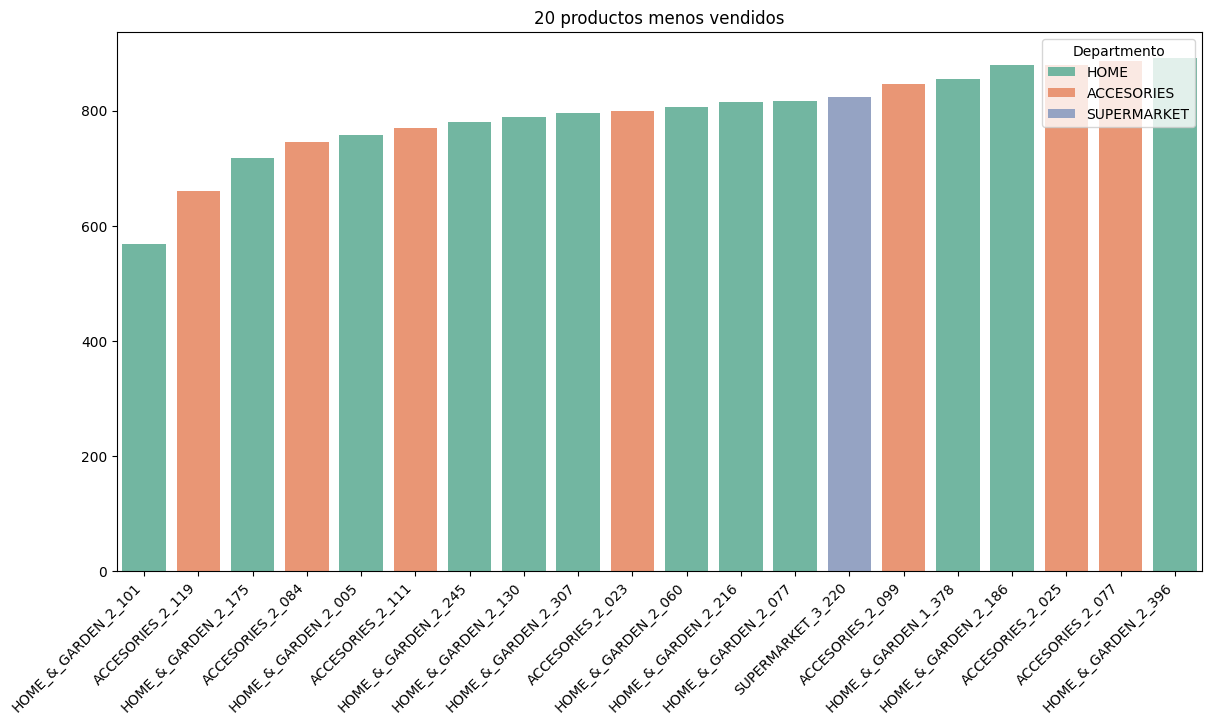

In [28]:

# Top 20 productos menos vendidos
bottom_20_productos = ventas_por_producto.nsmallest(20, 'ventas')

# Extraer el departamento del nombre del producto (asumimos que está separado por un guion bajo '_')
bottom_20_productos['department'] = bottom_20_productos['item'].str.split('_').str[0]

# Asignar colores a cada departamento
departamentos = bottom_20_productos['department'].unique()  # Obtener los departamentos únicos
color_map = dict(zip(departamentos, sns.color_palette("Set2", len(departamentos))))  # Asignar un color a cada departamento

plt.figure(figsize=(14, 7))

# Graficar las ventas de los 20 productos menos vendidos, usando los colores por departamento
sns.barplot(data=bottom_20_productos, x='item', y='ventas', hue='department', palette=color_map, dodge=False)

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título y configuraciones del gráfico
plt.title('20 productos menos vendidos')
plt.xlabel('')
plt.ylabel('')

# Rotar y alinear las etiquetas del eje X correctamente con ha="right"
plt.xticks(rotation=45, ha="right")  # Alinear etiquetas a la derecha de su barra correspondiente

# Desactivar la leyenda (si no es necesaria)
plt.legend(title='Departmento', loc='upper right')

plt.show()


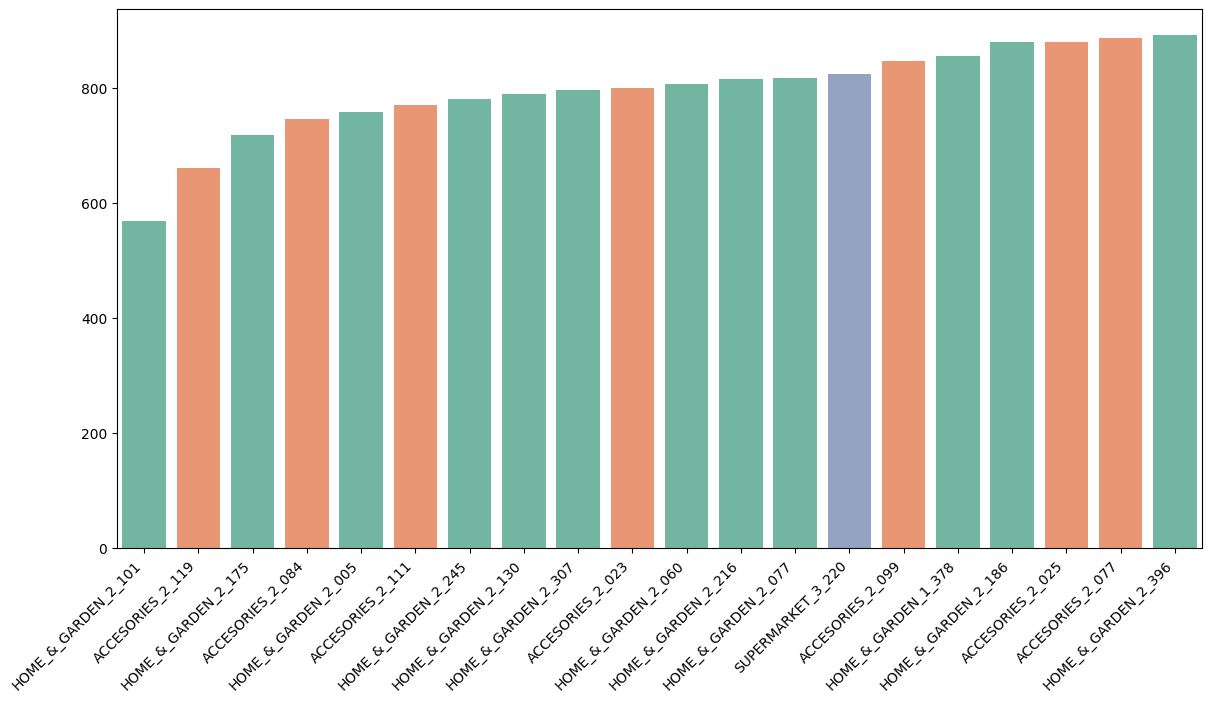

In [29]:
# Top 20 productos menos vendidos
bottom_20_productos = ventas_por_producto.nsmallest(20, 'ventas')

# Extraer el departamento del nombre del producto (asumimos que está separado por un guion bajo '_')
bottom_20_productos['department'] = bottom_20_productos['item'].str.split('_').str[0]

# Asignar colores a cada departamento
departamentos = bottom_20_productos['department'].unique()  # Obtener los departamentos únicos
color_map = dict(zip(departamentos, sns.color_palette("Set2", len(departamentos))))  # Asignar un color a cada departamento

plt.figure(figsize=(14, 7))

# Graficar las ventas de los 20 productos menos vendidos, usando los colores por departamento
sns.barplot(data=bottom_20_productos, x='item', y='ventas', hue='department', palette=color_map, dodge=False)

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título y configuraciones del gráfico
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Rotar y alinear las etiquetas del eje X correctamente con ha="right"
plt.xticks(rotation=45, ha="right")  # Alinear etiquetas a la derecha de su barra correspondiente

# Desactivar la leyenda (si no es necesaria)
plt.legend().remove()

plt.show()


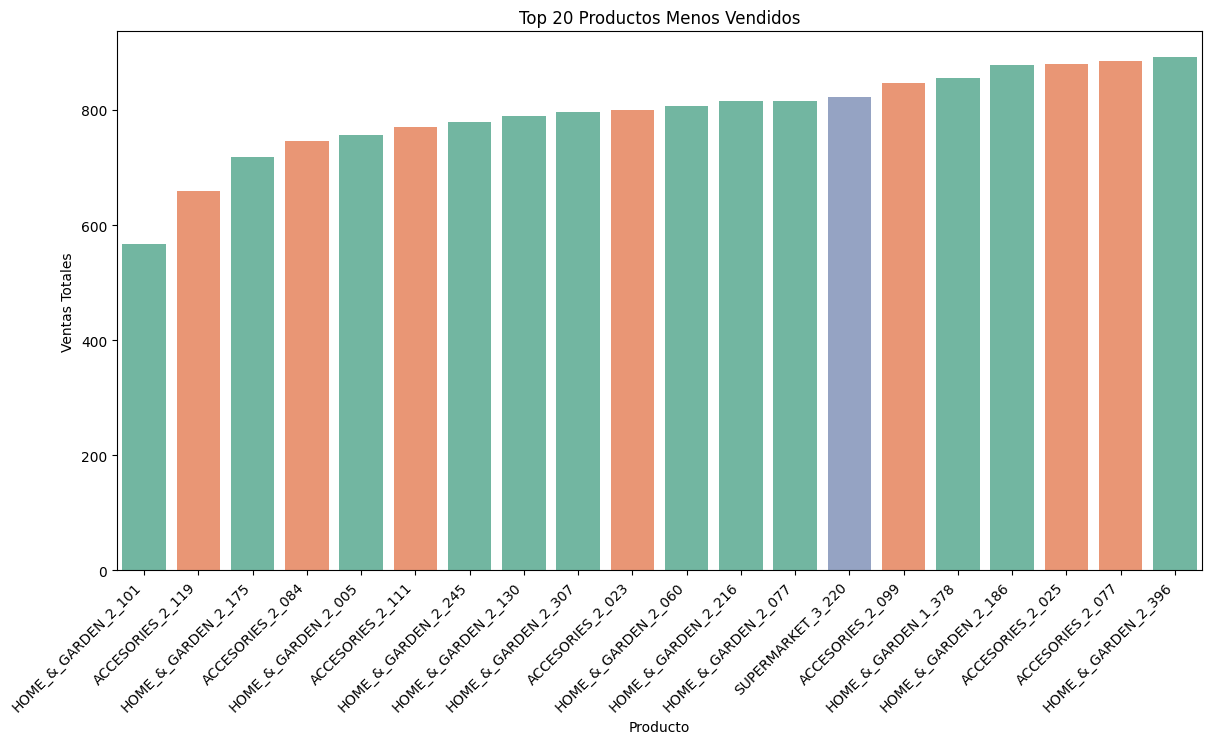

In [30]:
# Top 20 productos menos vendidos
bottom_20_productos = ventas_por_producto.nsmallest(20, 'ventas')

# Extraer el departamento del nombre del producto (asumimos que está separado por un guion bajo '_')
bottom_20_productos['department'] = bottom_20_productos['item'].str.split('_').str[0]

# Asignar colores a cada departamento
departamentos = bottom_20_productos['department'].unique()  # Obtener los departamentos únicos
color_map = dict(zip(departamentos, sns.color_palette("Set2", len(departamentos))))  # Asignar un color a cada departamento

plt.figure(figsize=(14, 7))

# Graficar las ventas de los 20 productos menos vendidos, usando los colores por departamento
sns.barplot(data=bottom_20_productos, x='item', y='ventas', hue='department', palette=color_map, dodge=False, legend=False)

# Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título y configuraciones del gráfico
plt.title('Top 20 Productos Menos Vendidos')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')

# Rotar y alinear las etiquetas del eje X correctamente con ha="right"
plt.xticks(rotation=45, ha="right")  # Alinear etiquetas a la derecha de su barra correspondiente

# Eliminar la leyenda
plt.legend([], [], frameon=False)

plt.show()


#Top menos vendidos por ciudad

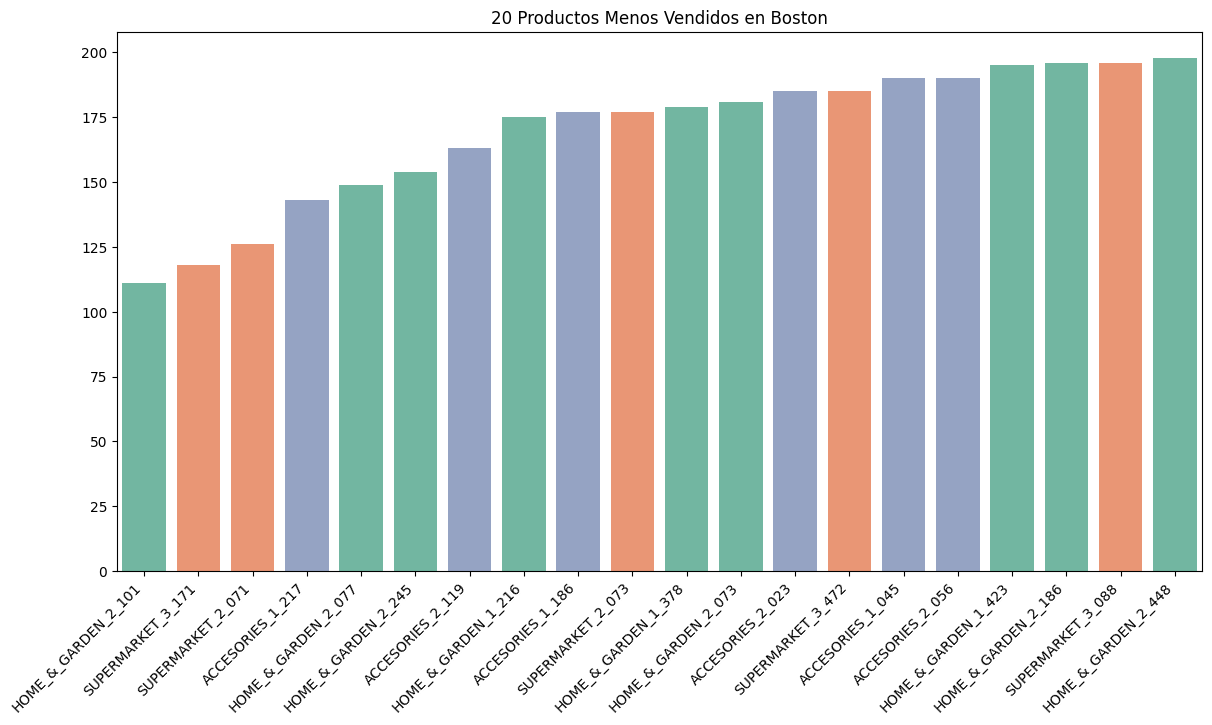

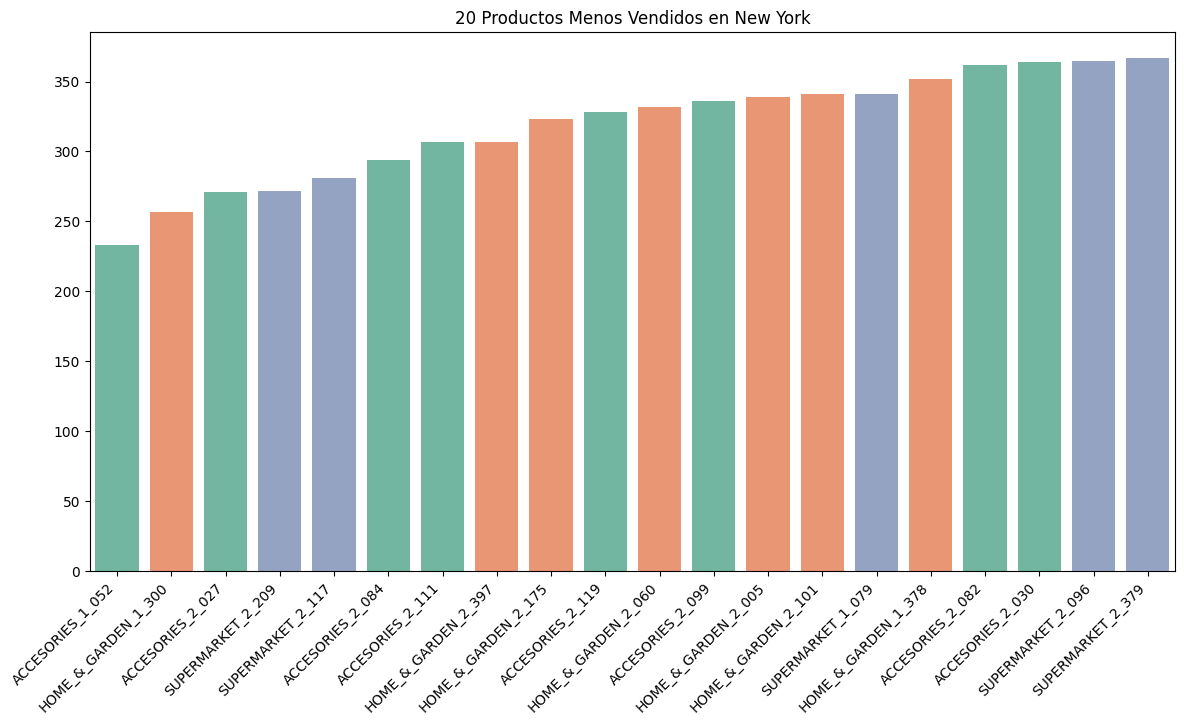

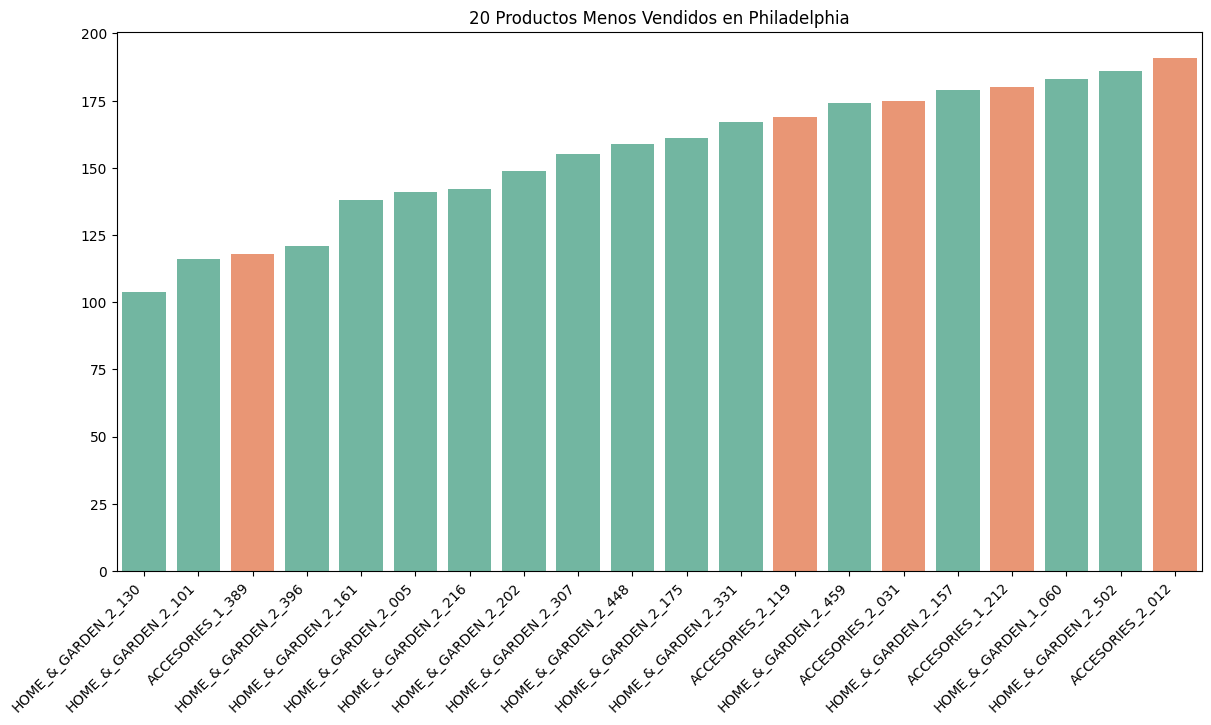

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Obtener las regiones únicas
regiones = df_item['region'].unique()

# Iterar sobre cada región
for region in regiones:
    # Filtrar los productos de la región actual
    ventas_por_producto_region = df_item[df_item['region'] == region].groupby('item')['ventas'].sum().reset_index()

    # Obtener los 20 productos menos vendidos de la región
    bottom_20_productos_region = ventas_por_producto_region.nsmallest(20, 'ventas')

    # Extraer el departamento del nombre del producto (asumimos que está separado por un guion bajo '_')
    bottom_20_productos_region['department'] = bottom_20_productos_region['item'].str.split('_').str[0]

    # Asignar colores a cada departamento
    departamentos = bottom_20_productos_region['department'].unique()  # Obtener los departamentos únicos
    color_map = dict(zip(departamentos, sns.color_palette("Set2", len(departamentos))))  # Asignar un color a cada departamento

    plt.figure(figsize=(14, 7))

    # Graficar las ventas de los 20 productos menos vendidos en la región, usando los colores por departamento
    sns.barplot(data=bottom_20_productos_region, x='item', y='ventas', hue='department', palette=color_map, dodge=False)

    # Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
    plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

    # Título personalizado para cada región
    plt.title(f'20 Productos Menos Vendidos en {region}')

    # Ajustes de ejes
    plt.xlabel('')
    plt.ylabel('')

    # Rotar y alinear las etiquetas del eje X correctamente con ha="right"
    plt.xticks(rotation=45, ha="right")

    # Desactivar la leyenda si no es necesaria
    plt.legend().remove()

    # Mostrar gráfico
    plt.show()


#Top menos vendidos por tienda

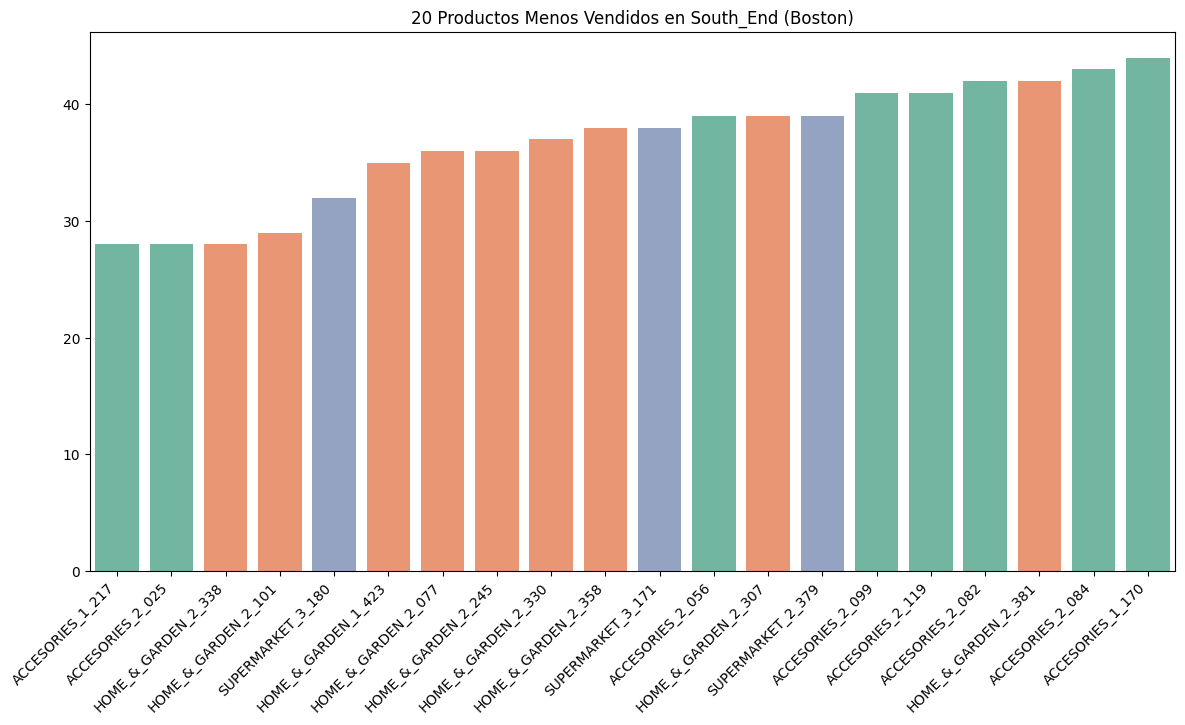

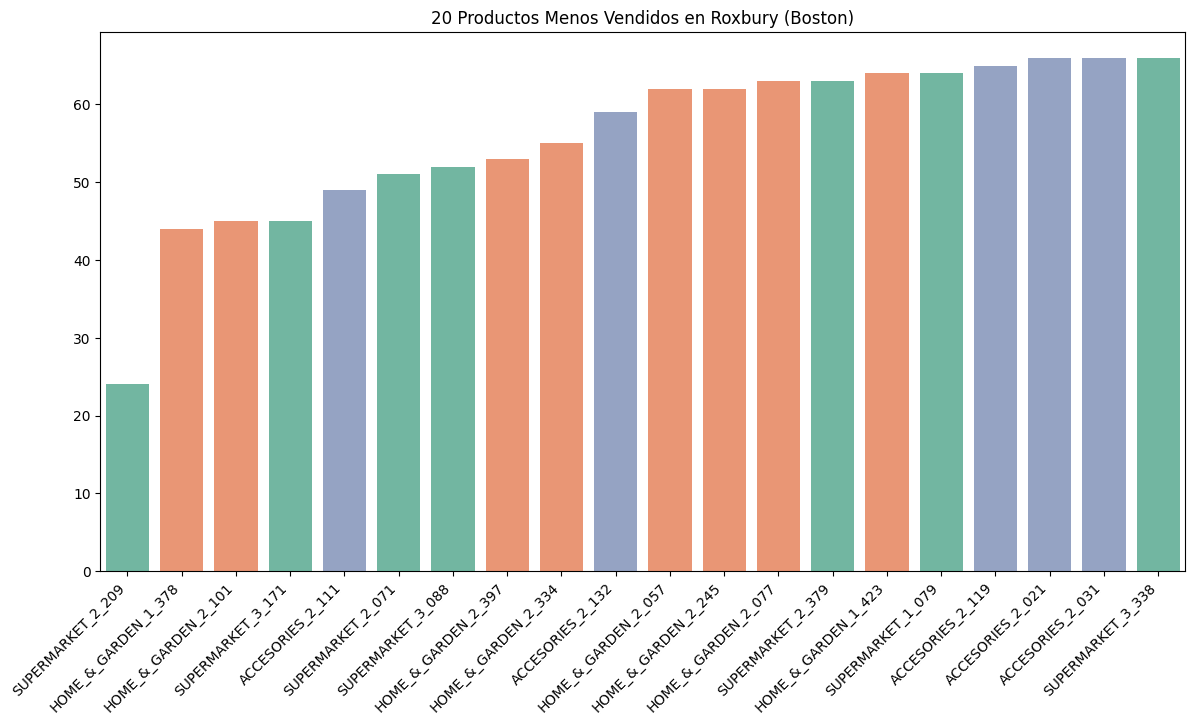

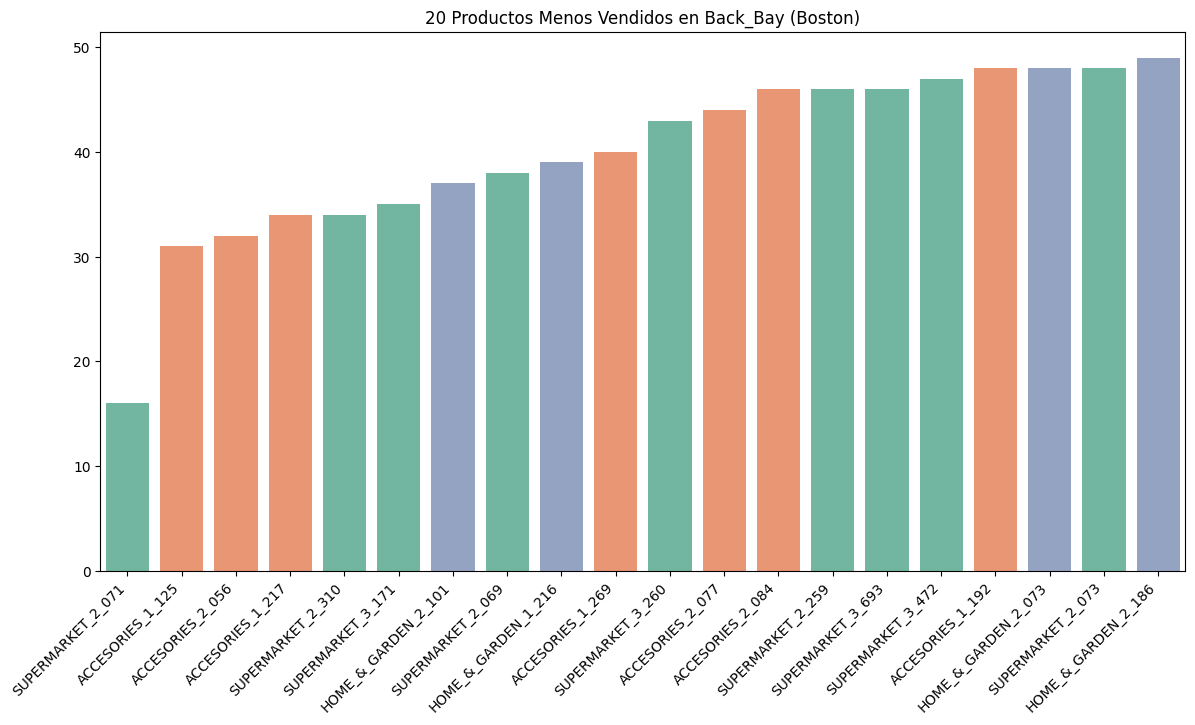

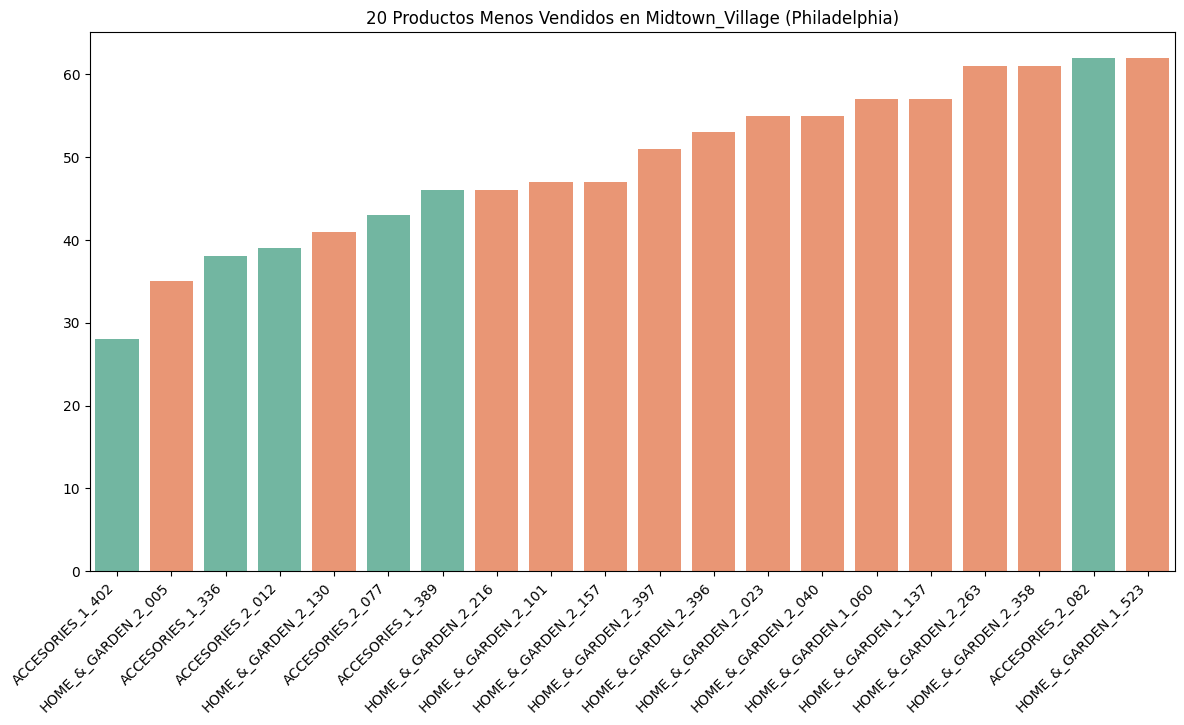

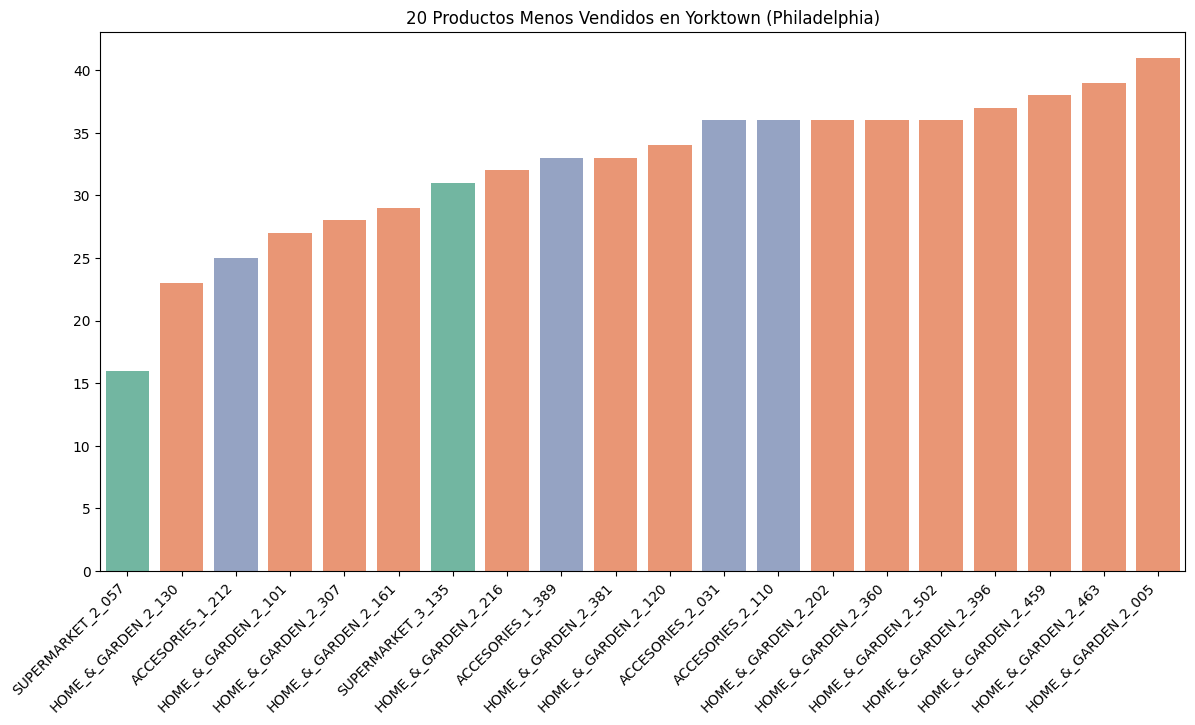

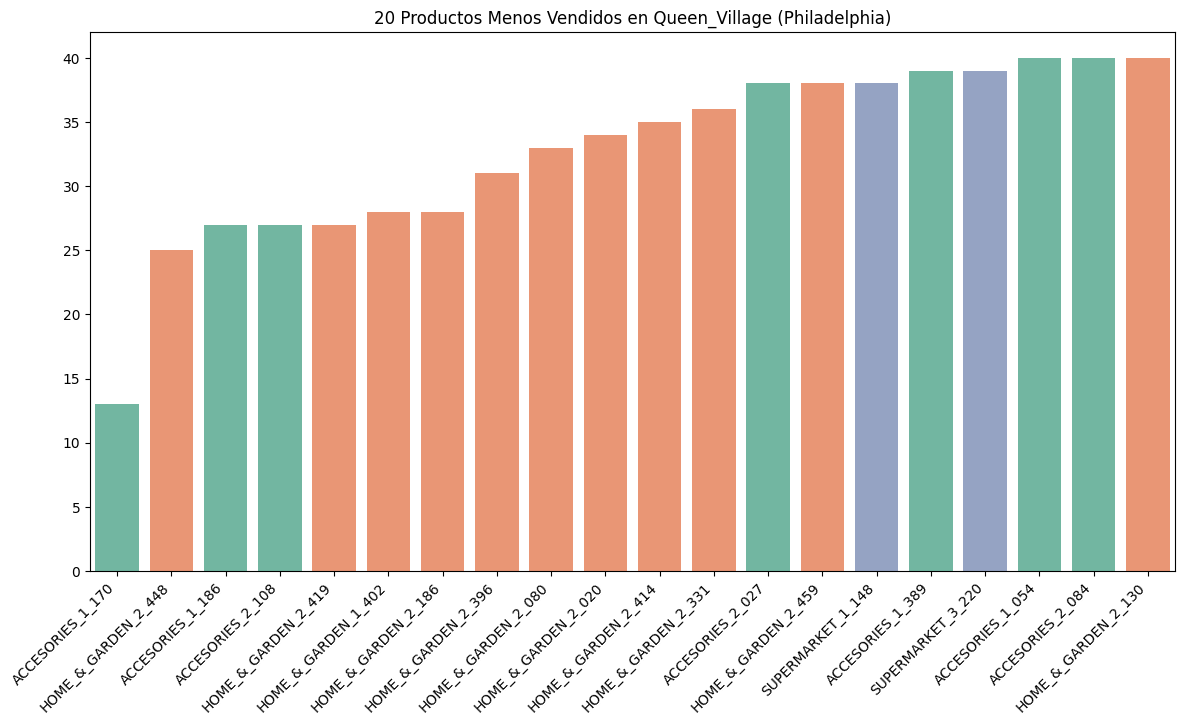

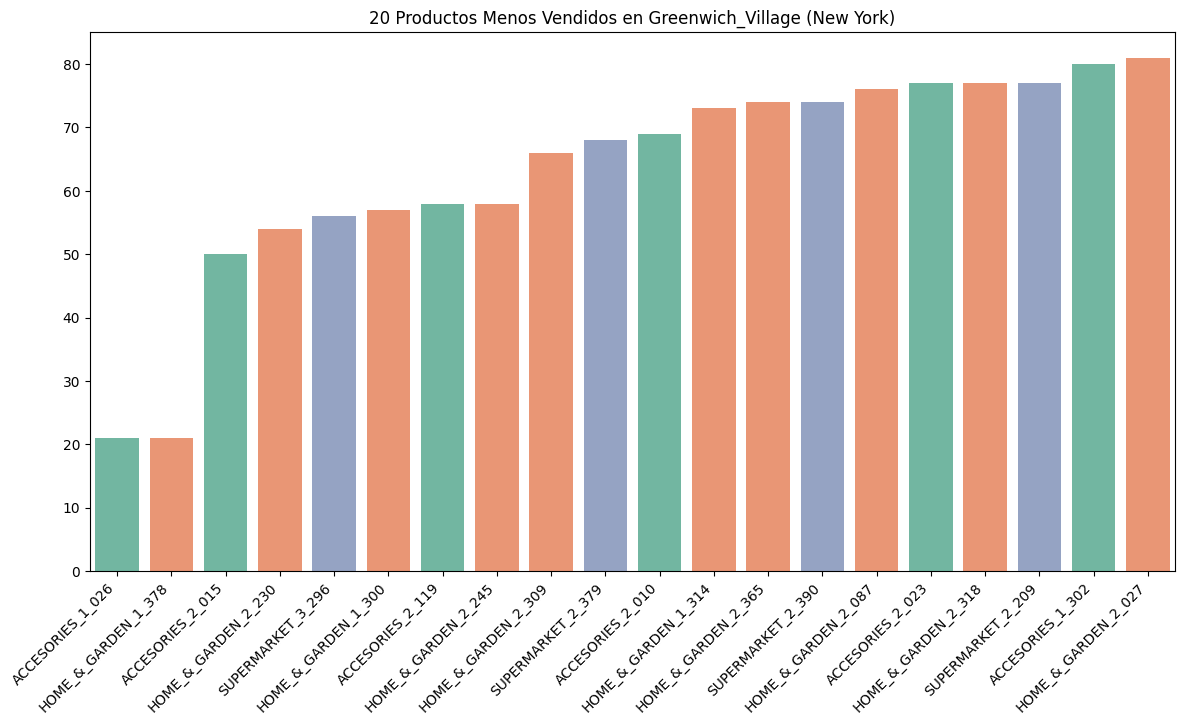

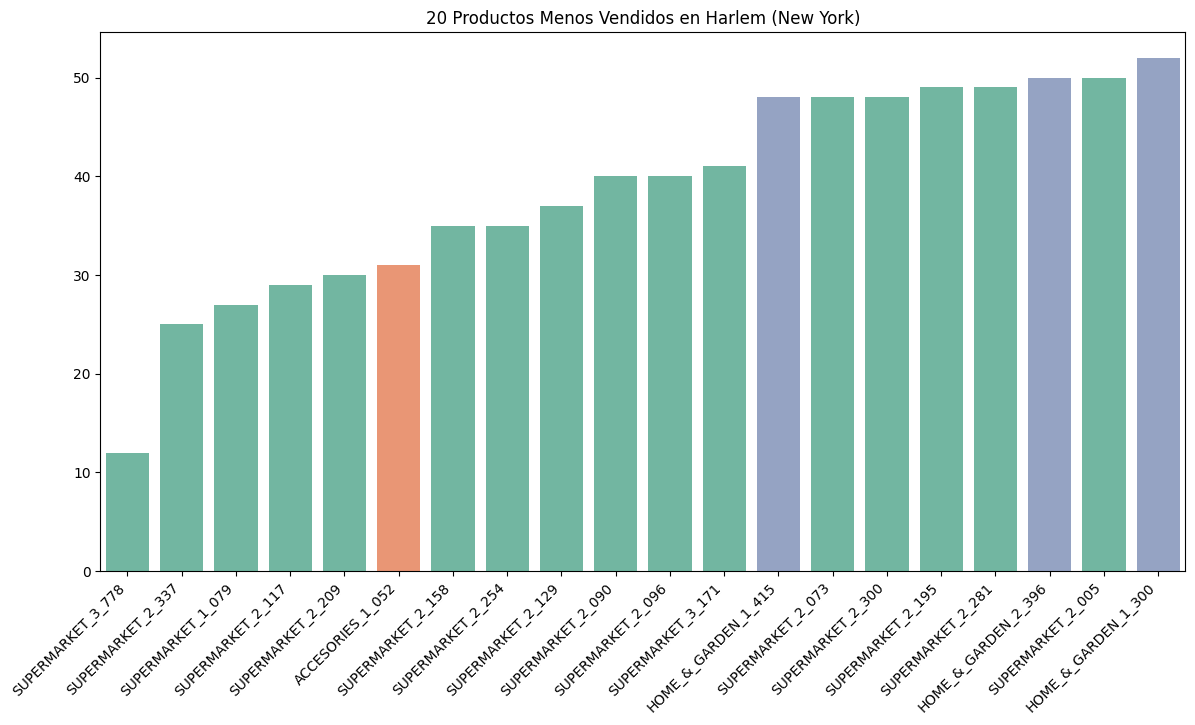

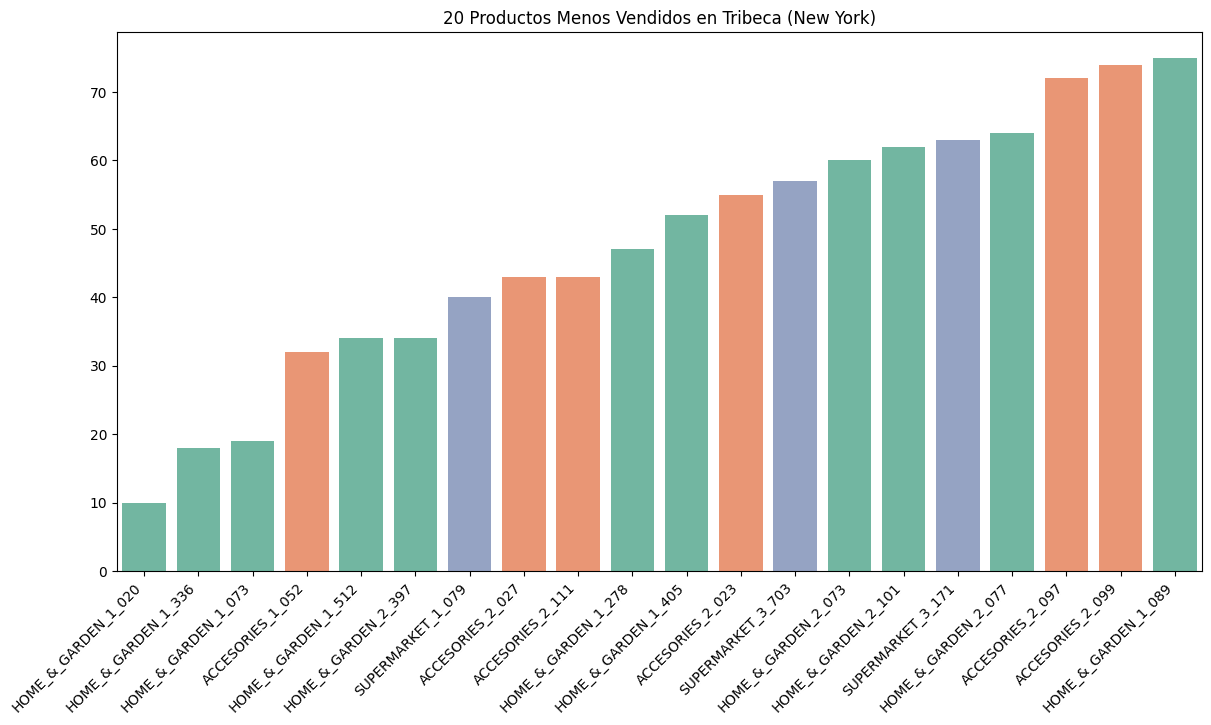

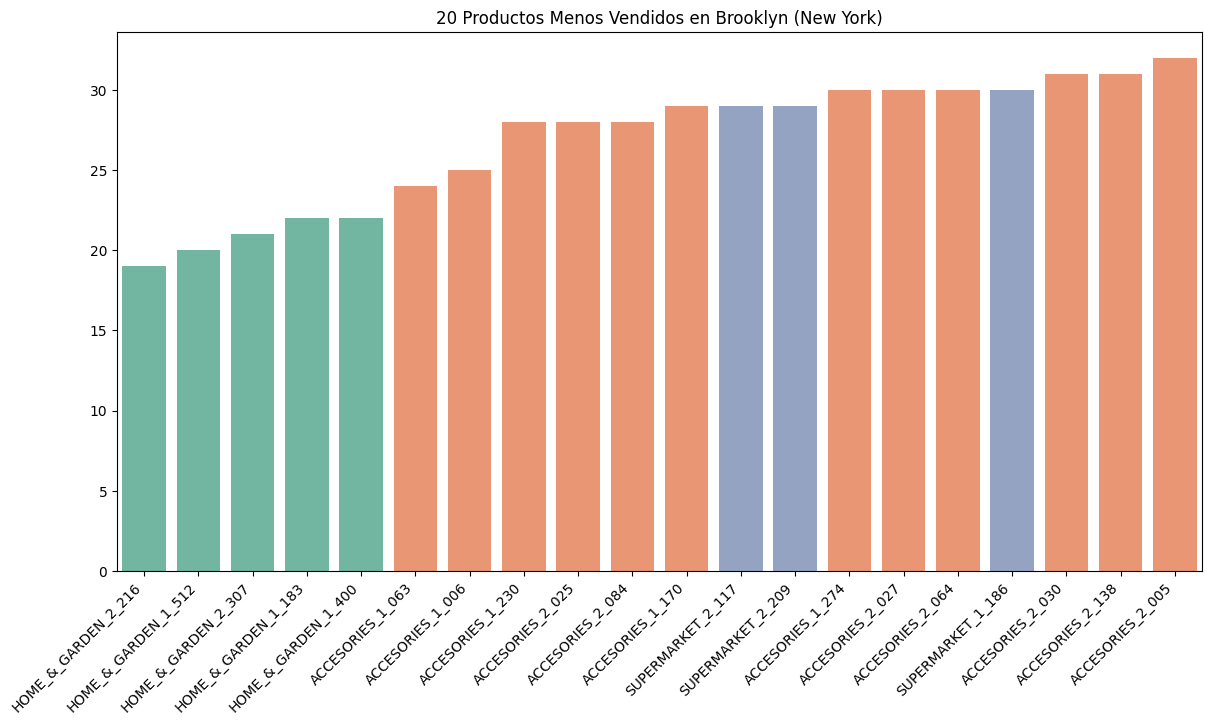

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Orden de las regiones
order_regions = ['Boston', 'Philadelphia', 'New York']

# Iterar sobre cada región en el orden especificado
for region in order_regions:
    # Filtrar las tiendas de la región actual
    tiendas_region = df_item[df_item['region'] == region]['store'].unique()

    # Iterar sobre cada tienda dentro de la región
    for tienda in tiendas_region:
        # Filtrar los productos de la tienda actual
        ventas_por_producto_tienda = df_item[df_item['store'] == tienda].groupby('item')['ventas'].sum().reset_index()

        # Obtener los 20 productos menos vendidos de la tienda
        bottom_20_productos_tienda = ventas_por_producto_tienda.nsmallest(20, 'ventas')

        # Extraer el departamento del nombre del producto (asumimos que está separado por un guion bajo '_')
        bottom_20_productos_tienda['department'] = bottom_20_productos_tienda['item'].str.split('_').str[0]

        # Asignar colores a cada departamento
        departamentos = bottom_20_productos_tienda['department'].unique()  # Obtener los departamentos únicos
        color_map = dict(zip(departamentos, sns.color_palette("Set2", len(departamentos))))  # Asignar un color a cada departamento

        plt.figure(figsize=(14, 7))

        # Graficar las ventas de los 20 productos menos vendidos en la tienda, usando los colores por departamento
        sns.barplot(data=bottom_20_productos_tienda, x='item', y='ventas', hue='department', palette=color_map, dodge=False)

        # Usar un formateador para mostrar los valores del eje Y con puntos como separador de miles
        plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

        # Título personalizado para cada tienda
        plt.title(f'20 Productos Menos Vendidos en {tienda} ({region})')

        # Ajustes de ejes
        plt.xlabel('')
        plt.ylabel('')

        # Rotar y alinear las etiquetas del eje X correctamente con ha="right"
        plt.xticks(rotation=45, ha="right")

        # Desactivar la leyenda si no es necesaria
        plt.legend().remove()

        # Mostrar gráfico
        plt.show()



<ipython-input-33-4bc9938654f4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='item', data=top_20_productos, palette='Greens')


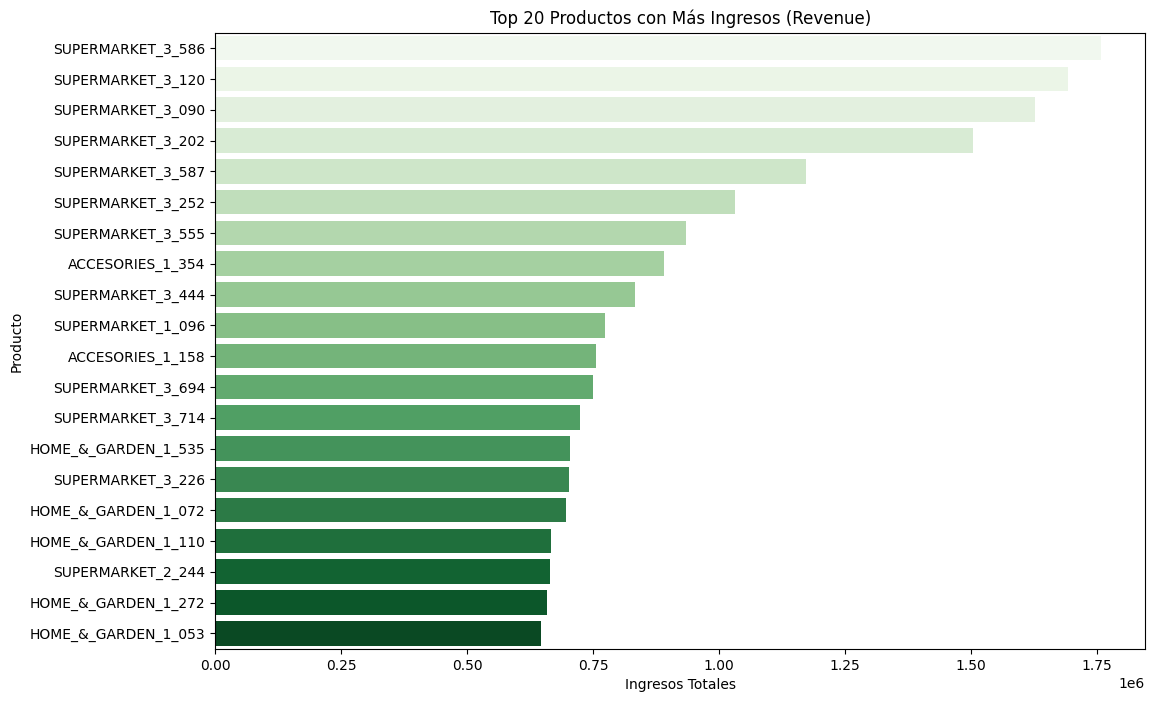

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna de revenue (ingresos) como Ventas * Precio de Venta
df_item['revenue'] = df_item['ventas'] * df_item['sell_price']

# Agrupar por producto y calcular el revenue total de cada producto
revenue_producto = df_item.groupby('item')['revenue'].sum().reset_index()

# Ordenar los productos por revenue de manera descendente
top_20_productos = revenue_producto.sort_values(by='revenue', ascending=False).head(20)

# Crear el gráfico de barras para los 20 productos con más revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='revenue', y='item', data=top_20_productos, palette='Greens')

# Añadir título y etiquetas
plt.title('Top 20 Productos con Más Ingresos (Revenue)')
plt.xlabel('Ingresos Totales')
plt.ylabel('Producto')

# Mostrar el gráfico
plt.show()



#Top 20 más revenue

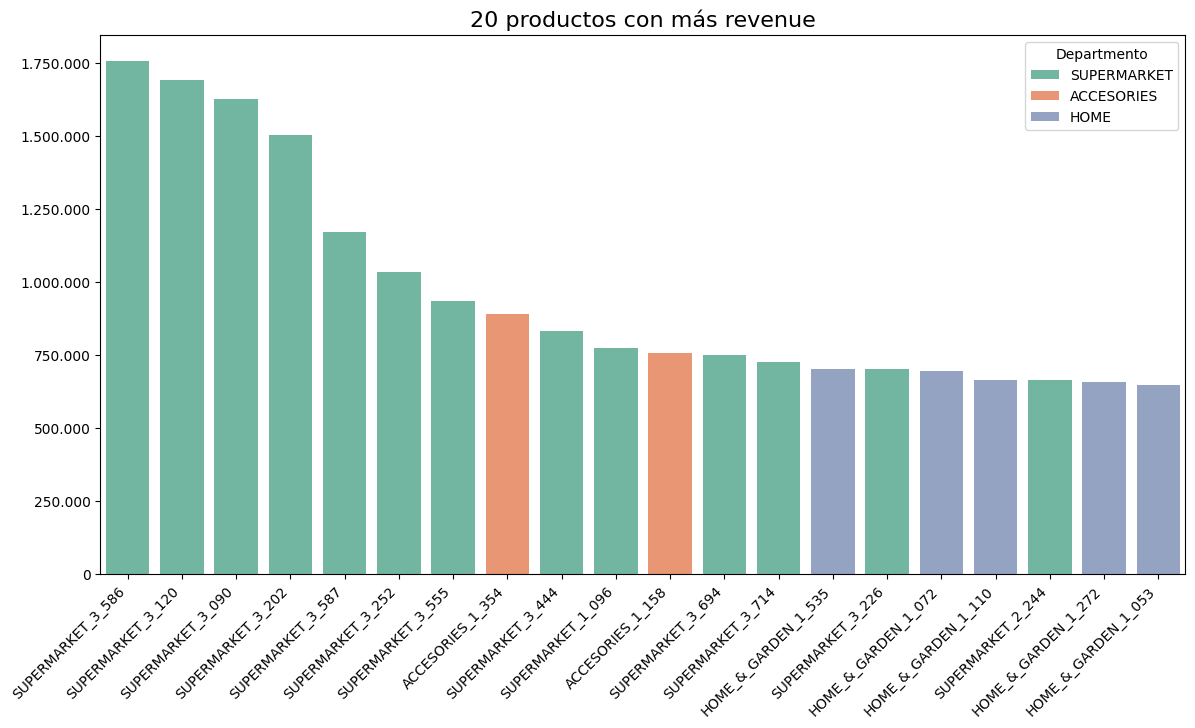

In [35]:
# Crear una columna de revenue (ingresos) como Ventas * Precio de Venta
df_item['revenue'] = df_item['ventas'] * df_item['sell_price']

# Agrupar por producto y calcular el revenue total de cada producto
df_item['department'] = df_item['item'].apply(lambda x: 'SUPERMARKET' if 'SUPERMARKET' in x else x.split('_')[0])
revenue_producto = df_item.groupby(['item', 'department'])['revenue'].sum().reset_index()

# Ordenar los productos por revenue de manera descendente
top_20_revenue_productos = revenue_producto.sort_values(by='revenue', ascending=False).head(20)

# Asignar colores a cada departamento
departamentos = top_20_revenue_productos['department'].unique()
color_map = dict(zip(departamentos, sns.color_palette("Set2", len(departamentos))))  # Asignar un color a cada departamento

plt.figure(figsize=(14, 7))

# Graficar los 20 productos con más revenue, usando los colores por departamento
sns.barplot(data=top_20_revenue_productos, x='item', y='revenue', hue='department', palette=color_map, dodge=False)

# Usar un formateador para mostrar los valores del eje Y como enteros
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Configuraciones del gráfico
plt.title('20 productos con más revenue', fontsize=16)
plt.ylabel('', fontsize=14)
plt.xlabel('', fontsize=14)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha="right")

# Leyenda
plt.legend(title='Departmento', loc='upper right')

# Mostrar gráfico
plt.show()



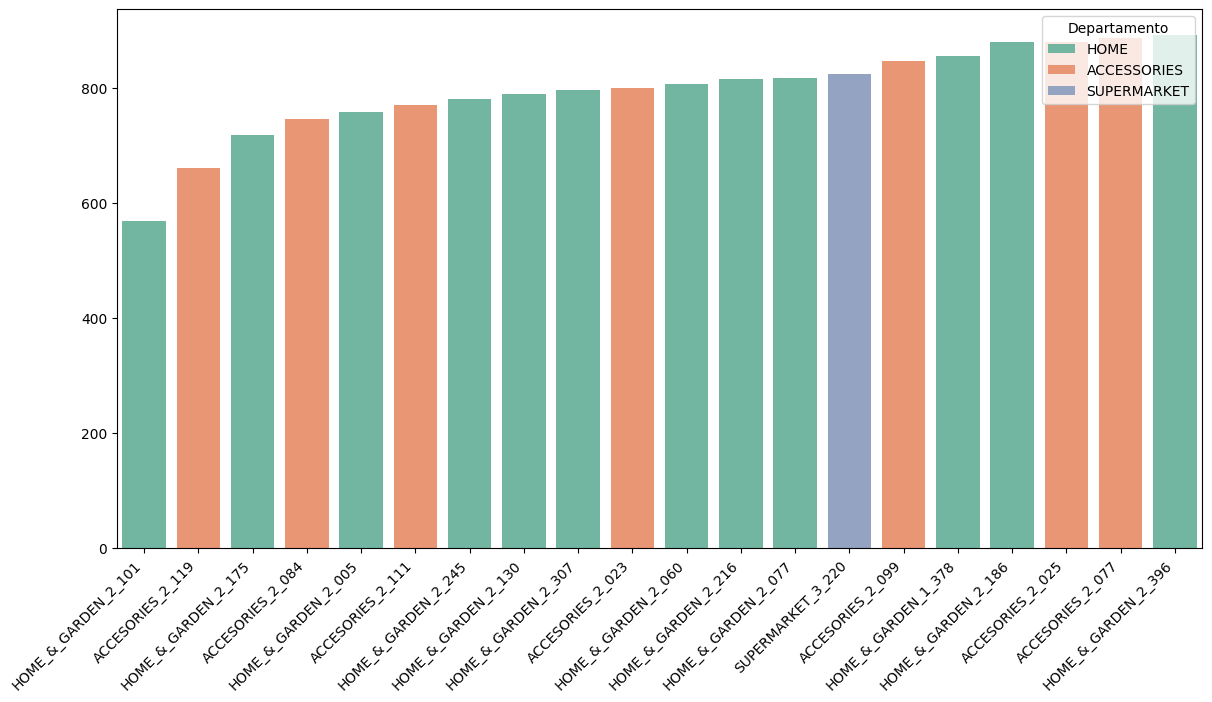

NameError: name 'bottom_20_revenue_productos' is not defined

In [ ]:

# Normalizar los nombres de los departamentos para corregir posibles errores tipográficos
bottom_20_productos['department'] = bottom_20_productos['department'].replace({'ACCESORIES': 'ACCESSORIES'})

# Asignar colores específicos por departamento
color_map = {'HOME': '#66c2a5', 'ACCESSORIES': '#fc8d62', 'SUPERMARKET': '#8da0cb'}

# Gráfico de los 20 productos menos vendidos con los colores correctos por departamento
plt.figure(figsize=(14, 7))

# Graficar las ventas de los 20 productos menos vendidos
sns.barplot(data=bottom_20_productos, x='item', y='ventas', hue='department', palette=color_map, dodge=False)

# Usar un formateador para mostrar los valores del eje Y como enteros
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título y configuraciones del gráfico
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Rotar y alinear las etiquetas del eje X correctamente con ha="right"
plt.xticks(rotation=45, ha="right")

# Leyenda
plt.legend(title='Departamento', loc='upper right')

plt.show()

# Gráfico de los 20 productos con menos revenue con los colores correctos por departamento
bottom_20_revenue_productos['department'] = bottom_20_revenue_productos['department'].replace({'ACCESORIES': 'ACCESSORIES'})

plt.figure(figsize=(14, 7))

# Graficar los 20 productos con menos revenue
sns.barplot(data=bottom_20_revenue_productos, x='item', y='revenue', hue='department', palette=color_map, dodge=False)

# Usar un formateador para mostrar los valores del eje Y como enteros
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Título y configuraciones del gráfico
plt.title('')
plt.ylabel('')
plt.xlabel('')

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha="right")

# Eliminar la leyenda si es necesario
plt.legend().remove()

plt.show()




#Top 20 menos revenue

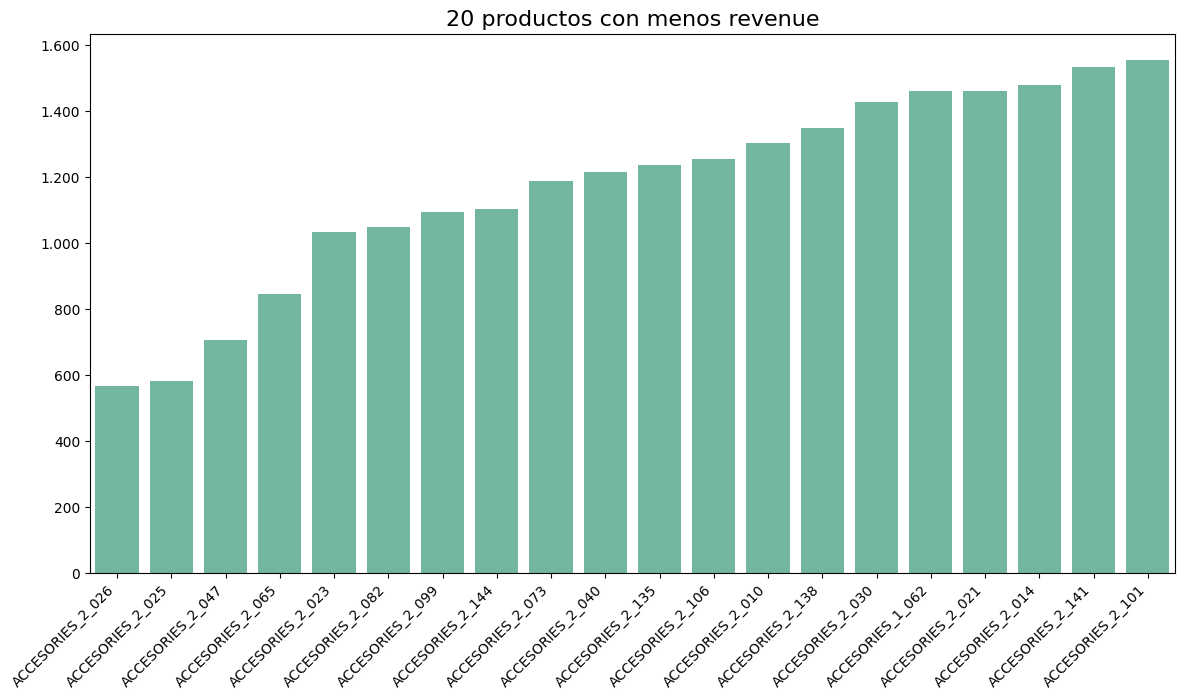

In [36]:
# Ordenar los productos por revenue de manera ascendente para obtener los de menos revenue
bottom_20_revenue_productos = revenue_producto.sort_values(by='revenue', ascending=True).head(20)

# Asignar colores a cada departamento
departamentos = bottom_20_revenue_productos['department'].unique()
color_map = dict(zip(departamentos, sns.color_palette("Set2", len(departamentos))))  # Asignar un color a cada departamento

plt.figure(figsize=(14, 7))

# Graficar los 20 productos con menos revenue, usando los colores por departamento
sns.barplot(data=bottom_20_revenue_productos, x='item', y='revenue', hue='department', palette=color_map, dodge=False)

# Usar un formateador para mostrar los valores del eje Y como enteros
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Configuraciones del gráfico
plt.title('20 productos con menos revenue', fontsize=16)
plt.ylabel('', fontsize=14)
plt.xlabel('', fontsize=14)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha="right")

# Eliminar la leyenda
plt.legend().remove()

# Mostrar gráfico
plt.show()




Lo 20 con menos revenue

<ipython-input-39-789fefc10b8e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='item', data=bottom_20_productos, palette='Reds')


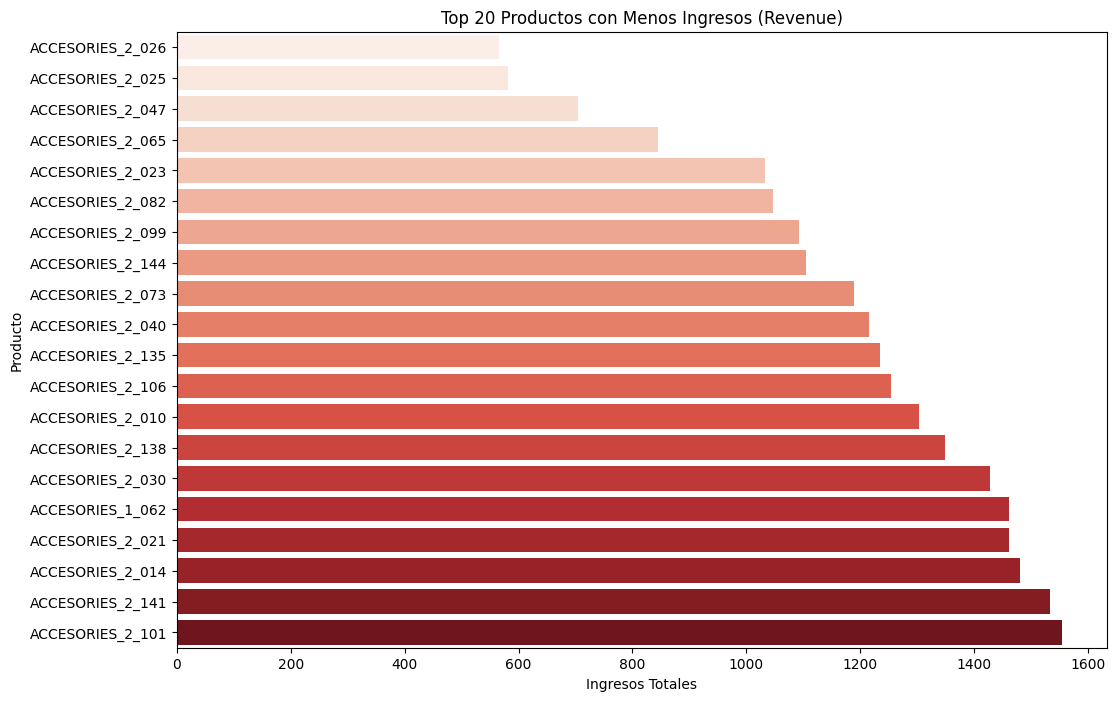

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna de revenue (ingresos) como Ventas * Precio de Venta
df_item['revenue'] = df_item['ventas'] * df_item['sell_price']

# Agrupar por producto y calcular el revenue total de cada producto
revenue_producto = df_item.groupby('item')['revenue'].sum().reset_index()

# Ordenar los productos por revenue de manera ascendente (para los que menos ingresos generan)
bottom_20_productos = revenue_producto.sort_values(by='revenue', ascending=True).head(20)

# Crear el gráfico de barras para los 20 productos con menos revenue
plt.figure(figsize=(12, 8))
sns.barplot(x='revenue', y='item', data=bottom_20_productos, palette='Reds')

# Añadir título y etiquetas
plt.title('Top 20 Productos con Menos Ingresos (Revenue)')
plt.xlabel('Ingresos Totales')
plt.ylabel('Producto')

# Mostrar el gráfico
plt.show()


#5: Análisis de ventas por categoría

<ipython-input-40-9950e3b96eeb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='ventas', data=ventas_por_categoria, palette=department_colors.values())


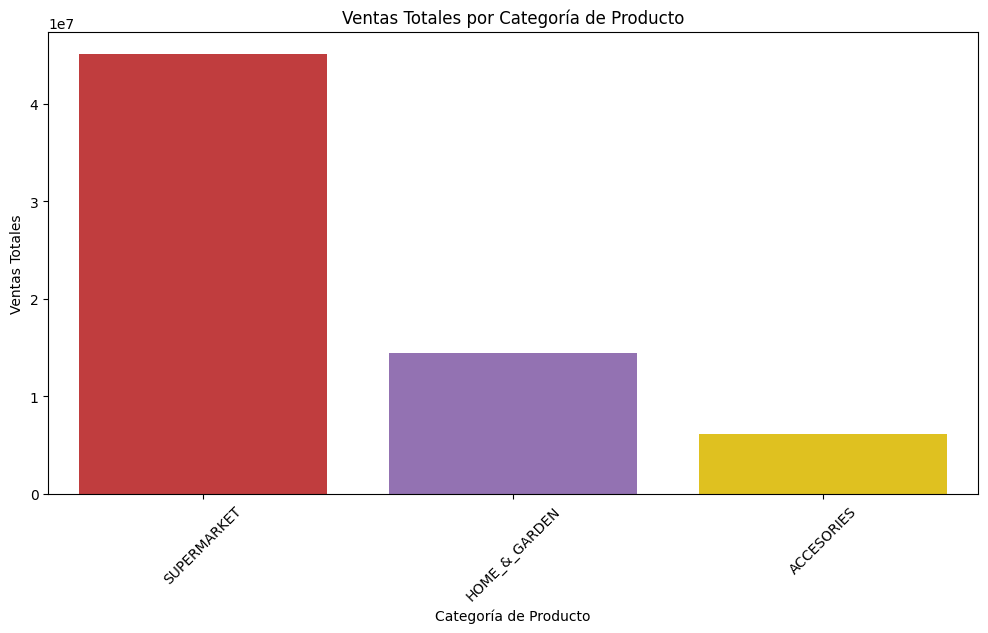

In [ ]:
# Ventas por categoría
ventas_por_categoria = df_item.groupby('category')['ventas'].sum().reset_index()
ventas_por_categoria = ventas_por_categoria.sort_values(by='ventas', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='ventas', data=ventas_por_categoria, palette=department_colors.values())
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-37-a955c0efae51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='category', y='ventas', data=ventas_por_categoria, palette=department_colors.values())


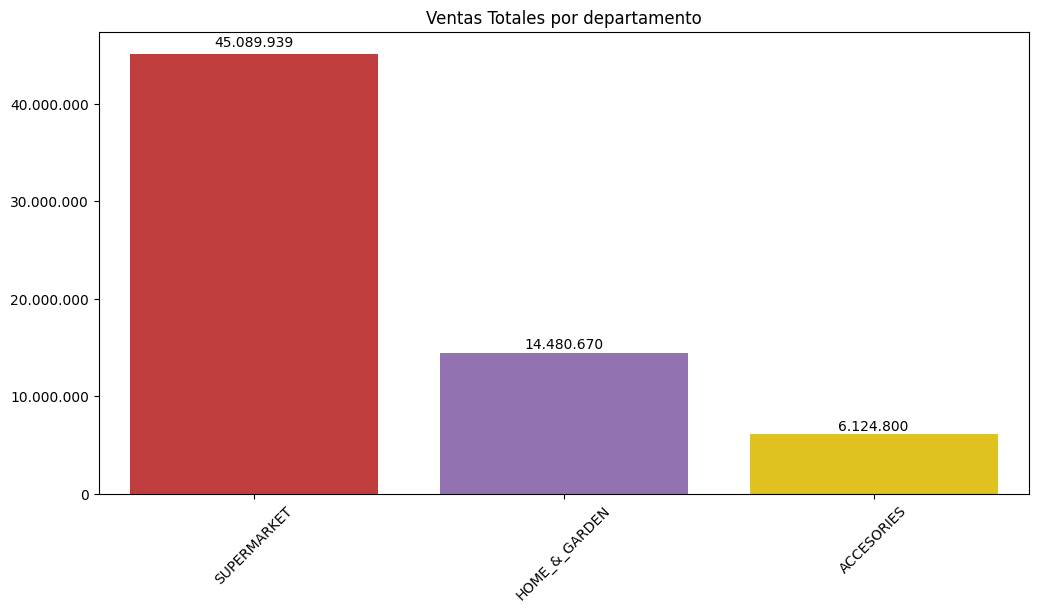

In [37]:
# Ventas por categoría
ventas_por_categoria = df_item.groupby('category')['ventas'].sum().reset_index()
ventas_por_categoria = ventas_por_categoria.sort_values(by='ventas', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='category', y='ventas', data=ventas_por_categoria, palette=department_colors.values())

# Mostrar el valor de ventas encima de cada barra con ajustes precisos de tamaño, color y posición
for i, bar in enumerate(ax.patches):  # Iteramos por las barras
    height = bar.get_height()  # Obtenemos la altura de cada barra
    ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01,  # Posicionamos el texto
            f"{int(height):,}".replace(",", "."), ha="center", va="bottom", fontsize=10, color='black')

# Formatear los valores del eje Y
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".")))

# Título y etiquetas del gráfico
plt.title('Ventas Totales por departamento')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()



#6: Análisis de eventos y ventas

<ipython-input-42-32759099a9dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event', y='ventas', data=ventas_evento, palette='Set2')


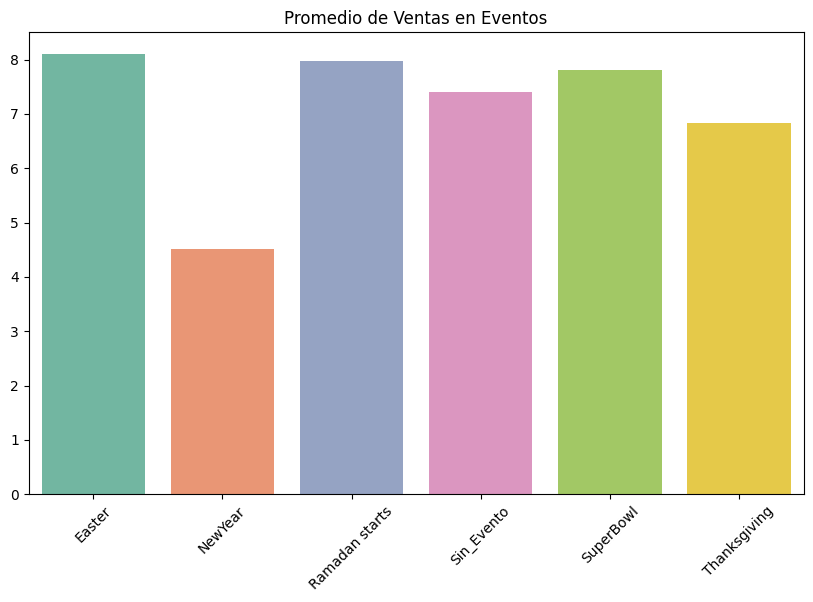

In [ ]:
# Análisis de ventas por evento
ventas_evento = df_item.groupby('event')['ventas'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='event', y='ventas', data=ventas_evento, palette='Set2')
plt.title('Promedio de Ventas en Eventos')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

<ipython-input-43-42676bff73eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='event', y='ventas', data=ventas_evento, palette='Set2')


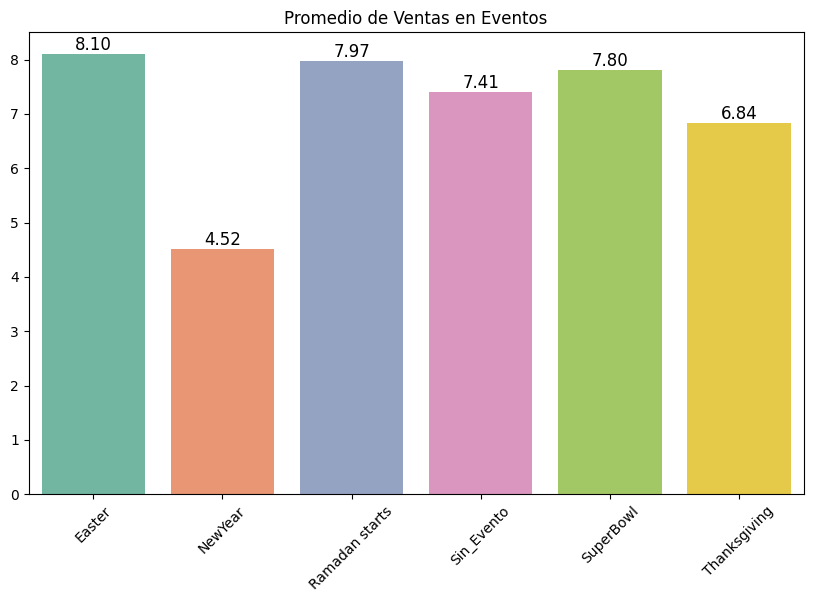

In [ ]:
# Análisis de ventas por evento
ventas_evento = df_item.groupby('event')['ventas'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='event', y='ventas', data=ventas_evento, palette='Set2')

# Mostrar el valor de ventas encima de cada barra
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}',
            ha='center', va='bottom', fontsize=12)

plt.title('Promedio de Ventas en Eventos')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()


#7: Medias móviles para identificar tendencias

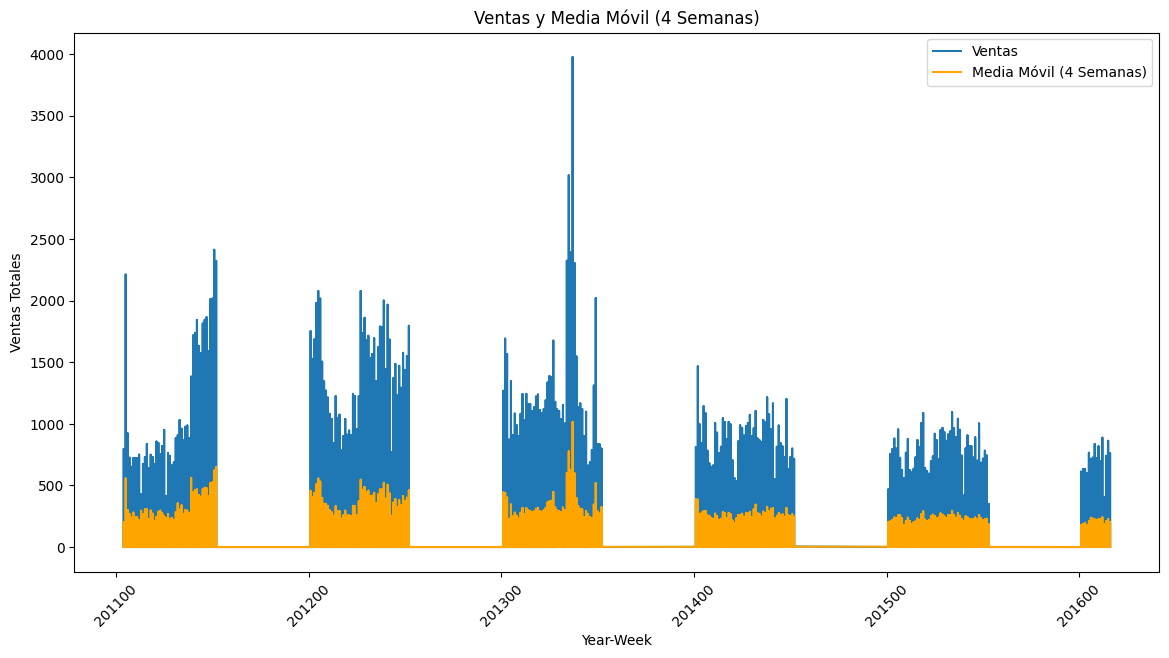

In [ ]:
# Medias móviles para identificar tendencias
df_item['media_movil_4'] = df_item['ventas'].rolling(window=4).mean()
plt.figure(figsize=(14, 7))
plt.plot(df_item['yearweek'], df_item['ventas'], label='Ventas', color='#1F77B4')
plt.plot(df_item['yearweek'], df_item['media_movil_4'], label='Media Móvil (4 Semanas)', color='orange')
plt.title('Ventas y Media Móvil (4 Semanas)')
plt.xlabel('Year-Week')
plt.ylabel('Ventas Totales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#8: Crecimiento de ventas año a año

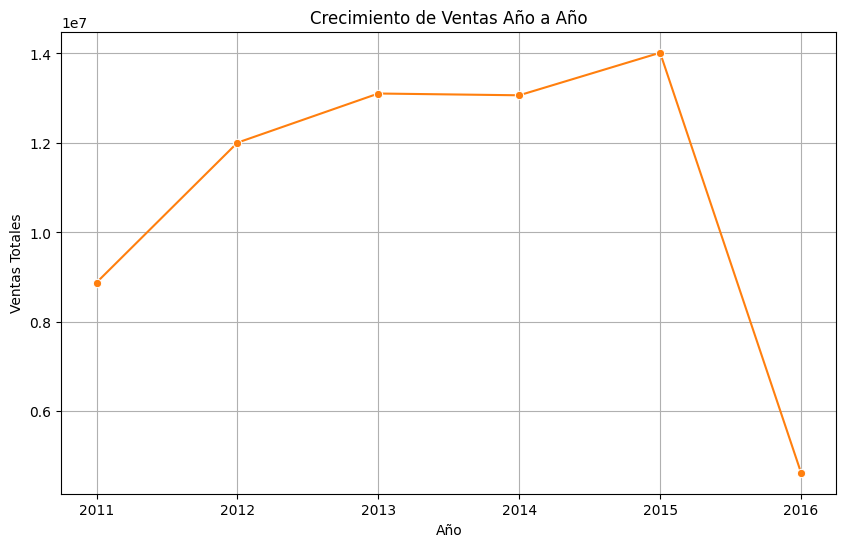

In [ ]:
# Crecimiento de ventas año a año
ventas_anuales = df_item.groupby('año')['ventas'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='año', y='ventas', data=ventas_anuales, marker='o', color='#FF7F0E')
plt.title('Crecimiento de Ventas Año a Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()

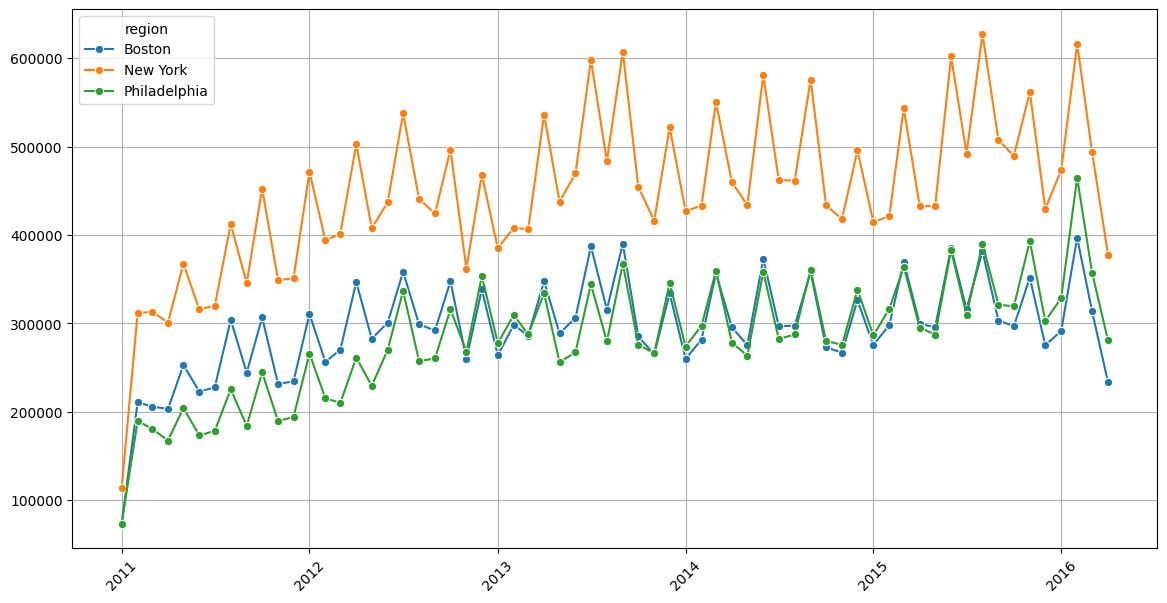

In [ ]:
# Agrupar las ventas totales por ciudad y por cada mes_año
ventas_mensuales_ciudad = df_item.groupby(['region', 'mes_año'])['ventas'].sum().reset_index()

# Convertir la columna 'mes_año' en un formato de fecha para que el gráfico la entienda
# Si mes_año está en formato 'YYYY-MM' o similar
ventas_mensuales_ciudad['mes_año'] = pd.to_datetime(ventas_mensuales_ciudad['mes_año'])

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Graficar el crecimiento de ventas por ciudad mes a mes
sns.lineplot(data=ventas_mensuales_ciudad, x='mes_año', y='ventas', hue='region', marker='o')

# Configuraciones del gráfico
plt.title('', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.show()


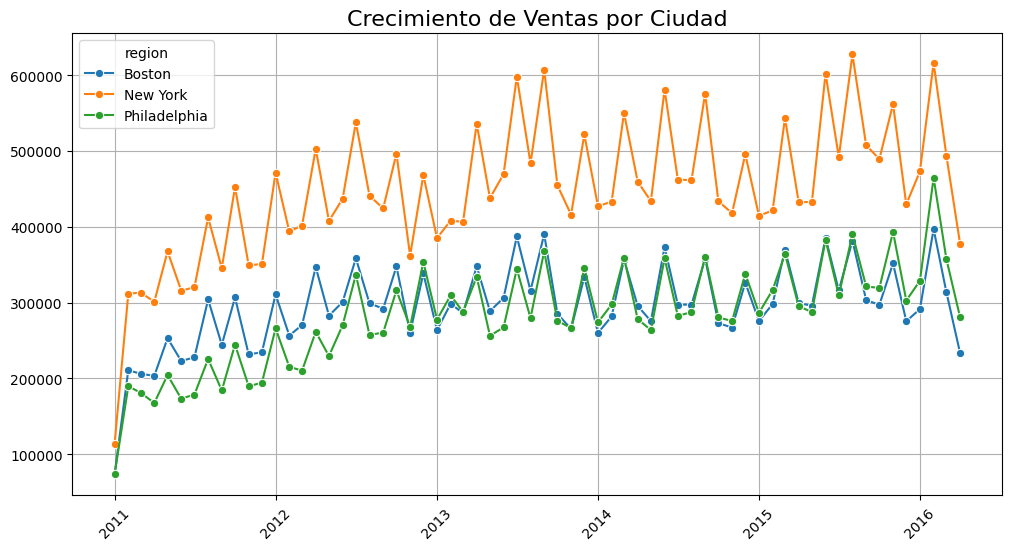

In [ ]:
# Asegurarse de que 'mes_año' esté en el formato correcto
df_item['mes_año'] = pd.to_datetime(df_item['mes_año'], format='%Y-%m')

# Agrupar las ventas por ciudad y mes_año
ventas_mensuales_ciudad = df_item.groupby(['region', 'mes_año'])['ventas'].sum().reset_index()

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Graficar el crecimiento de ventas por ciudad mes a mes
sns.lineplot(data=ventas_mensuales_ciudad, x='mes_año', y='ventas', hue='region', marker='o')

# Configuraciones del gráfico
plt.title('Crecimiento de Ventas por Ciudad', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xticks(rotation=45)

# Añadir una cuadrícula para mejorar la visualización
plt.grid(True)

# Mostrar el gráfico
plt.show()


#9: Análisis de rentabilidad por categoría

<ipython-input-48-eb5ed1a099fd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='margen_ganancia', data=margen_categoria, palette=department_colors.values())


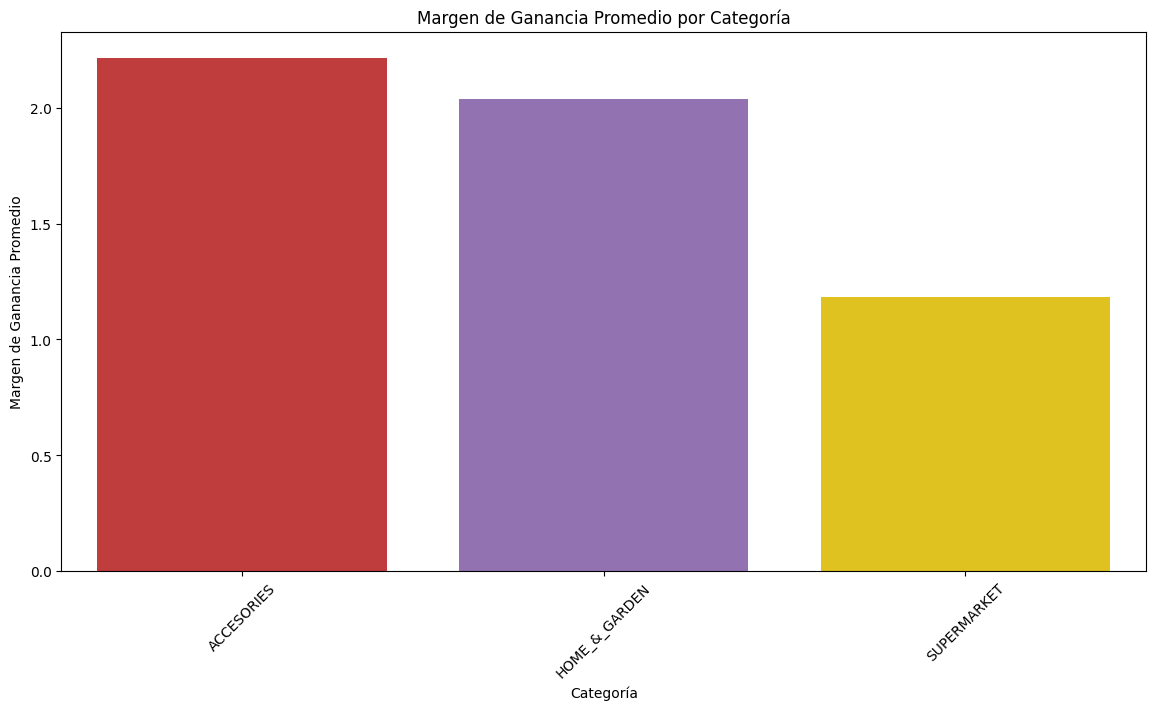

In [ ]:
# Análisis de rentabilidad por categoría
costo_aproximado = 0.7 * df_item['sell_price']
df_item['margen_ganancia'] = df_item['sell_price'] - costo_aproximado
margen_categoria = df_item.groupby('category')['margen_ganancia'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='category', y='margen_ganancia', data=margen_categoria, palette=department_colors.values())
plt.title('Margen de Ganancia Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Margen de Ganancia Promedio')
plt.xticks(rotation=45)
plt.show()


#10: Comparación de ventas por rango de precio

<ipython-input-49-cc2a3d2ad771>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_rango_precio = df_item.groupby('rango_precio')['ventas'].sum().reset_index()
<ipython-input-49-cc2a3d2ad771>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='rango_precio', y='ventas', data=ventas_rango_precio, palette='Blues')


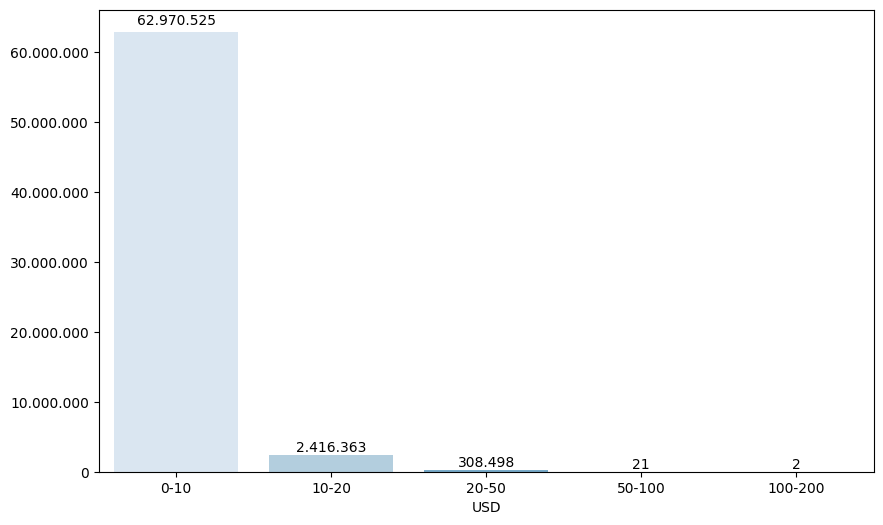

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Crear una nueva columna para el rango de precio
df_item['rango_precio'] = pd.cut(df_item['sell_price'], bins=[0, 10, 20, 50, 100, 200], labels=['0-10', '10-20', '20-50', '50-100', '100-200'])

# Agrupar las ventas por rango de precio
ventas_rango_precio = df_item.groupby('rango_precio')['ventas'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='rango_precio', y='ventas', data=ventas_rango_precio, palette='Blues')

# Añadir el título y etiquetas
plt.title('')
plt.xlabel('USD')
plt.ylabel('')

# Hacer que los valores del eje Y sean enteros
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y):,}'.replace(',', '.')))

# Añadir los valores de ventas encima de cada barra, ajustando su posición
for index, row in ventas_rango_precio.iterrows():
    bar_plot.text(index, row['ventas'] + row['ventas'] * 0.01, f'{int(row["ventas"]):,}'.replace(',', '.'), color='black', ha="center", va="bottom")

# Mostrar gráfico
plt.show()


<ipython-input-50-644e4dd6c84e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rango_precio', y='ventas', data=ventas_rango_precio, palette='Blues')


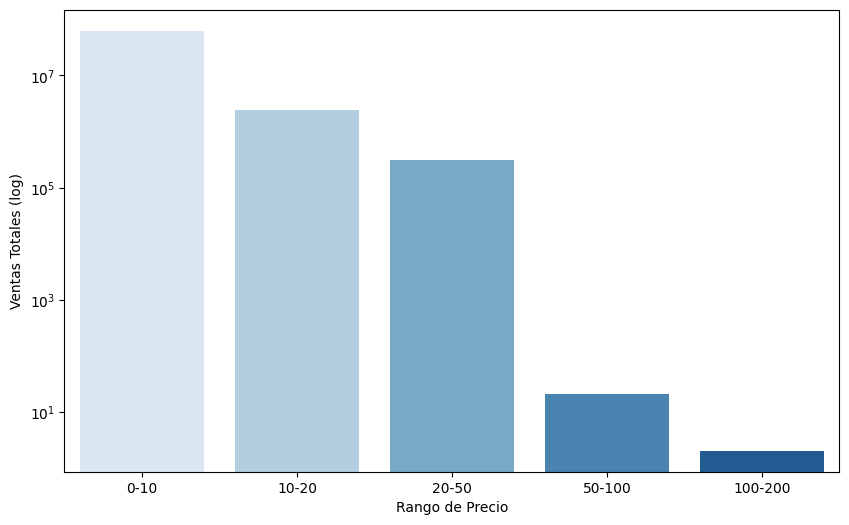

In [ ]:
# Usar una escala logarítmica para mejorar la visualización de los rangos más pequeños
plt.figure(figsize=(10, 6))
sns.barplot(x='rango_precio', y='ventas', data=ventas_rango_precio, palette='Blues')
plt.yscale('log')  # Cambiar a escala logarítmica
plt.title('')
plt.xlabel('Rango de Precio')
plt.ylabel('Ventas Totales (log)')
plt.show()


<ipython-input-51-af9840f0bbfd>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_rango_precio = df_item.groupby('rango_precio')['ventas'].sum().reset_index()
<ipython-input-51-af9840f0bbfd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='rango_precio', y='ventas_porcentaje', data=ventas_rango_precio, palette='Blues')


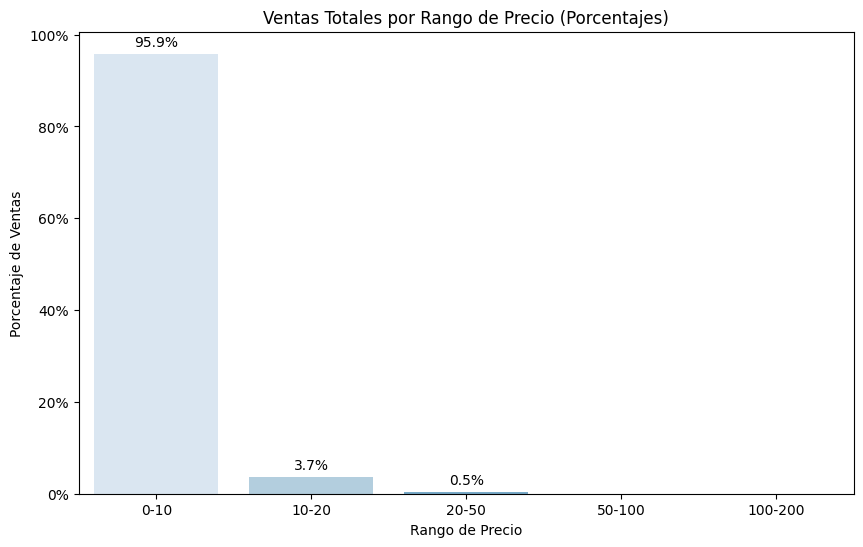

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna para el rango de precio
df_item['rango_precio'] = pd.cut(df_item['sell_price'], bins=[0, 10, 20, 50, 100, 200], labels=['0-10', '10-20', '20-50', '50-100', '100-200'])

# Agrupar las ventas por rango de precio
ventas_rango_precio = df_item.groupby('rango_precio')['ventas'].sum().reset_index()

# Calcular el porcentaje de ventas para cada rango
ventas_rango_precio['ventas_porcentaje'] = (ventas_rango_precio['ventas'] / ventas_rango_precio['ventas'].sum()) * 100

# Crear el gráfico de barras con los porcentajes
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='rango_precio', y='ventas_porcentaje', data=ventas_rango_precio, palette='Blues')

# Ajustar las etiquetas del eje Y para mostrar porcentajes
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Título y etiquetas
plt.title('Ventas Totales por Rango de Precio (Porcentajes)')
plt.xlabel('Rango de Precio')
plt.ylabel('Porcentaje de Ventas')

# Añadir los valores de porcentaje encima de cada barra solo si es mayor a 0.1%
for index, row in ventas_rango_precio.iterrows():
    if row['ventas_porcentaje'] > 0.1:  # Mostrar solo si es mayor a 0.1%
        bar_plot.text(index, row['ventas_porcentaje'] + 1, f'{row["ventas_porcentaje"]:.1f}%',
                      color='black', ha="center", va="bottom")

# Mostrar gráfico
plt.show()


<ipython-input-52-4e94d037d1fd>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_rango_precio = df_item.groupby('rango_precio')['ventas'].sum().reset_index()
<ipython-input-52-4e94d037d1fd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rango_precio', y='ventas', data=ventas_rango_precio, palette='Blues')


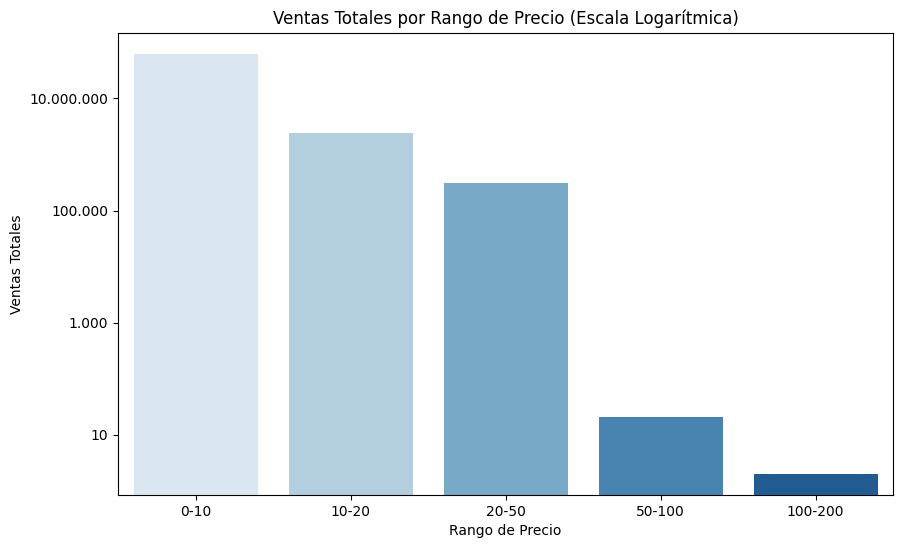

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulación de datos
df_item['rango_precio'] = pd.cut(df_item['sell_price'], bins=[0, 10, 20, 50, 100, 200], labels=['0-10', '10-20', '20-50', '50-100', '100-200'])
ventas_rango_precio = df_item.groupby('rango_precio')['ventas'].sum().reset_index()

# Crear el gráfico con escala logarítmica en el eje Y
plt.figure(figsize=(10, 6))
sns.barplot(x='rango_precio', y='ventas', data=ventas_rango_precio, palette='Blues')
plt.yscale('log')

# Formatear el eje Y para mostrar solo números enteros
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y):,}'.replace(',', '.')))

# Título y etiquetas
plt.title('Ventas Totales por Rango de Precio (Escala Logarítmica)')
plt.xlabel('Rango de Precio')
plt.ylabel('Ventas Totales')

# Mostrar el gráfico
plt.show()


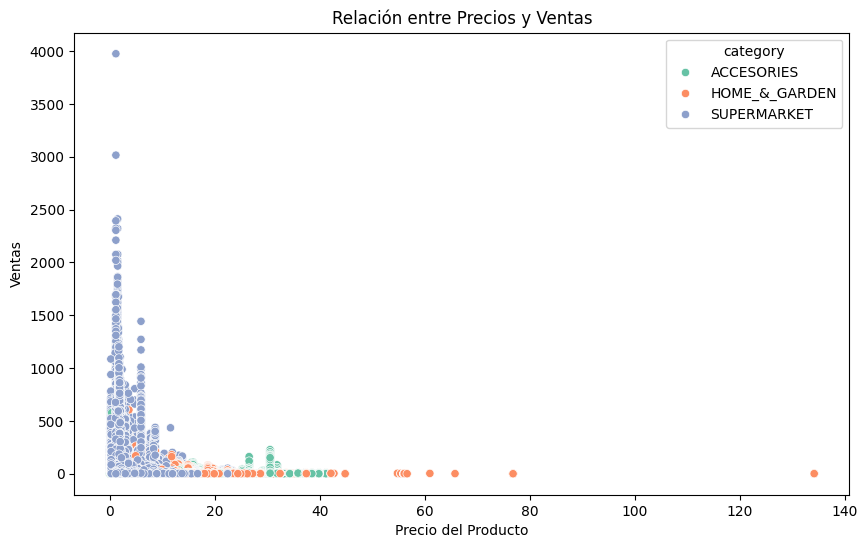

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión: Ventas vs Precios
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sell_price', y='ventas', data=df_item, hue='category', palette='Set2')

# Título y etiquetas
plt.title('Relación entre Precios y Ventas')
plt.xlabel('Precio del Producto')
plt.ylabel('Ventas')

# Mostrar gráfico
plt.show()


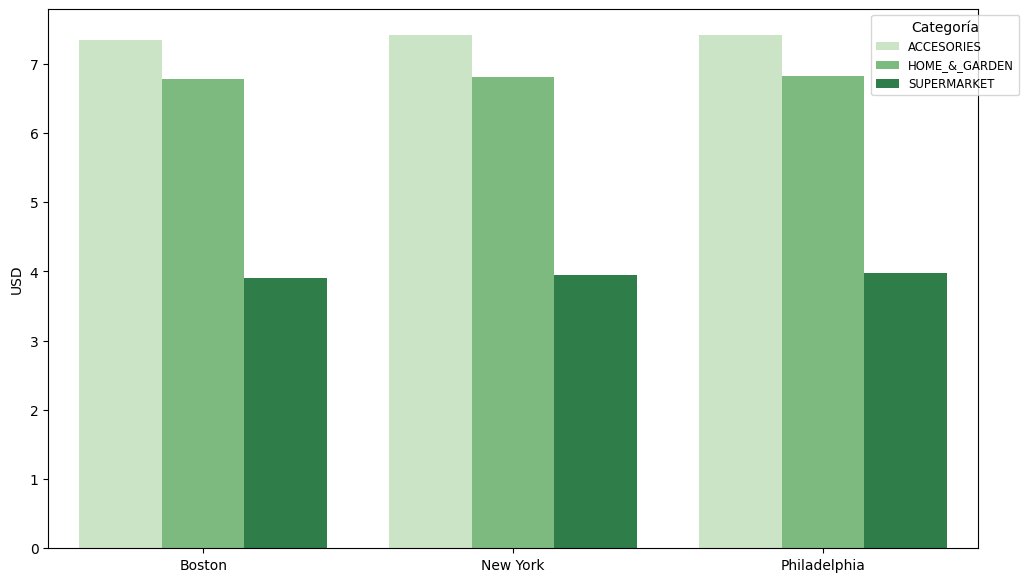

In [ ]:
# Agrupar por ciudad y categoría de producto para obtener precios y ventas promedio
precios_ventas_ciudad = df_item.groupby(['region', 'category'])[['sell_price', 'ventas']].mean().reset_index()

# Graficar precio promedio y ventas por ciudad
plt.figure(figsize=(12, 7))
sns.barplot(x='region', y='sell_price', hue='category', data=precios_ventas_ciudad, palette='Greens')

# Título y etiquetas
plt.title('')
plt.xlabel('')
plt.ylabel('USD')  # Aquí se añaden las unidades

# Ajustar la leyenda para que sea más pequeña y movida a una mejor posición
plt.legend(title='Categoría', loc='upper right', fontsize='small', bbox_to_anchor=(1.05, 1))

# Mostrar gráfico
plt.show()


<ipython-input-55-5baaec8aac4c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_precio_rango = df_item.groupby(['region', pd.cut(df_item['sell_price'], bins=5)])['ventas'].sum().reset_index()


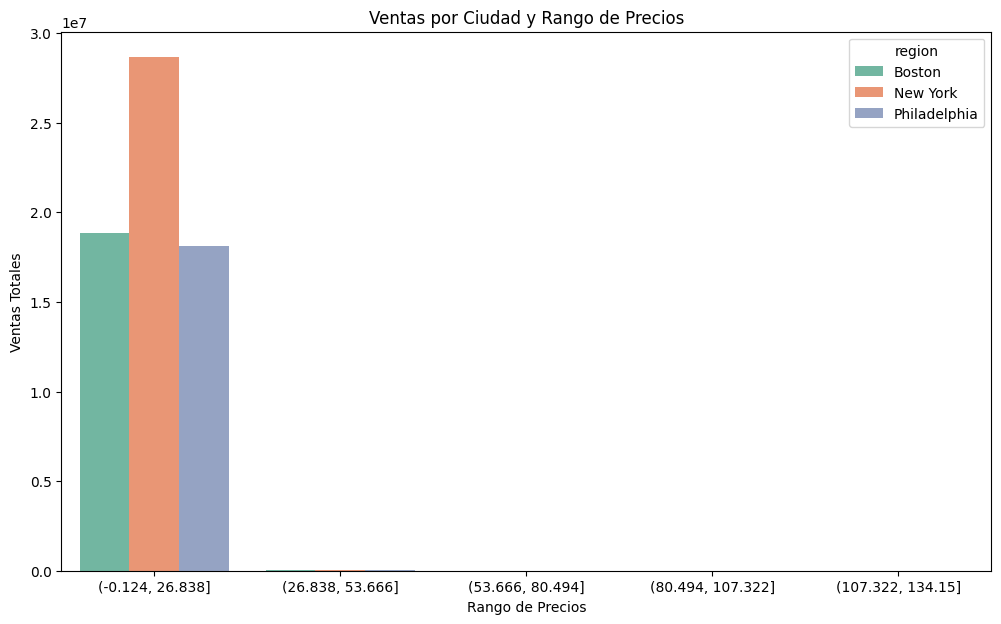

In [ ]:
# Agrupar por ciudad y rango de precios para obtener las ventas promedio
ventas_precio_rango = df_item.groupby(['region', pd.cut(df_item['sell_price'], bins=5)])['ventas'].sum().reset_index()

# Graficar ventas por ciudad y rango de precios
plt.figure(figsize=(12, 7))
sns.barplot(x='sell_price', y='ventas', hue='region', data=ventas_precio_rango, palette='Set2')

# Título y etiquetas
plt.title('Ventas por Ciudad y Rango de Precios')
plt.xlabel('Rango de Precios')
plt.ylabel('Ventas Totales')

# Mostrar gráfico
plt.show()


#11: Popularidad por región y categoría

In [ ]:
# Popularidad por región y categoría
ventas_categoria_region = df_item.groupby(['region', 'category'])['ventas'].sum().reset_index()

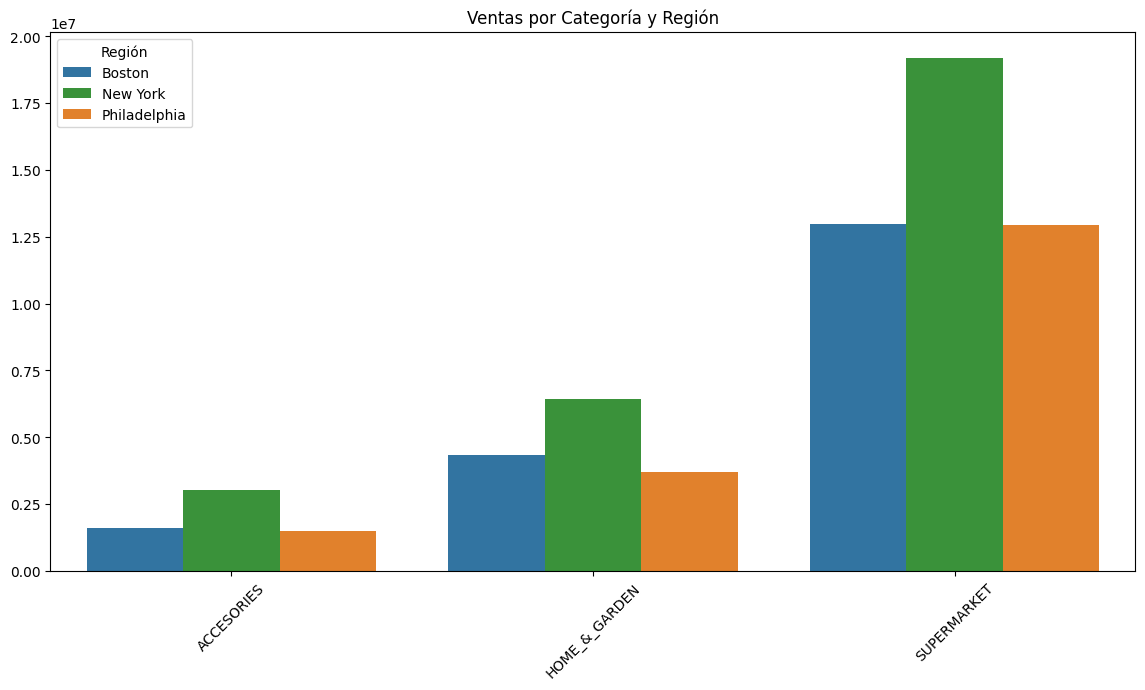

In [ ]:
# Graficar ventas por categoría y región
plt.figure(figsize=(14, 7))
sns.barplot(x='category', y='ventas', hue='region', data=ventas_categoria_region, palette=city_colors.values())
plt.title('Ventas por Categoría y Región')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.show()

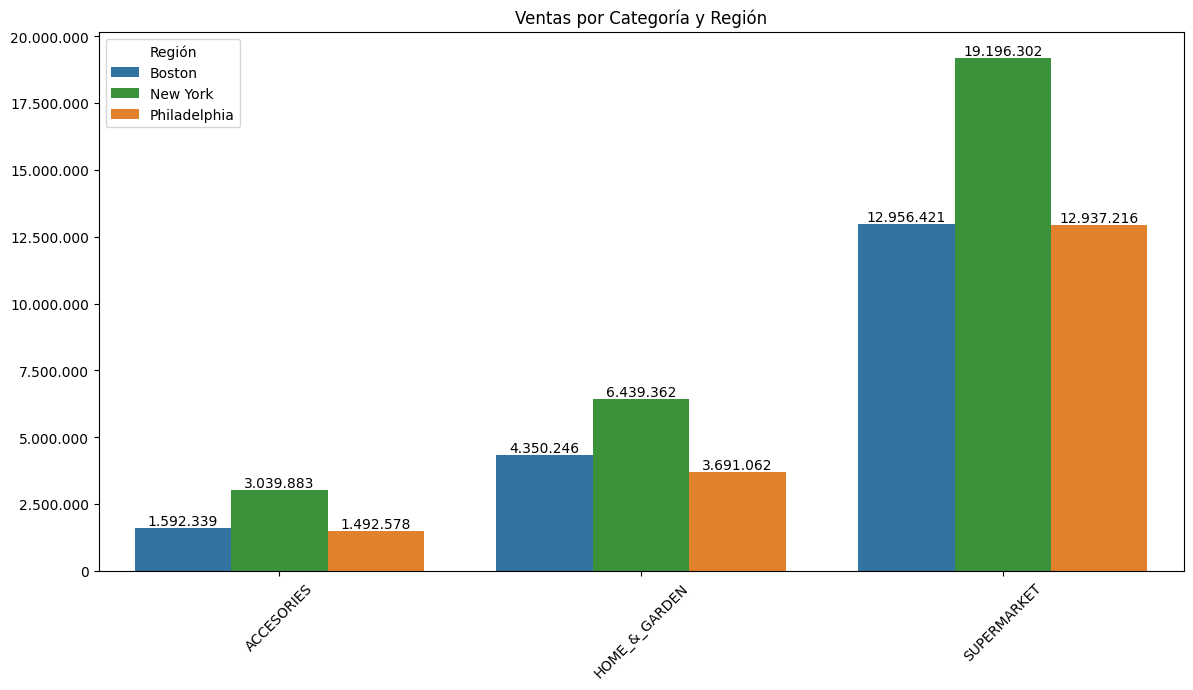

In [ ]:
import matplotlib.ticker as ticker

# Graficar ventas por categoría y región
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='category', y='ventas', hue='region', data=ventas_categoria_region, palette=city_colors.values())

# Mostrar el valor de ventas encima de cada barra
for p in ax.patches:
    if p.get_height() > 0:  # Solo mostrar el valor si es mayor que 0
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):,}'.replace(",", "."),
                ha='center', va='bottom', fontsize=10)

# Convertir los valores del eje Y a enteros y agregar separador de miles
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".")))

# Título y ajustes
plt.title('Ventas por Categoría y Región')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.show()


#12: Análisis de estacionalidad por categoría

In [ ]:
# Crear una columna de fecha basada en el año y la semana
df_item['fecha'] = pd.to_datetime(df_item['año'].astype(str) + df_item['semana'].astype(str) + '0', format='%Y%U%w')

In [ ]:
# Extraer el mes de la columna 'fecha'
df_item['mes'] = df_item['fecha'].dt.month

In [ ]:
# Crear una nueva columna 'año-mes' para combinar ambos
df_item['año_mes'] = df_item['año'].astype(str) + '-' + df_item['mes'].astype(str).str.zfill(2)

In [ ]:
# Agrupar por 'año_mes' y 'category', calcular ventas totales por mes
ventas_estacionalidad_categoria = df_item.groupby(['año_mes', 'category'])['ventas'].sum().reset_index()

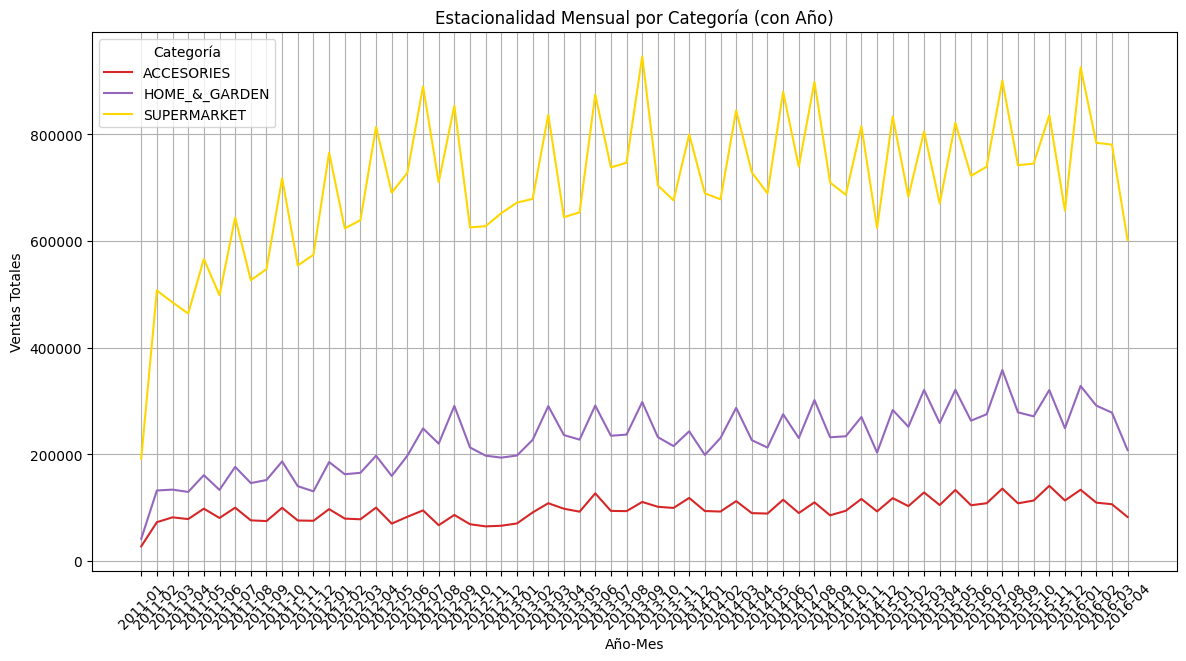

In [ ]:
# Graficar la estacionalidad mensual por categoría usando 'año_mes'
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_estacionalidad_categoria, x='año_mes', y='ventas', hue='category', palette=department_colors.values())
plt.title('Estacionalidad Mensual por Categoría (con Año)')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas Totales')
plt.legend(title='Categoría')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

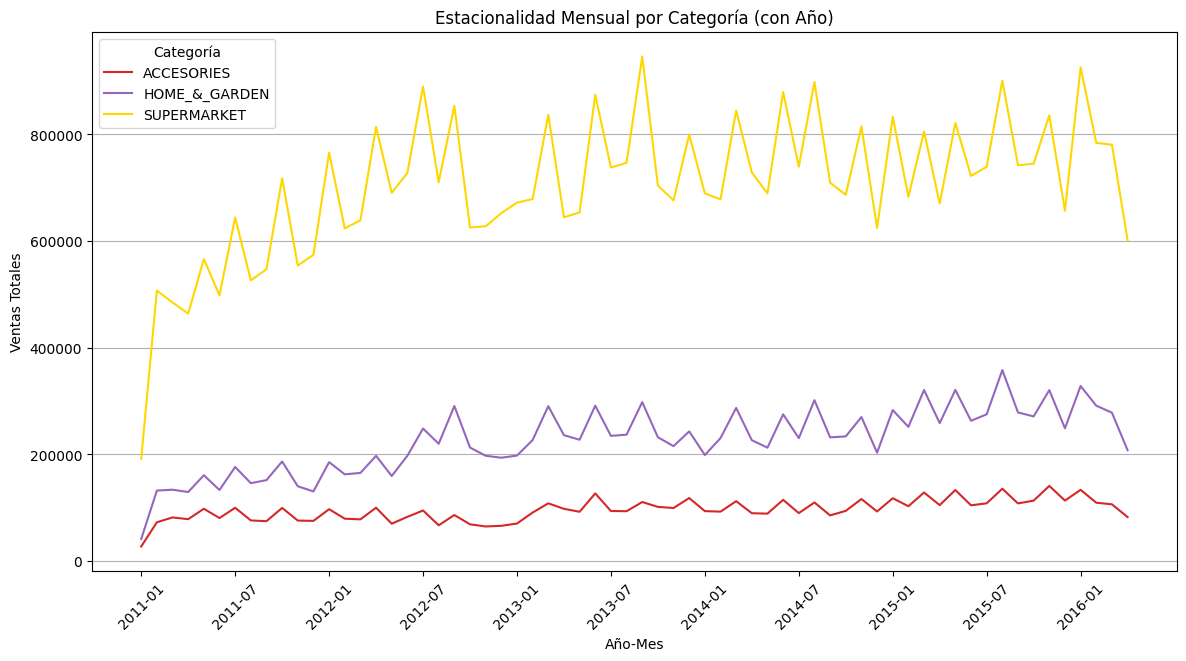

In [ ]:
import matplotlib.ticker as ticker

# Graficar la estacionalidad mensual por categoría usando 'año_mes'
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_estacionalidad_categoria, x='año_mes', y='ventas', hue='category', palette=department_colors.values())

# Ajustes del gráfico
plt.title('Estacionalidad Mensual por Categoría (con Año)')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas Totales')
plt.legend(title='Categoría')

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Mantener solo las líneas horizontales de la cuadrícula
plt.grid(True, axis='y')

# Mostrar etiquetas del eje X solo en algunos puntos
espaciado = 6  # Ajusta este valor según cuántas etiquetas quieres mostrar
plt.gca().set_xticks(plt.gca().get_xticks()[::espaciado])

plt.show()


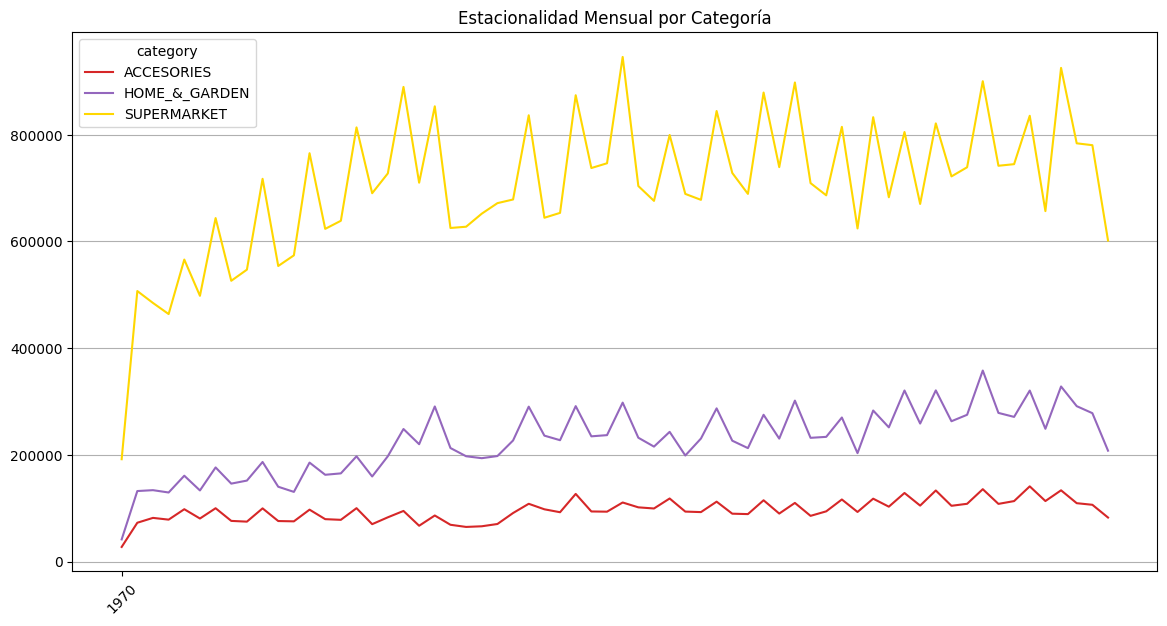

In [ ]:
import matplotlib.dates as mdates

# Crear el gráfico con las ventas totales por meses
plt.figure(figsize=(14, 7))
sns.lineplot(data=ventas_estacionalidad_categoria, x='año_mes', y='ventas', hue='category', palette=department_colors.values())

# Ajustar las etiquetas del eje X para que muestren solo los años
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Mostrar solo los años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato solo de año

# Título y etiquetas
plt.title('Estacionalidad Mensual por Categoría')
plt.xlabel('')
plt.ylabel('')

# Rotar las etiquetas del eje X para que se vean correctamente
plt.xticks(rotation=45)

# Mostrar la cuadrícula solo para las líneas horizontales
plt.grid(True, axis='y')

plt.show()


#13: Ventas acumuladas por semana

In [ ]:
# Calcular ventas acumuladas de forma continua (sin reiniciar por año)
df_item['ventas_acumuladas_continuas'] = df_item['ventas'].cumsum()

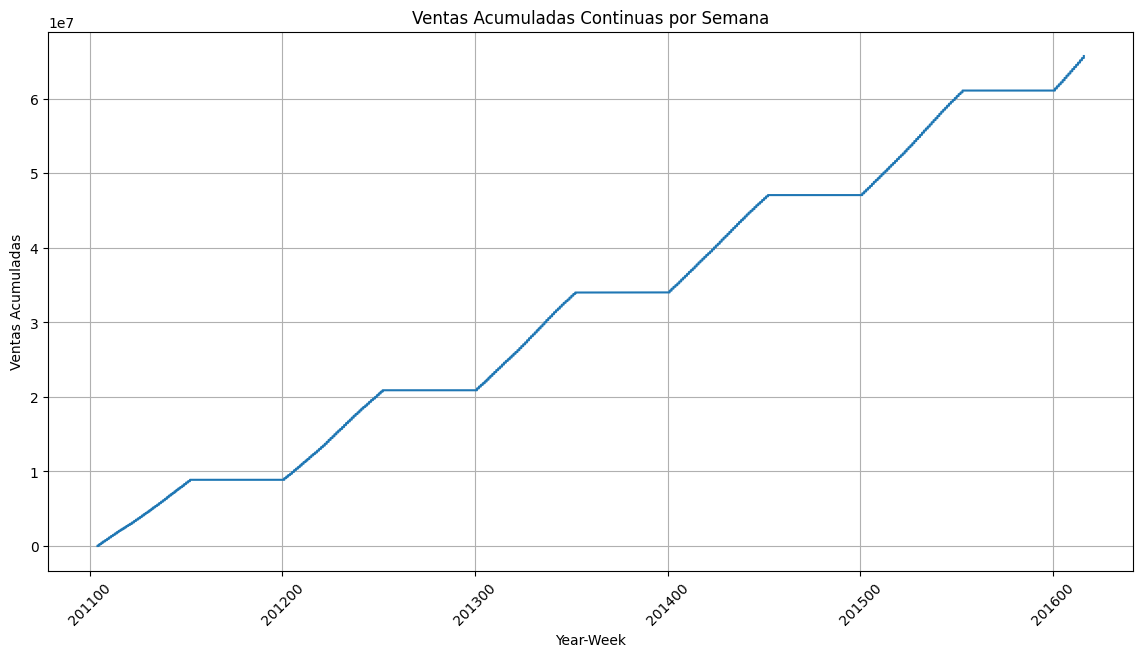

In [ ]:
# Graficar ventas acumuladas por semana de manera continua
plt.figure(figsize=(14, 7))
plt.plot(df_item['yearweek'], df_item['ventas_acumuladas_continuas'], color='#1F77B4')
plt.title('Ventas Acumuladas Continuas por Semana')
plt.xlabel('Year-Week')
plt.ylabel('Ventas Acumuladas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

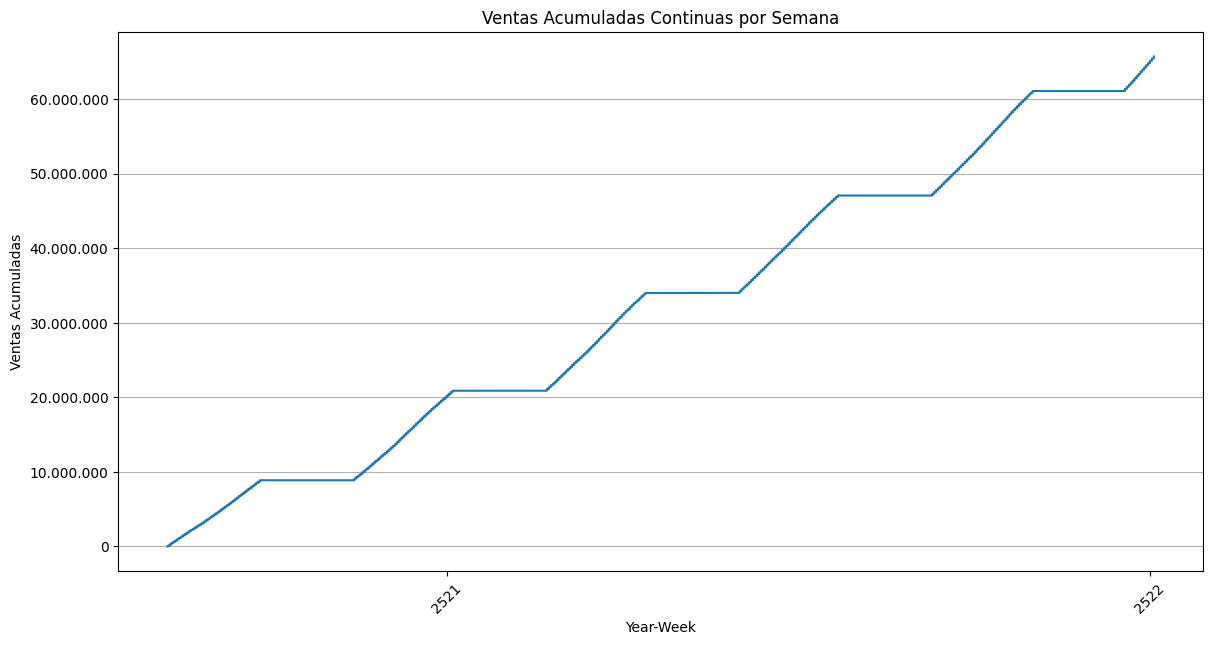

In [ ]:
import matplotlib.dates as mdates  # Asegúrate de tener esta importación

# Graficar ventas acumuladas por semana de manera continua
plt.figure(figsize=(14, 7))
plt.plot(df_item['yearweek'], df_item['ventas_acumuladas_continuas'], color='#1F77B4')

# Título y etiquetas
plt.title('Ventas Acumuladas Continuas por Semana')
plt.xlabel('Year-Week')
plt.ylabel('Ventas Acumuladas')

# Ajustar las etiquetas del eje X para que muestren solo los años
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Mostrar solo los años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato solo de año

# Convertir los valores del eje Y a enteros
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", ".")))

# Rotar las etiquetas del eje X para que se vean correctamente
plt.xticks(rotation=45)

# Mostrar la cuadrícula solo para las líneas horizontales
plt.grid(True, axis='y')

plt.show()


#14: Comparación entre evento y no evento

In [ ]:
# Agrupar ventas por evento y categoría, sumando las ventas
ventas_eventos_categoria = df_item.groupby(['event', 'category'])['ventas'].sum().reset_index()

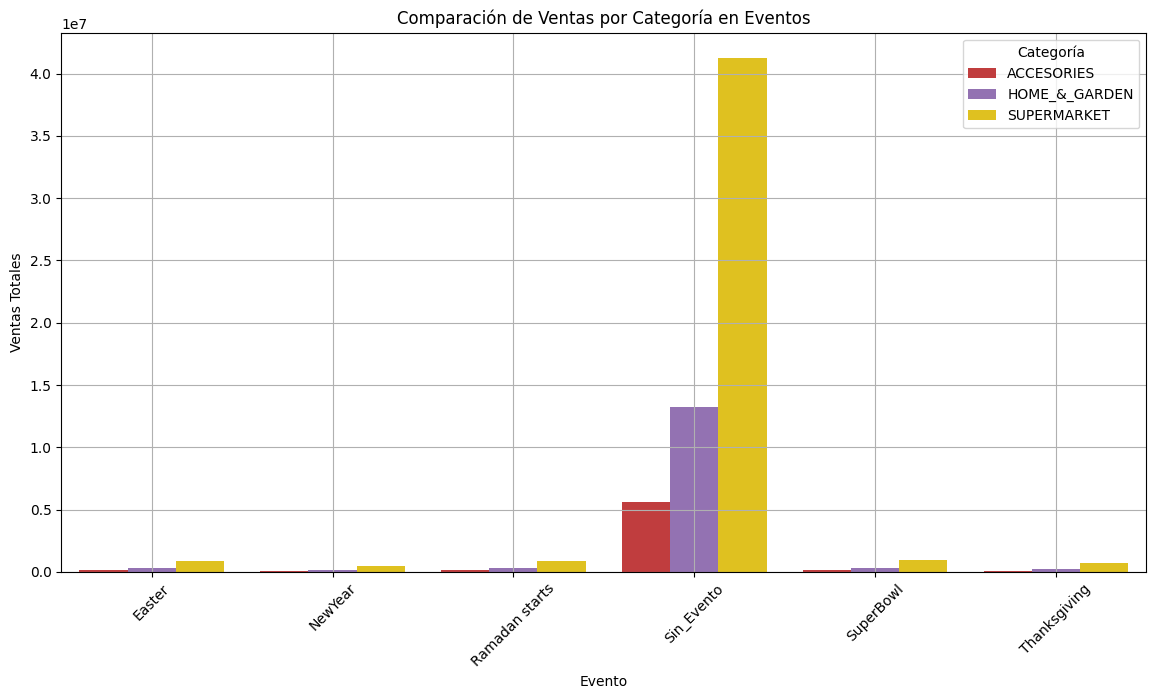

In [ ]:
# Graficar ventas por evento y categoría en un gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(x='event', y='ventas', hue='category', data=ventas_eventos_categoria, palette=department_colors.values())
plt.title('Comparación de Ventas por Categoría en Eventos')
plt.xlabel('Evento')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.legend(title='Categoría', loc='upper right')
plt.grid(True)
plt.show()

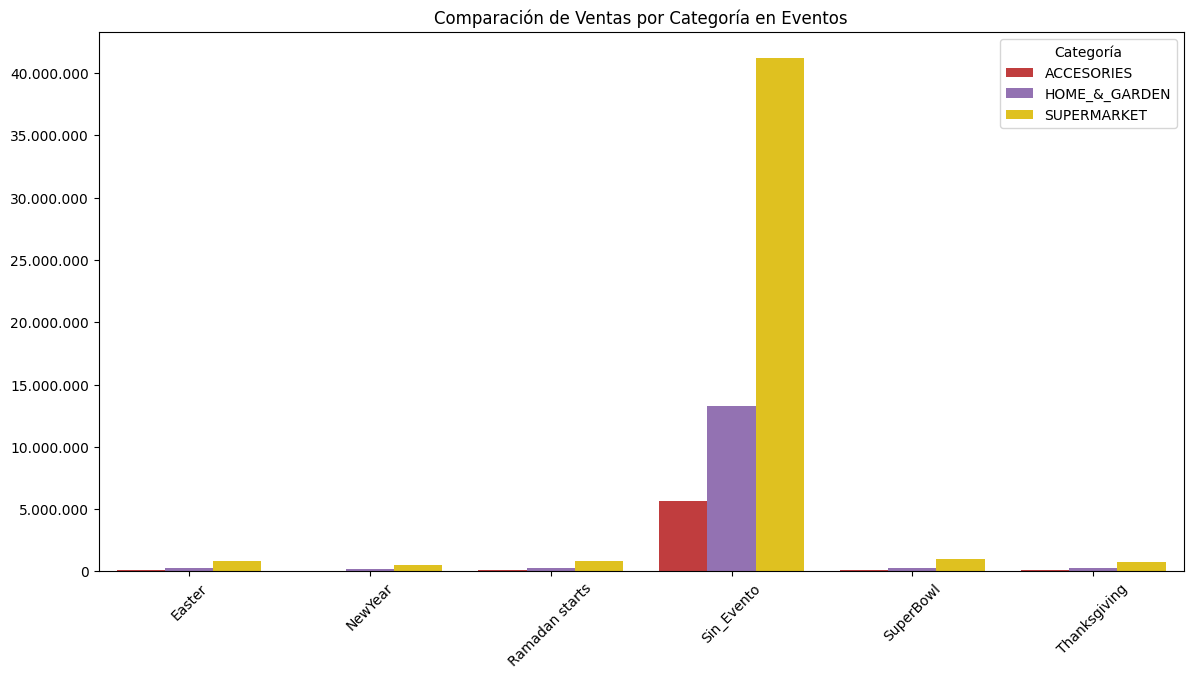

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Graficar ventas por evento y categoría en un gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(x='event', y='ventas', hue='category', data=ventas_eventos_categoria, palette=department_colors.values())

# Título y etiquetas
plt.title('Comparación de Ventas por Categoría en Eventos')
plt.xlabel('')
plt.ylabel('')



# Hacer que los valores del eje Y sean enteros
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Leyenda
plt.legend(title='Categoría', loc='upper right')

# Mostrar gráfico
plt.show()


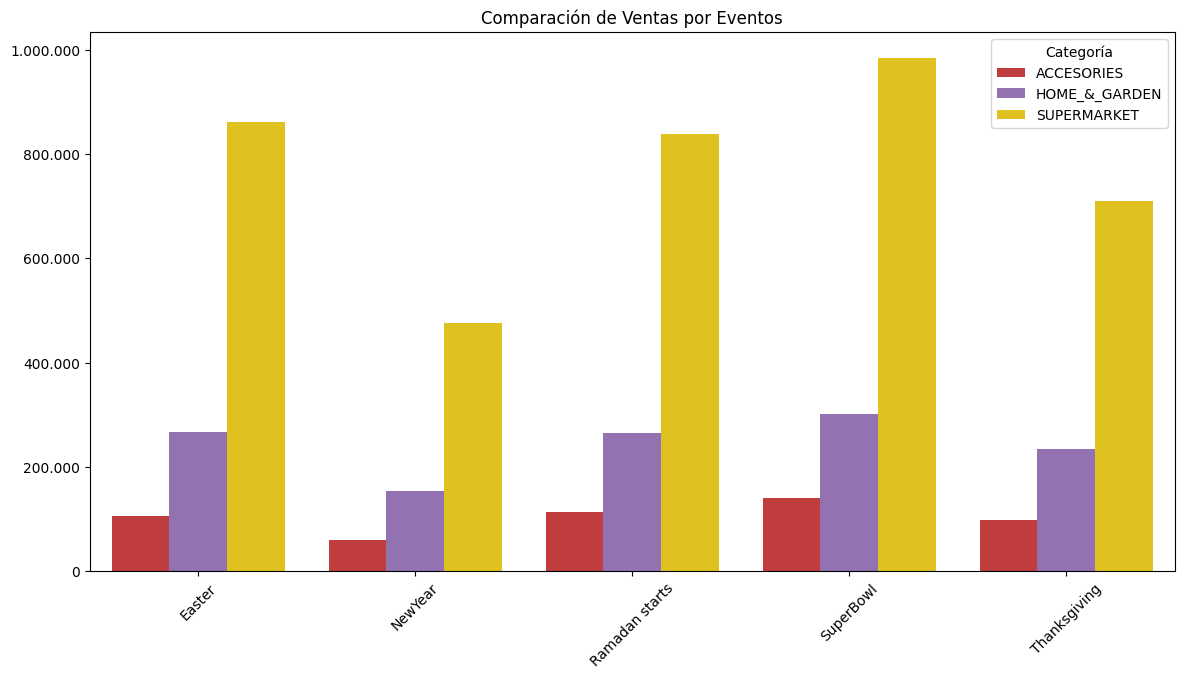

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Filtrar los datos para excluir la categoría 'Sin_Evento'
ventas_eventos_sin_evento = ventas_eventos_categoria[ventas_eventos_categoria['event'] != 'Sin_Evento']

# Graficar ventas por evento y categoría sin la categoría 'Sin_Evento'
plt.figure(figsize=(14, 7))
sns.barplot(x='event', y='ventas', hue='category', data=ventas_eventos_sin_evento, palette=department_colors.values())

# Título y etiquetas
plt.title('Comparación de Ventas por Eventos')
plt.xlabel('')
plt.ylabel('')


# Hacer que los valores del eje Y sean enteros
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Leyenda
plt.legend(title='Categoría', loc='upper right')

# Mostrar gráfico
plt.show()


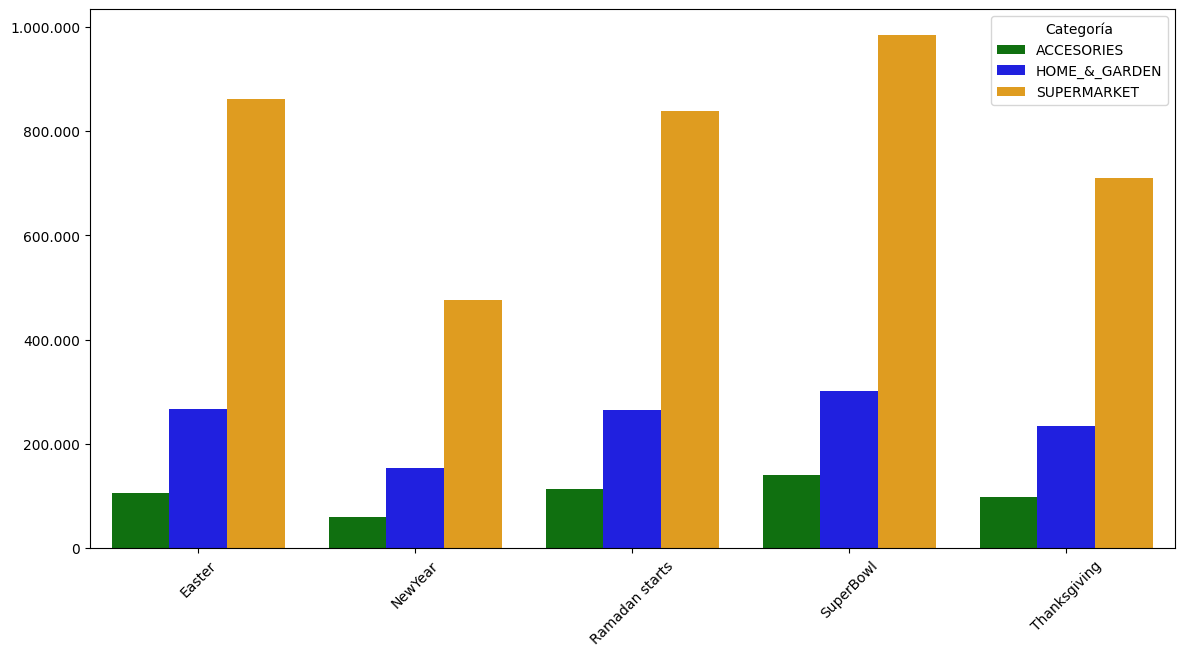

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Filtrar los datos para excluir la categoría 'Sin_Evento'
ventas_eventos_sin_evento = ventas_eventos_categoria[ventas_eventos_categoria['event'] != 'Sin_Evento']

# Definir la paleta de colores verde, amarillo y naranja
custom_palette = ['green', 'blue', 'orange']

# Graficar ventas por evento y categoría sin la categoría 'Sin_Evento'
plt.figure(figsize=(14, 7))
sns.barplot(x='event', y='ventas', hue='category', data=ventas_eventos_sin_evento, palette=custom_palette)

# Título y etiquetas
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Hacer que los valores del eje Y sean enteros
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Leyenda
plt.legend(title='Categoría', loc='upper right')

# Mostrar gráfico
plt.show()


#Comparativa de Ventas con y sin Eventos

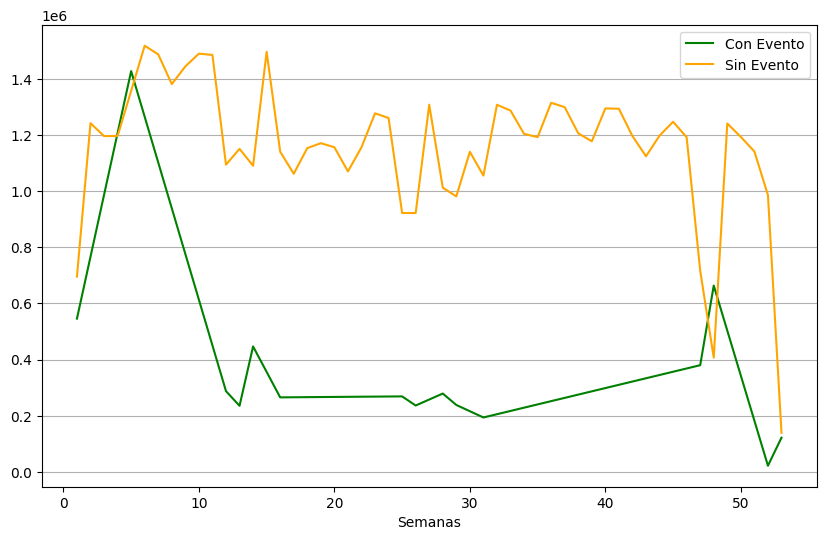

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para ventas con y sin eventos
df_eventos = df_item[df_item['event'] != 'Sin_Evento']
df_sin_eventos = df_item[df_item['event'] == 'Sin_Evento']

# Agrupar las ventas por semana para eventos y sin eventos
ventas_evento = df_eventos.groupby('semana')['ventas'].sum()
ventas_sin_evento = df_sin_eventos.groupby('semana')['ventas'].sum()


# Crear la figura y el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de línea para ventas con eventos
plt.plot(ventas_evento.index, ventas_evento.values, label='Con Evento', color='green')

# Gráfico de línea para ventas sin eventos
plt.plot(ventas_sin_evento.index, ventas_sin_evento.values, label='Sin Evento', color='orange')

# Añadir el título y etiquetas de los ejes
plt.title('')
plt.xlabel('Semanas')
plt.ylabel('')

# Añadir leyenda
plt.legend()

# Configurar que los valores del eje Y sean enteros
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Eliminar las líneas verticales del fondo y mantener las horizontales
plt.grid(True, axis='y')
plt.grid(False, axis='x')

# Mostrar el gráfico
plt.show()


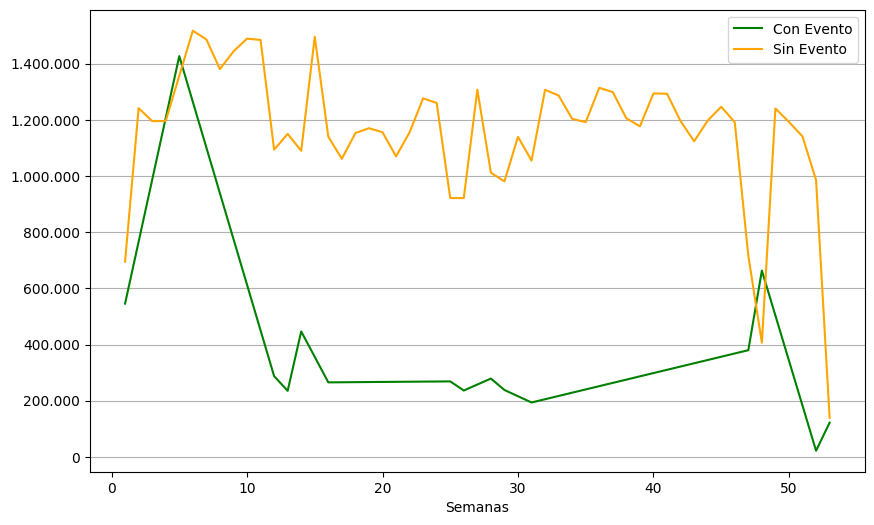

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Filtrar los datos para ventas con y sin eventos
df_eventos = df_item[df_item['event'] != 'Sin_Evento']
df_sin_eventos = df_item[df_item['event'] == 'Sin_Evento']

# Agrupar las ventas por semana para eventos y sin eventos
ventas_evento = df_eventos.groupby('semana')['ventas'].sum()
ventas_sin_evento = df_sin_eventos.groupby('semana')['ventas'].sum()

# Crear la figura y el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de línea para ventas con eventos
plt.plot(ventas_evento.index, ventas_evento.values, label='Con Evento', color='green')

# Gráfico de línea para ventas sin eventos
plt.plot(ventas_sin_evento.index, ventas_sin_evento.values, label='Sin Evento', color='orange')

# Añadir el título y etiquetas de los ejes
plt.title('')
plt.xlabel('Semanas')
plt.ylabel('')

# Añadir leyenda
plt.legend()

# Configurar que los valores del eje Y sean enteros
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Eliminar las líneas verticales del fondo y mantener las horizontales
plt.grid(True, axis='y')
plt.grid(False, axis='x')

# Mostrar el gráfico
plt.show()


<Figure size 1400x700 with 0 Axes>

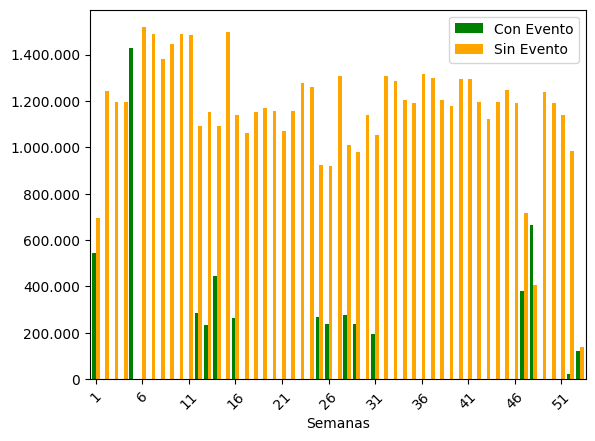

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Filtrar los datos para semanas con y sin eventos
df_eventos = df_item[df_item['event'] != 'Sin_Evento']
df_sin_eventos = df_item[df_item['event'] == 'Sin_Evento']

# Agrupar las ventas por semana
ventas_eventos = df_eventos.groupby('semana')['ventas'].sum()
ventas_sin_eventos = df_sin_eventos.groupby('semana')['ventas'].sum()

# Crear DataFrame para combinar las ventas con y sin eventos
df_comparativa = pd.DataFrame({
    'Con Evento': ventas_eventos,
    'Sin Evento': ventas_sin_eventos
}).fillna(0)  # Rellenar semanas sin ventas de eventos con 0

# Graficar la comparativa
plt.figure(figsize=(14, 7))
ax = df_comparativa.plot(kind='bar', color=['green', 'orange'], width=0.8)

# Título y etiquetas
plt.title('')
plt.xlabel('Semanas')
plt.ylabel('')

# Hacer que los valores del eje Y sean enteros
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Rotar las etiquetas del eje X y ajustar la frecuencia de etiquetas (por ejemplo, cada 5 semanas)
ax.set_xticks(ax.get_xticks()[::5])
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()



<Figure size 1400x700 with 0 Axes>

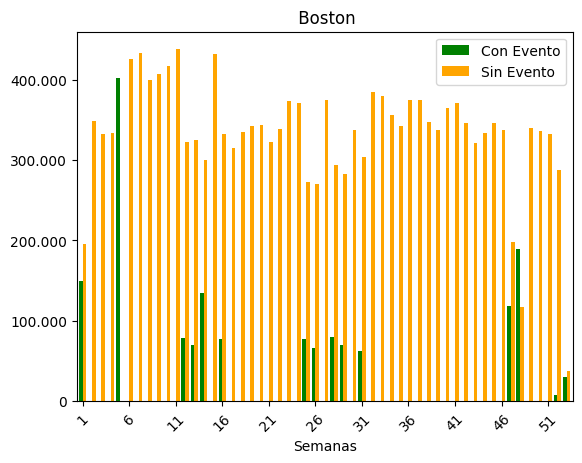

<Figure size 1400x700 with 0 Axes>

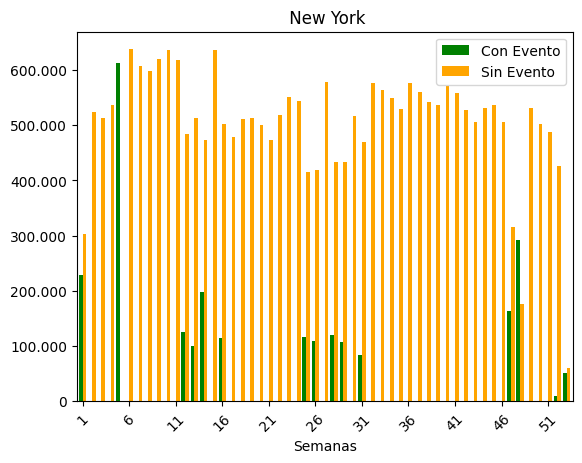

<Figure size 1400x700 with 0 Axes>

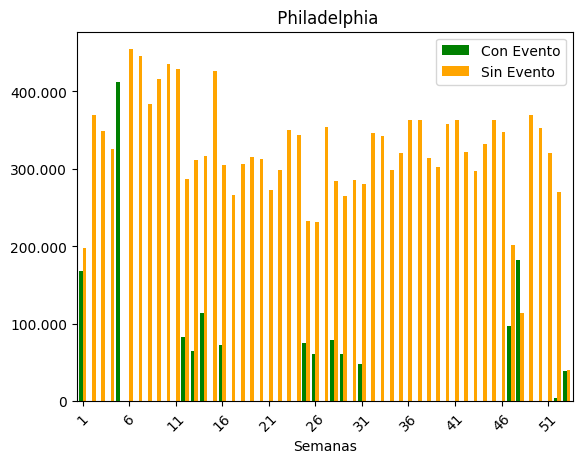

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Obtener las ciudades únicas en el conjunto de datos
ciudades = df_item['region'].unique()

# Iterar sobre cada ciudad
for ciudad in ciudades:
    # Filtrar los datos para la ciudad actual
    df_ciudad_eventos = df_item[(df_item['event'] != 'Sin_Evento') & (df_item['region'] == ciudad)]
    df_ciudad_sin_eventos = df_item[(df_item['event'] == 'Sin_Evento') & (df_item['region'] == ciudad)]

    # Agrupar las ventas por semana para la ciudad actual
    ventas_eventos = df_ciudad_eventos.groupby('semana')['ventas'].sum()
    ventas_sin_eventos = df_ciudad_sin_eventos.groupby('semana')['ventas'].sum()

    # Crear DataFrame para combinar las ventas con y sin eventos para la ciudad
    df_comparativa = pd.DataFrame({
        'Con Evento': ventas_eventos,
        'Sin Evento': ventas_sin_eventos
    }).fillna(0)  # Rellenar semanas sin ventas de eventos con 0

    # Crear la figura y el gráfico
    plt.figure(figsize=(14, 7))
    ax = df_comparativa.plot(kind='bar', color=['green', 'orange'], width=0.8)

    # Título y etiquetas
    plt.title(f' {ciudad}')
    plt.xlabel('Semanas')
    plt.ylabel('')

    # Hacer que los valores del eje Y sean enteros
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

    # Rotar las etiquetas del eje X y ajustar la frecuencia de etiquetas (por ejemplo, cada 5 semanas)
    ax.set_xticks(ax.get_xticks()[::5])
    plt.xticks(rotation=45)

    # Mostrar el gráfico para la ciudad
    plt.show()
